# Proton Energy Loss Correction using GEMC
 
FD proton inbending: [APSApril/ProtonMomentumCorrection3.ipynb](APSApril/ProtonMomentumCorrection3.ipynb)

FD proton outbending: [ProtonMomentumCorrection4.ipynb](ProtonMomentumCorrection4.ipynb)

CD protons: [ProtonMomentumCorrection5.ipynb](ProtonMomentumCorrection5.ipynb)

I update FD proton inbending correction because of the issue delivered in [ProtonMomentumCorrection7.ipynb](ProtonMomentumCorrection7.ipynb). Some protons reconstructed in FTOF2 for inbending electron setup, has an issue that the $\delta p$ vs. $p$ 2D histogram shows two strips.

## Load Libs

In [1]:
import pandas as pd
import numpy as np
from utils.const import *
from utils.physics import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [2]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [3]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}"     # xcolor for colours
}
matplotlib.rcParams.update(pgf_with_latex)


In [4]:
from os import listdir

In [6]:
for i, file in enumerate(listdir("/Volumes/SBHDD1TB/data/merged_noCorr/inbending/")):
    print(i)
    df = pd.read_pickle("/Volumes/SBHDD1TB/data/merged_noCorr/inbending/" + file)
    if i > 0:
        inb_FD = pd.concat([df.loc[df.Psector < 4000, ["PDc1Hitx", "PDc1Hity", "PDc1Hitz", "Etheta", "Ep", "GenEp", "Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi", "MM2_ep", "MM2_epg"]], inb_FD])
#         inb_FD = pd.concat([df.loc[df.Psector < 4000, ["PDc1Hitx", "PDc1Hity", "PDc1Hitz", "Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi"]], inb_FD])
#         inb_CD = pd.concat([df.loc[df.Psector > 4000, ["Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi"]], inb_CD])
#         inb_FD = pd.concat([df.loc[df.Psector < 4000, ["PDc1Hitx", "PDc1Hity", "PDc1Hitz", "Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi", "MM2_ep", "MM2_epg"]], inb_FD])
        inb_CD = pd.concat([df.loc[df.Psector > 4000, ["Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi", "MM2_ep", "MM2_epg"]], inb_CD])
#         inb_FD = pd.concat([df.loc[df.Psector< 4000, :], inb_FD])
    else:
#         inb_FD =  df.loc[df.Psector< 4000, :]
        inb_FD = df.loc[df.Psector < 4000, ["PDc1Hitx", "PDc1Hity", "PDc1Hitz", "Etheta", "Ep", "GenEp", "Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi", "MM2_ep", "MM2_epg"]]
#         inb_FD = df.loc[df.Psector < 4000, ["PDc1Hitx", "PDc1Hity", "PDc1Hitz", "Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi"]]
#         inb_CD = df.loc[df.Psector > 4000, ["Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi"]]
#         inb_FD = df.loc[df.Psector < 4000, ["PDc1Hitx", "PDc1Hity", "PDc1Hitz", "Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi", "MM2_ep", "MM2_epg"]]
        inb_CD = df.loc[df.Psector > 4000, ["Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi", "MM2_ep", "MM2_epg"]]

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [7]:
for i, file in enumerate(listdir("/Volumes/SBHDD1TB/data/merged_noCorr/outbending/")):
    print(i)
    df = pd.read_pickle("/Volumes/SBHDD1TB/data/merged_noCorr/outbending/" + file)
    if i > 0:
        outb_FD = pd.concat([df.loc[df.Psector < 4000, ["Pp", "PDc1Hitx", "PDc1Hity", "PDc1Hitz", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi", "MM2_ep", "MM2_epg"]], outb_FD])
        outb_CD = pd.concat([df.loc[df.Psector > 4000, ["Pp", "PDc1Hitx", "PDc1Hity", "PDc1Hitz", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi", "MM2_ep", "MM2_epg"]], outb_CD])
    else:
        outb_FD = df.loc[df.Psector < 4000, ["Pp", "PDc1Hitx", "PDc1Hity", "PDc1Hitz", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi", "MM2_ep", "MM2_epg"]]
        outb_CD = df.loc[df.Psector > 4000, ["Pp", "PDc1Hitx", "PDc1Hity", "PDc1Hitz", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi", "MM2_ep", "MM2_epg"]]

0
1
2
3
4
5


In [9]:
print(inb_FD.GenPp.min(), inb_FD.GenPp.max(), inb_FD.GenPtheta.min(), inb_FD.GenPtheta.max(),inb_FD.GenPphi.min(), inb_FD.GenPphi.max())
print(inb_CD.GenPp.min(), inb_CD.GenPp.max(), inb_CD.GenPtheta.min(), inb_CD.GenPtheta.max(),inb_CD.GenPphi.min(), inb_CD.GenPphi.max())
print(outb_FD.GenPp.min(), outb_FD.GenPp.max(), outb_FD.GenPtheta.min(), outb_FD.GenPtheta.max(),outb_FD.GenPphi.min(), outb_FD.GenPphi.max())
print(outb_CD.GenPp.min(), outb_CD.GenPp.max(), outb_CD.GenPtheta.min(), outb_CD.GenPtheta.max(),outb_CD.GenPphi.min(), outb_CD.GenPphi.max())

0.2817036455832887 1.6431955238560487 3.1665254633959132 55.90698155170147 -180.0 180.0
0.08763383718452834 1.6431958458103848 3.9337910411357653 68.99039975524707 -180.0 180.0
0.23278292077907659 1.6431712752528613 11.018687346477977 68.72334099354775 -180.0 180.0
0.0701986443265513 1.6431712752528613 8.650938707600519 71.57070056161517 -180.0 180.0


<AxesSubplot:>

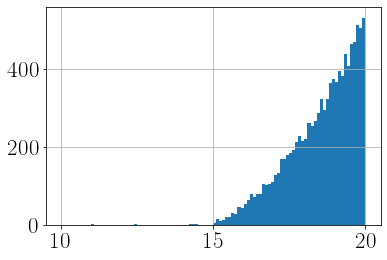

In [9]:
outb_FD.GenPtheta.hist(bins = np.linspace(10, 20, 101))

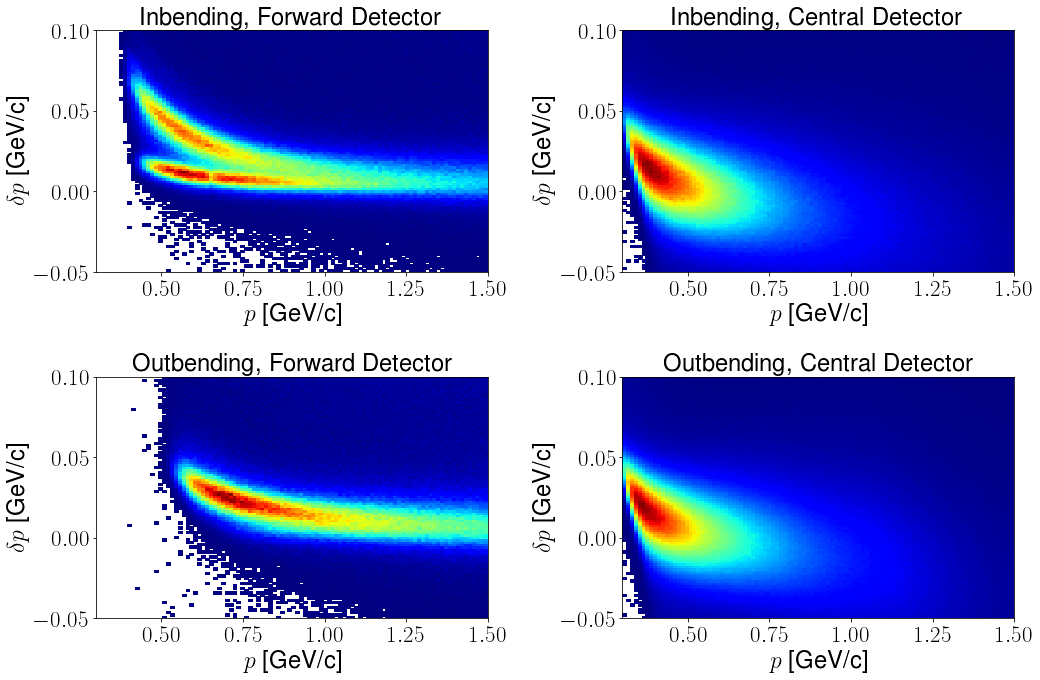

In [9]:
fig, axs = plt.subplots(2,2, figsize = (15, 10))
for row in range(2):
    for col in range(2):
#         ind =col+2*row
        axs[row, col].set_xlabel(r"$p$"+" ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$"+" ["+GeVc+"]")
axs[0, 0].hist2d(inb_FD.Pp, inb_FD.GenPp - inb_FD.Pp, bins = [np.linspace(0.3, 1.5, 101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
axs[0, 1].hist2d(inb_CD.Pp, inb_CD.GenPp - inb_CD.Pp, bins = [np.linspace(0.3, 1.5, 101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
axs[1, 0].hist2d(outb_FD.Pp, outb_FD.GenPp - outb_FD.Pp, bins = [np.linspace(0.3, 1.5, 101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
axs[1, 1].hist2d(outb_CD.Pp, outb_CD.GenPp - outb_CD.Pp, bins = [np.linspace(0.3, 1.5, 101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)

axs[0, 0].set_title("Inbending, Forward Detector")
axs[0, 1].set_title("Inbending, Central Detector")
axs[1, 0].set_title("Outbending, Forward Detector")
axs[1, 1].set_title("Outbending, Central Detector")

plt.tight_layout()
plt.savefig("protons_all_conf.pdf")

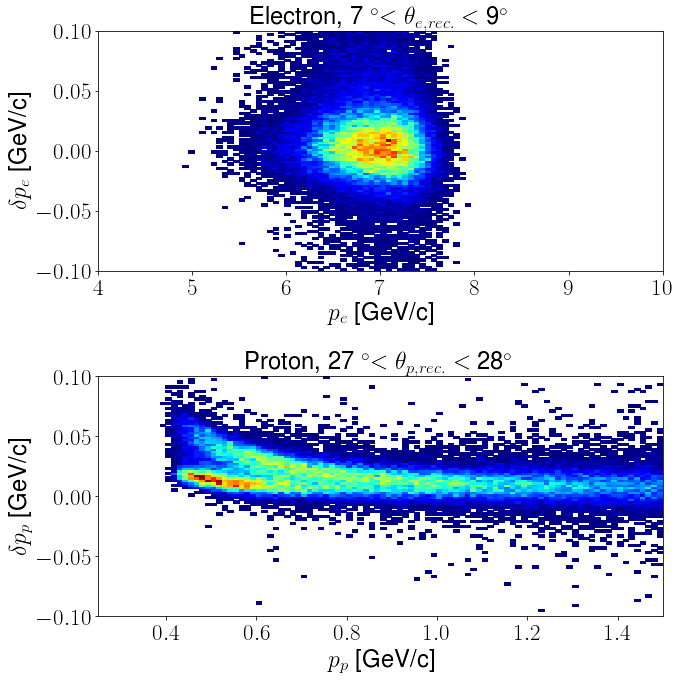

In [6]:
fig, axs = plt.subplots(2,1, figsize = (10, 10))
axs[0].hist2d(inb_FD.loc[(inb_FD.Etheta > 7) & (inb_FD.Etheta < 9), "Ep"], inb_FD.loc[(inb_FD.Etheta > 7) & (inb_FD.Etheta < 9), "GenEp"] - inb_FD.loc[(inb_FD.Etheta > 7) & (inb_FD.Etheta < 9), "Ep"], bins = [np.linspace(4, 10, 101), np.linspace(-0.1, 0.1, 101)], cmap = cmap, cmin = 1)
axs[1].hist2d(inb_FD.loc[(inb_FD.Ptheta > 27) & (inb_FD.Ptheta < 28), "Pp"], inb_FD.loc[(inb_FD.Ptheta > 27) & (inb_FD.Ptheta < 28), "GenPp"] - inb_FD.loc[(inb_FD.Ptheta > 27) & (inb_FD.Ptheta < 28), "Pp"], bins = [np.linspace(0.25, 1.5, 101), np.linspace(-0.1, 0.1, 101)], cmap = cmap, cmin = 1)

axs[0].set_xlabel(r"$p_e$"+" ["+GeVc+"]")
axs[0].set_ylabel(r"$\delta p_e$"+" ["+GeVc+"]")
axs[1].set_xlabel(r"$p_p$"+" ["+GeVc+"]")
axs[1].set_ylabel(r"$\delta p_p$"+" ["+GeVc+"]")

axs[0].set_title("Electron, "+"7 "+degree +r"$<\theta_{e, rec.} <$" + " 9" + degree)
axs[1].set_title("Proton, "+"27 "+degree +r"$<\theta_{p, rec.} <$" + " 28" + degree)

plt.tight_layout()
plt.show()

In [8]:
inbending = inb_FD

In [9]:
# Ftof2_inb_nocorr_1 = Ftof2_inb_nocorr[Ftof2_inb_nocorr.PFtof2Path2- Ftof2_inb_nocorr.PFtof2Path-40*(1/Ftof2_inb_nocorr.Pp-1/0.4)-50<0]
# Ftof2_inb_nocorr_2 = Ftof2_inb_nocorr[(Ftof2_inb_nocorr.PFtof2Path2- Ftof2_inb_nocorr.PFtof2Path-40*(1/Ftof2_inb_nocorr.Pp-1/0.4)-50>0) & (Ftof2_inb_nocorr.PFtof2Path2- Ftof2_inb_nocorr.PFtof2Path-55*(1/Ftof2_inb_nocorr.Pp-1/0.4)-100<0)]
# Ftof2_inb_nocorr_3 = Ftof2_inb_nocorr[(Ftof2_inb_nocorr.PFtof2Path2- Ftof2_inb_nocorr.PFtof2Path-55*(1/Ftof2_inb_nocorr.Pp-1/0.4)-100>0)]
inbending.loc[:, "DC1theta"] = getTheta([inbending.PDc1Hitx, inbending.PDc1Hity, inbending.PDc1Hitz])
# inbending_1 = inbending[inbending.GenPp - inbending.Pp - 0.4*0.022/inbending.Pp**1.5<0]
# inbending_2 = inbending[inbending.GenPp - inbending.Pp - 0.4*0.022/inbending.Pp**1.5>0]
inbending_1 = inbending.loc[inbending.GenPp - inbending.Pp - 0.4*0.022/inbending.Pp**1.5<0, :]
inbending_2 = inbending.loc[inbending.GenPp - inbending.Pp - 0.4*0.022/inbending.Pp**1.5>0, :]

In [12]:
outb_FD.loc[:, "DC1theta"] = getTheta([outb_FD.PDc1Hitx, outb_FD.PDc1Hity, outb_FD.PDc1Hitz])
params = [-53.14680163254601, 79.61307254040804, 0.3, 0.05739232362022314]#best_params#-52.99936209624629, 80.6709735338239, 0.3, 0.06899530845080828]#best_params#[-72.5, 100, 0.3, 0.055]#[-55.5, 80, 0.3, 0.04]
outb_FD_1 = outb_FD.loc[outb_FD.DC1theta < corr(params, outb_FD.Pp), :]
outb_FD_2 = outb_FD.loc[outb_FD.DC1theta > corr(params, outb_FD.Pp), :]
# outb_FD_1 = outb_FD.loc[outb_FD.GenPp - outb_FD.Pp - 0.4*0.022/outb_FD.Pp**1.5<0, :]
# outb_FD_2 = outb_FD.loc[outb_FD.GenPp - outb_FD.Pp - 0.4*0.022/outb_FD.Pp**1.5>0, :]
params = [-53.14680163254601, 79.61307254040804, 0.3, 0.05739232362022314]#best_params#-52.99936209624629, 80.6709735338239, 0.3, 0.06899530845080828]#best_params#[-72.5, 100, 0.3, 0.055]#[-55.5, 80, 0.3, 0.04]
inbending_check1 = inbending.loc[inbending.DC1theta < corr(params, inbending.Pp), :]
inbending_check2 = inbending.loc[inbending.DC1theta > corr(params, inbending.Pp), :]

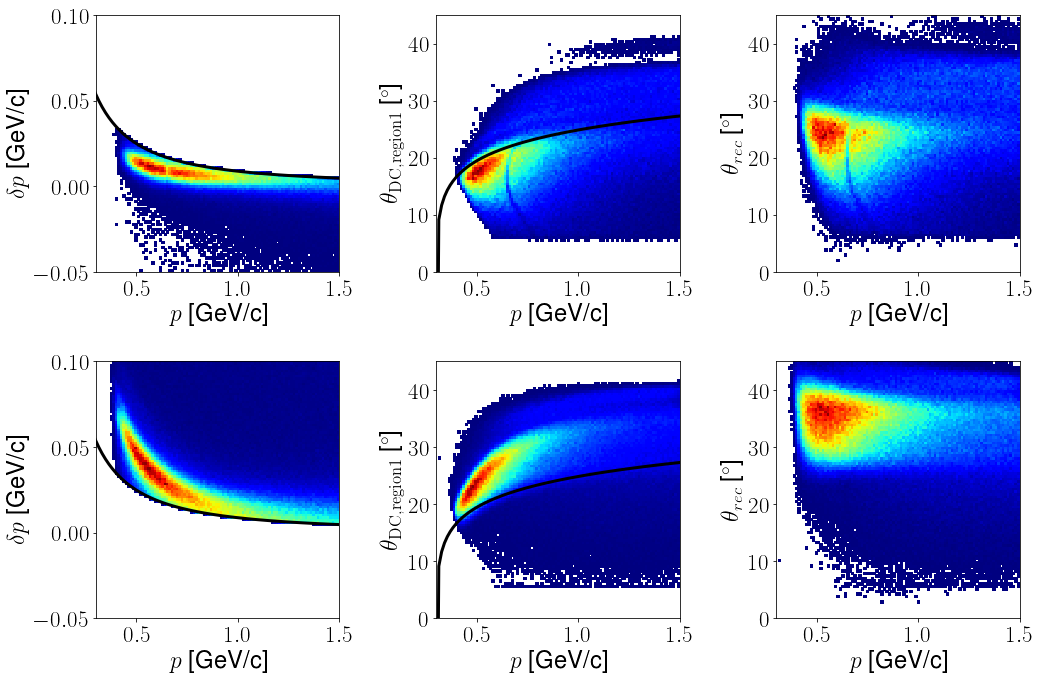

In [13]:
fig, axs = plt.subplots(2,3, figsize = (15, 10))
for row in range(2):
    for col in range(3):
#         ind =col+2*row
        axs[row, col].set_xlabel(r"$p$"+" ["+GeVc+"]")
        if col == 0:
            axs[row, col].set_ylabel(r"$\delta p$"+" ["+GeVc+"]")
        elif col == 1:
            axs[row, col].set_ylabel(r"$\theta_{\mathrm{DC, region 1}}$"+" ["+degree+"]")
        else:
            axs[row, col].set_ylabel(r"$\theta_{rec}$"+" ["+degree+"]")
            
axs[0, 0].hist2d(inbending_1.Pp, inbending_1.GenPp - inbending_1.Pp, bins = [np.linspace(0.3, 1.5, 101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
axs[1, 0].hist2d(inbending_2.Pp, inbending_2.GenPp - inbending_2.Pp, bins = [np.linspace(0.3, 1.5, 101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
axs[0, 1].hist2d(inbending_1.Pp, inbending_1.DC1theta, bins = [np.linspace(0.3, 1.5, 101), np.linspace(0, 45, 101)], cmap = cmap, cmin = 1)
axs[1, 1].hist2d(inbending_2.Pp, inbending_2.DC1theta, bins = [np.linspace(0.3, 1.5, 101), np.linspace(0, 45, 101)], cmap = cmap, cmin = 1)
axs[0, 2].hist2d(inbending_1.Pp, inbending_1.Ptheta, bins = [np.linspace(0.3, 1.5, 101), np.linspace(0, 45, 101)], cmap = cmap, cmin = 1)
axs[1, 2].hist2d(inbending_2.Pp, inbending_2.Ptheta, bins = [np.linspace(0.3, 1.5, 101), np.linspace(0, 45, 101)], cmap = cmap, cmin = 1)
t = np.linspace(0.03, 1.7, 101)
axs[0, 0].plot(t, 0.4*0.022/t**1.5, color = 'k', linewidth = 3)
axs[1, 0].plot(t, 0.4*0.022/t**1.5, color = 'k', linewidth = 3)
t = np.linspace(0.3, 1.7, 101)
axs[0, 1].plot(t, corr(params, t), color = 'k', linewidth = 3)
axs[1, 1].plot(t, corr(params, t), color = 'k', linewidth = 3)

# axs[0, 0].set_title("Inbending, Forward Detector")
# axs[0, 1].set_title("Inbending, Central Detector")
# axs[1, 0].set_title("Outbending, Forward Detector")
# axs[1, 1].set_title("Outbending, Central Detector")
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)
plt.tight_layout()
plt.savefig('separator1.pdf')

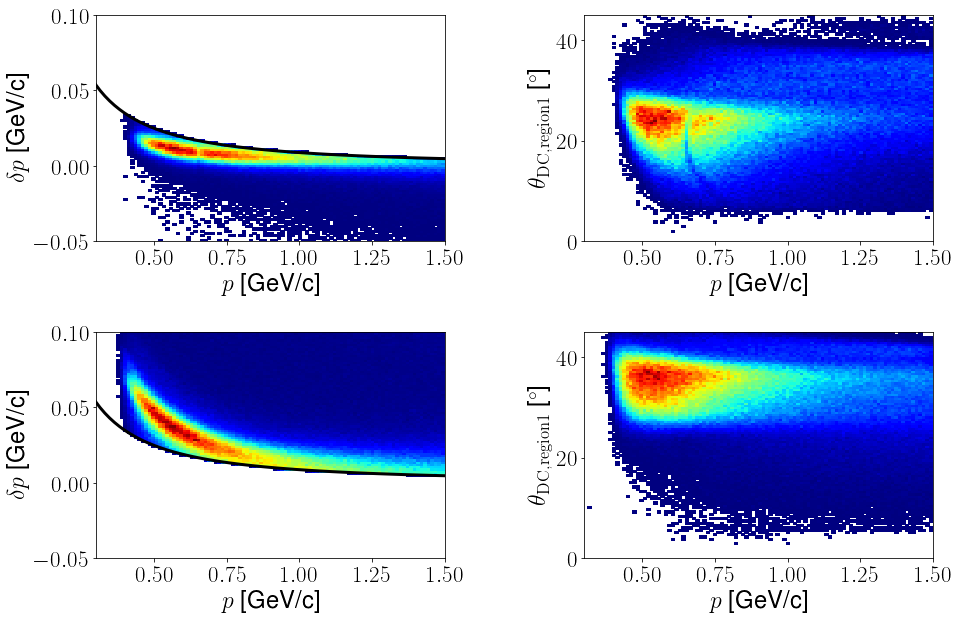

In [128]:
fig, axs = plt.subplots(2,2, figsize = (15, 10))
for row in range(2):
    for col in range(2):
#         ind =col+2*row
        axs[row, col].set_xlabel(r"$p$"+" ["+GeVc+"]")
        if col == 0:
            axs[row, col].set_ylabel(r"$\delta p$"+" ["+GeVc+"]")
        else:
            axs[row, col].set_ylabel(r"$\theta_{\mathrm{DC, region 1}}$"+" ["+degree+"]")
            
axs[0, 0].hist2d(inbending_1.Pp, inbending_1.GenPp - inbending_1.Pp, bins = [np.linspace(0.3, 1.5, 101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
axs[1, 0].hist2d(inbending_2.Pp, inbending_2.GenPp - inbending_2.Pp, bins = [np.linspace(0.3, 1.5, 101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
axs[0, 1].hist2d(inbending_1.Pp, inbending_1.Ptheta, bins = [np.linspace(0.3, 1.5, 101), np.linspace(0, 45, 101)], cmap = cmap, cmin = 1)
axs[1, 1].hist2d(inbending_2.Pp, inbending_2.Ptheta, bins = [np.linspace(0.3, 1.5, 101), np.linspace(0, 45, 101)], cmap = cmap, cmin = 1)
# axs[1, 1].hist2d(Ftof2_inb_nocorr_1.Pp, Ftof2_inb_nocorr_1.GenPp - Ftof2_inb_nocorr_1.Pp, bins = [np.linspace(0.3, 1.5, 101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
t = np.linspace(0.03, 1.7, 101)
axs[0, 0].plot(t, 0.4*0.022/t**1.5, color = 'k', linewidth = 3)
axs[1, 0].plot(t, 0.4*0.022/t**1.5, color = 'k', linewidth = 3)

# axs[0, 0].set_title("Inbending, Forward Detector")
# axs[0, 1].set_title("Inbending, Central Detector")
# axs[1, 0].set_title("Outbending, Forward Detector")
# axs[1, 1].set_title("Outbending, Central Detector")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)
# plt.tight_layout()
# plt.savefig('separator1.pdf')

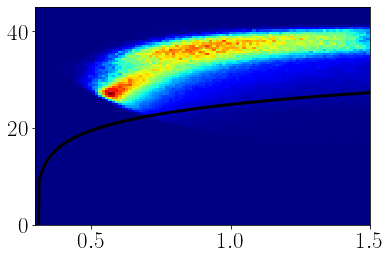

In [40]:
plt.hist2d(outb_FD.Pp, outb_FD.DC1theta, bins = [np.linspace(0.3, 1.5, 101), np.linspace(0, 45, 101)], cmap = cmap, weights = outb_FD.GenPp - outb_FD.Pp)
t = np.linspace(0.3, 1.7, 101)
params = [-53.14680163254601, 79.61307254040804, 0.3, 0.05739232362022314]#best_params#-52.99936209624629, 80.6709735338239, 0.3, 0.06899530845080828]#best_params#[-72.5, 100, 0.3, 0.055]#[-55.5, 80, 0.3, 0.04]
plt.plot(t, corr(params, t), color = 'k', linewidth = 3)
plt.show()

In [11]:
def func(x, t, y):
    return corr(x,t) - y

def corr(x, t):
    x0, x1, x2, x3 = x
    return x0 + x1*np.power(t-np.ones(len(t))*0.3, x3)

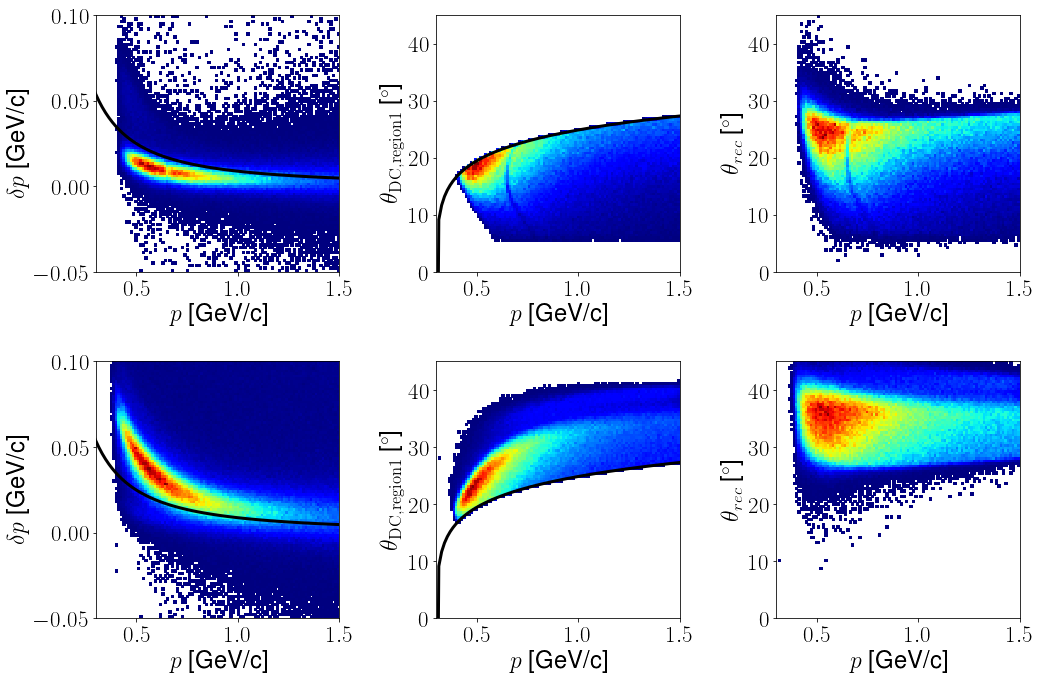

In [14]:
params = [-53.14680163254601, 79.61307254040804, 0.3, 0.05739232362022314]#best_params#-52.99936209624629, 80.6709735338239, 0.3, 0.06899530845080828]#best_params#[-72.5, 100, 0.3, 0.055]#[-55.5, 80, 0.3, 0.04]
inbending_check1 = inbending.loc[inbending.DC1theta < corr(params, inbending.Pp), :]
inbending_check2 = inbending.loc[inbending.DC1theta > corr(params, inbending.Pp), :]

fig, axs = plt.subplots(2,3, figsize = (15, 10))
for row in range(2):
    for col in range(3):
#         ind =col+2*row
        axs[row, col].set_xlabel(r"$p$"+" ["+GeVc+"]")
        if col == 0:
            axs[row, col].set_ylabel(r"$\delta p$"+" ["+GeVc+"]")
        elif col == 1:
            axs[row, col].set_ylabel(r"$\theta_{\mathrm{DC, region 1}}$"+" ["+degree+"]")
        else:
            axs[row, col].set_ylabel(r"$\theta_{rec}$"+" ["+degree+"]")
            
axs[0, 0].hist2d(inbending_check1.Pp, inbending_check1.GenPp - inbending_check1.Pp, bins = [np.linspace(0.3, 1.5, 101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
axs[1, 0].hist2d(inbending_check2.Pp, inbending_check2.GenPp - inbending_check2.Pp, bins = [np.linspace(0.3, 1.5, 101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
axs[0, 1].hist2d(inbending_check1.Pp, inbending_check1.DC1theta, bins = [np.linspace(0.3, 1.5, 101), np.linspace(0, 45, 101)], cmap = cmap, cmin = 1)
axs[1, 1].hist2d(inbending_check2.Pp, inbending_check2.DC1theta, bins = [np.linspace(0.3, 1.5, 101), np.linspace(0, 45, 101)], cmap = cmap, cmin = 1)
axs[0, 2].hist2d(inbending_check1.Pp, inbending_check1.Ptheta, bins = [np.linspace(0.3, 1.5, 101), np.linspace(0, 45, 101)], cmap = cmap, cmin = 1)
axs[1, 2].hist2d(inbending_check2.Pp, inbending_check2.Ptheta, bins = [np.linspace(0.3, 1.5, 101), np.linspace(0, 45, 101)], cmap = cmap, cmin = 1)

t = np.linspace(0.03, 1.7, 101)
axs[0, 0].plot(t, 0.4*0.022/t**1.5, color = 'k', linewidth = 3)
axs[1, 0].plot(t, 0.4*0.022/t**1.5, color = 'k', linewidth = 3)

t = np.linspace(0.3, 1.7, 101)
axs[0, 1].plot(t, corr(params, t), color = 'k', linewidth = 3)
axs[1, 1].plot(t, corr(params, t), color = 'k', linewidth = 3)

# axs[0, 0].set_title("Inbending, Forward Detector")
# axs[0, 1].set_title("Inbending, Central Detector")
# axs[1, 0].set_title("Outbending, Forward Detector")
# axs[1, 1].set_title("Outbending, Central Detector")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)
plt.tight_layout()
plt.savefig('separator2.pdf')

In [95]:
score_1 = [len(inbending_1.loc[inbending_1.DC1theta > corr(best_params, inbending_1.Pp), :]), len(inbending_1.loc[inbending_1.DC1theta < corr(best_params, inbending_1.Pp), :])]
score_2 = [len(inbending_2.loc[inbending_2.DC1theta > corr(best_params, inbending_2.Pp), :]), len(inbending_2.loc[inbending_2.DC1theta < corr(best_params, inbending_2.Pp), :])]
print(score_1, score_2)

[136083, 355608] [774114, 109398]


In [108]:
best_params = [-52.99936209624629, 80.6709735338239, 0.3, 0.06899530845080828]#[-55.5, 80, 0.3, 0.04]#[-72.5, 100, 0.3, 0.055]
score_1 = [len(inbending_1.loc[inbending_1.DC1theta > corr(best_params, inbending_1.Pp), :]), len(inbending_1.loc[inbending_1.DC1theta < corr(best_params, inbending_1.Pp), :])]
score_2 = [len(inbending_2.loc[inbending_2.DC1theta > corr(best_params, inbending_2.Pp), :]), len(inbending_2.loc[inbending_2.DC1theta < corr(best_params, inbending_2.Pp), :])]
best_score = score_1[1] + score_2[0]
trial = 0
for i in range(100000):
    mode = np.random.choice([0,1,2])
    rand = np.random.rand()
    if mode == 0:
        x0 = best_params[0] +  (rand-0.5)* 10
        x1 = best_params[1]
        x2 = best_params[-1]
    if mode == 1:
        x0 = best_params[0]
        x1 = best_params[1] +  (rand-0.5)* 10
        x2 = best_params[-1]
    if mode == 2:
        x0 = best_params[0]
        x1 = best_params[1]
        x2 = best_params[-1] + (rand-0.5)*best_params[-1]*0.5
    params = [x0, x1, 0.3, x2]
    score_1 = [len(inbending_1.loc[inbending_1.DC1theta > corr(params, inbending_1.Pp), :]), len(inbending_1.loc[inbending_1.DC1theta < corr(params, inbending_1.Pp), :])]
    score_2 = [len(inbending_2.loc[inbending_2.DC1theta > corr(params, inbending_2.Pp), :]), len(inbending_2.loc[inbending_2.DC1theta < corr(params, inbending_2.Pp), :])]
    score = score_1[1] + score_2[0]
    if trial%1000==0:
        print(trial, params, score, best_score)
    if score>best_score:
        print("updated!")
        print(trial, params, score, best_score)
        best_params = params
        best_score = score
    trial += 1

0 [-50.33564103402189, 80.6709735338239, 0.3, 0.06899530845080828] 1028391 1129722
updated!
13 [-52.99936209624629, 80.6709735338239, 0.3, 0.06683463730579486] 1130019 1129722
updated!
15 [-52.99936209624629, 80.24116604947899, 0.3, 0.06683463730579486] 1132172 1130019
updated!
17 [-52.99936209624629, 80.21859416909574, 0.3, 0.06683463730579486] 1132178 1132172
updated!
23 [-52.99936209624629, 80.21859416909574, 0.3, 0.06370558168874156] 1133204 1132178
updated!
84 [-52.99936209624629, 80.21859416909574, 0.3, 0.06315829516635836] 1133261 1133204
updated!
102 [-52.99936209624629, 79.61307254040804, 0.3, 0.06315829516635836] 1133567 1133261
updated!
104 [-52.99936209624629, 79.61307254040804, 0.3, 0.059951162295736445] 1135881 1133567
updated!
176 [-52.99936209624629, 79.61307254040804, 0.3, 0.058449889180804064] 1136197 1135881
updated!
247 [-53.09727129223452, 79.61307254040804, 0.3, 0.058449889180804064] 1136411 1136197
updated!
281 [-53.09727129223452, 79.61307254040804, 0.3, 0.05739

KeyboardInterrupt: 

In [ ]:
best_params = [-52.99936209624629, 80.6709735338239, 0.3, 0.06899530845080828]#[-55.5, 80, 0.3, 0.04]#[-72.5, 100, 0.3, 0.055]
score_1 = [len(inbending_1.loc[inbending_1.DC1theta > corr(best_params, inbending_1.Pp), :]), len(inbending_1.loc[inbending_1.DC1theta < corr(best_params, inbending_1.Pp), :])]
score_2 = [len(inbending_2.loc[inbending_2.DC1theta > corr(best_params, inbending_2.Pp), :]), len(inbending_2.loc[inbending_2.DC1theta < corr(best_params, inbending_2.Pp), :])]
best_score = score_1[1] + score_2[0]
trial = 0
for i in range(100000):
    mode = np.random.choice([0,1,2])
    rand = np.random.rand()
    if mode == 0:
        x0 = best_params[0] +  (rand-0.5)* 10
        x1 = best_params[1]
        x2 = best_params[-1]
    if mode == 1:
        x0 = best_params[0]
        x1 = best_params[1] +  (rand-0.5)* 10
        x2 = best_params[-1]
    if mode == 2:
        x0 = best_params[0]
        x1 = best_params[1]
        x2 = best_params[-1] + (rand-0.5)*best_params[-1]*0.5
    params = [x0, x1, 0.3, x2]
    score_1 = [len(inbending_1.loc[inbending_1.DC1theta > corr(params, inbending_1.Pp), :]), len(inbending_1.loc[inbending_1.DC1theta < corr(params, inbending_1.Pp), :])]
    score_2 = [len(inbending_2.loc[inbending_2.DC1theta > corr(params, inbending_2.Pp), :]), len(inbending_2.loc[inbending_2.DC1theta < corr(params, inbending_2.Pp), :])]
    score = score_1[1] + score_2[0]
    if trial%1000==0:
        print(trial, params, score, best_score)
    if score>best_score:
        print("updated!")
        print(trial, params, score, best_score)
        best_params = params
        best_score = score
    trial += 1

In [130]:
print(best_params)

[-53.14680163254601, 79.61307254040804, 0.3, 0.05739232362022314]


In [14]:
inbending_check1 = inbending.loc[inbending.DC1theta < corr([-53.14680163254601, 79.61307254040804, 0.3, 0.05739232362022314], inbending.Pp), :]
inbending_check2 = inbending.loc[inbending.DC1theta > corr([-53.14680163254601, 79.61307254040804, 0.3, 0.05739232362022314], inbending.Pp), :]


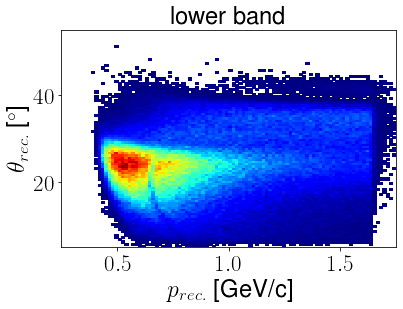

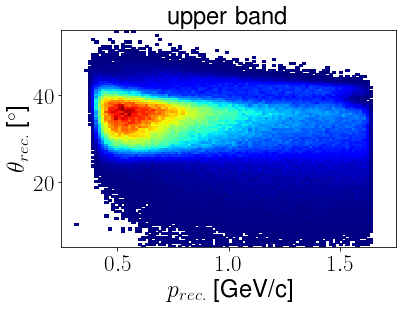

In [69]:
plt.hist2d(inbending_1.Pp, inbending_1.Ptheta, bins = [np.linspace(0.25, 1.75, 101), np.linspace(5, 55, 101)], cmap = cmap, cmin = 1)
plt.xlabel(r"$p_{rec.}$"+" ["+GeVc+"]")
plt.ylabel(r"$\theta_{rec.}$"+" ["+degree+"]")
plt.title("lower band")
plt.show()
plt.hist2d(inbending_2.Pp, inbending_2.Ptheta, bins = [np.linspace(0.25, 1.75, 101), np.linspace(5, 55, 101)], cmap = cmap, cmin = 1)
plt.xlabel(r"$p_{rec.}$"+" ["+GeVc+"]")
plt.ylabel(r"$\theta_{rec.}$"+" ["+degree+"]")
plt.title("upper band")
plt.show()

<AxesSubplot:>

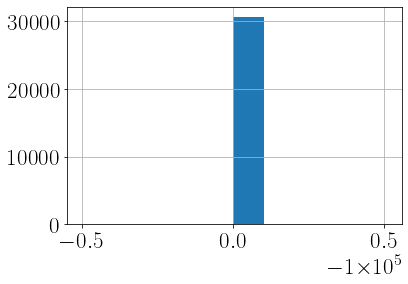

In [78]:
Ftof1_inb_nocorr.PCtofHitx.hist()

In [79]:
Ftof2_inb_nocorr_1 = Ftof2_inb_nocorr[Ftof2_inb_nocorr.GenPp - Ftof2_inb_nocorr.Pp - 0.4*0.022/Ftof2_inb_nocorr.Pp**1.5<0]
Ftof2_inb_nocorr_2 = Ftof2_inb_nocorr[Ftof2_inb_nocorr.GenPp - Ftof2_inb_nocorr.Pp - 0.4*0.022/Ftof2_inb_nocorr.Pp**1.5>0]
Ftof1_inb_nocorr_1 = Ftof1_inb_nocorr[Ftof1_inb_nocorr.GenPp - Ftof1_inb_nocorr.Pp - 0.4*0.022/Ftof1_inb_nocorr.Pp**1.5<0]
Ftof1_inb_nocorr_2 = Ftof1_inb_nocorr[Ftof1_inb_nocorr.GenPp - Ftof1_inb_nocorr.Pp - 0.4*0.022/Ftof1_inb_nocorr.Pp**1.5>0]

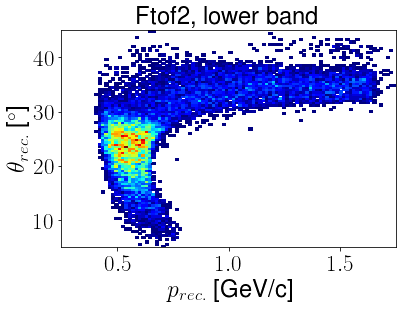

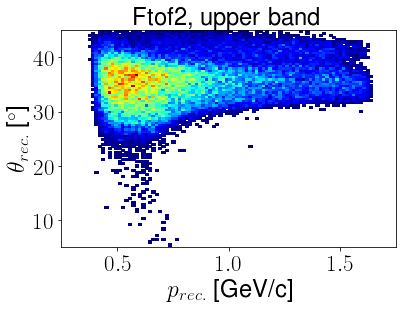

In [85]:
plt.hist2d(Ftof2_inb_nocorr_1.Pp, Ftof2_inb_nocorr_1.Ptheta, bins = [np.linspace(0.25, 1.75, 101), np.linspace(5, 45, 101)], cmap = cmap, cmin = 1)
plt.xlabel(r"$p_{rec.}$"+" ["+GeVc+"]")
plt.ylabel(r"$\theta_{rec.}$"+" ["+degree+"]")
plt.title("Ftof2, lower band")
plt.show()
plt.hist2d(Ftof2_inb_nocorr_2.Pp, Ftof2_inb_nocorr_2.Ptheta, bins = [np.linspace(0.25, 1.75, 101), np.linspace(5, 45, 101)], cmap = cmap, cmin = 1)
plt.xlabel(r"$p_{rec.}$"+" ["+GeVc+"]")
plt.ylabel(r"$\theta_{rec.}$"+" ["+degree+"]")
plt.title("Ftof2, upper band")
plt.show()

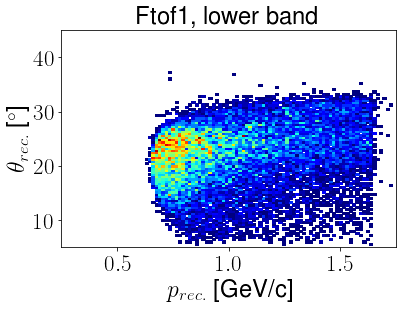

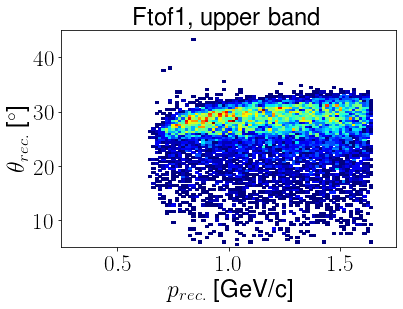

In [84]:
plt.hist2d(Ftof1_inb_nocorr_1.Pp, Ftof1_inb_nocorr_1.Ptheta, bins = [np.linspace(0.25, 1.75, 101), np.linspace(5, 45, 101)], cmap = cmap, cmin = 1)
plt.xlabel(r"$p_{rec.}$"+" ["+GeVc+"]")
plt.ylabel(r"$\theta_{rec.}$"+" ["+degree+"]")
plt.title("Ftof1, lower band")
plt.show()
plt.hist2d(Ftof1_inb_nocorr_2.Pp, Ftof1_inb_nocorr_2.Ptheta, bins = [np.linspace(0.25, 1.75, 101), np.linspace(5, 45, 101)], cmap = cmap, cmin = 1)
plt.xlabel(r"$p_{rec.}$"+" ["+GeVc+"]")
plt.ylabel(r"$\theta_{rec.}$"+" ["+degree+"]")
plt.title("Ftof1, upper band")
plt.savefig("ftof1_theta_vs_p.")

In [15]:
inbending_check1 

PDc1Hitx   PDc1Hity    PDc1Hitz     Etheta        Ep     GenEp  \
25     -46.669067 -33.886097  234.810303  12.568555  6.031919  6.024224   
80      66.961426  74.566757  213.645859   8.862466  6.725447  6.741791   
87     -76.846100  54.331219  219.512100  11.137386  6.623916  6.677646   
96     -32.620285  63.964066  225.940430  17.095163  3.962006  3.983938   
100    -52.903503 -49.874218  226.898148  12.326439  6.870960  6.887435   
...           ...        ...         ...        ...       ...       ...   
791067 -20.952223  89.249649  218.450317  14.104561  5.347109  5.345028   
791116  56.981312 -19.568464  232.806564  20.533581  3.689589  3.706248   
791176  38.831524 -10.911106  241.271973  25.133478  3.645536  3.672176   
791207  29.655693  84.337105  218.403732  13.277551  5.491410  5.565773   
791208  47.851608  42.330887  231.123276  22.125841  4.308233  4.265872   

              Pp     Ptheta        Pphi     GenPp  GenPtheta     GenPphi  \
25      0.600075  17.217546  164.990413  0.607306  17.054604  166.790793   
80      1.307827  25.923704   24.239256  1.303526  26.170060   24.170943   
87      0.849446  26.060281  108.074100  0.856477  25.460088  108.380816   
96      0.459535  27.687227   48.347879  0.477544  25.893985   50.838175   
100     0.786748  20.032049 -174.287307  0.793757  19.849128 -174.784400   
...          ...        ...         ...       ...        ...         ...   
791067  0.975751  24.623918   71.525734  0.982008  24.512605   71.689567   
791116  0.472931  21.648369  -86.244832  0.482066  20.512959  -80.080436   
791176  1.096945  10.396842  -41.754520  1.099656   9.985067  -42.534447   
791207  0.797378  23.326611   29.163195  0.799578  25.280581   30.071640   
791208  0.800670  18.406037   -0.987128  0.809510  16.912188    3.700785   

         DC1theta  
25      13.799742  
80      25.130978  
87      23.206553  
96      17.629759  
100     17.767340  
...           ...  
791067  22.766108  
791116  14.509206  
791176   9.490820  
791207  22.260746  
791208  15.452077  

[432413 rows x 13 columns]

In [17]:
def fun(x, t, y):
    return x[0] + x[1]/t - y

def correction(x, t):
    x0, x1 = x
    return x0 + x1/t

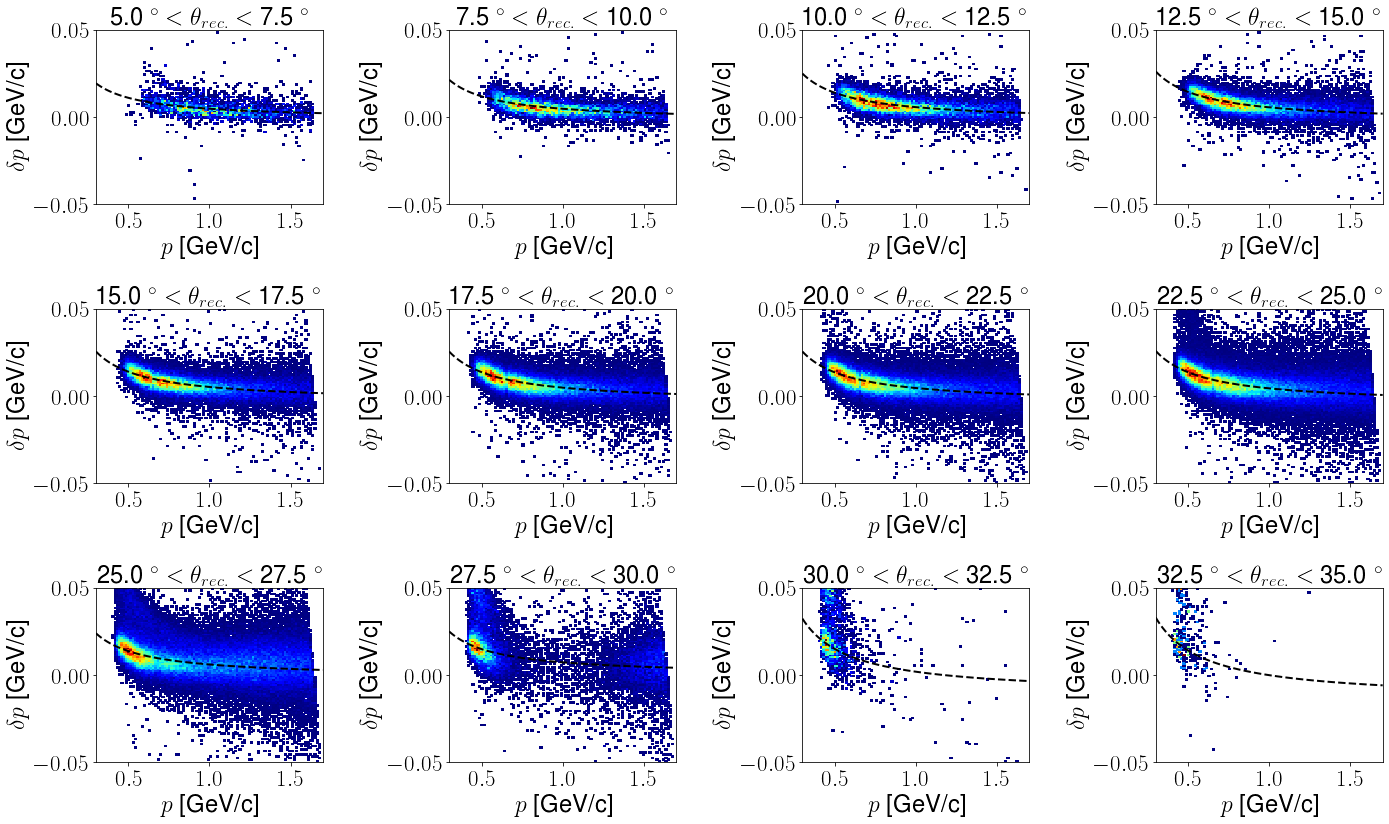

In [132]:
param1_p, param2_p = [-0.00051894, -0.00018104], [ 3.29466917e-03,  5.73663160e-04, -1.40807209e-05]
x = np.linspace(0, 11, 12)*2.5+ 5 + 1.25
fig, axs = plt.subplots(3,4, figsize=(20,12))
for row in range(3):
    for col in range(4):
        ind =col+4*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbending_check1.Ptheta >= 2.5*ind+5) & (inbending_check1.Ptheta < 2.5*(ind+1)+5)
        axs[row, col].hist2d(inbending_check1.loc[thetaCond, "Pp"], inbending_check1.loc[thetaCond, "GenPp"] - inbending_check1.loc[thetaCond, "Pp"], bins = [np.linspace(0.3, 1.7, 101), np.linspace(-0.05, 0.05, 101)], cmap = cmap, cmin =1)
        param = params_p[ind]
#         param = [correction2(param1_p, x[ind]), correction3(param2_p, x[ind])]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 101), correction(param, np.linspace(0.3, 1.7, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(2.5*ind+5)+" "+degree + r" $<\theta_{rec.}<$ " + str(2.5*(ind+1)+5)+" "+degree)
plt.tight_layout()
# plt.show()
plt.savefig("protonFD_inb_mom_1_procedure.pdf")

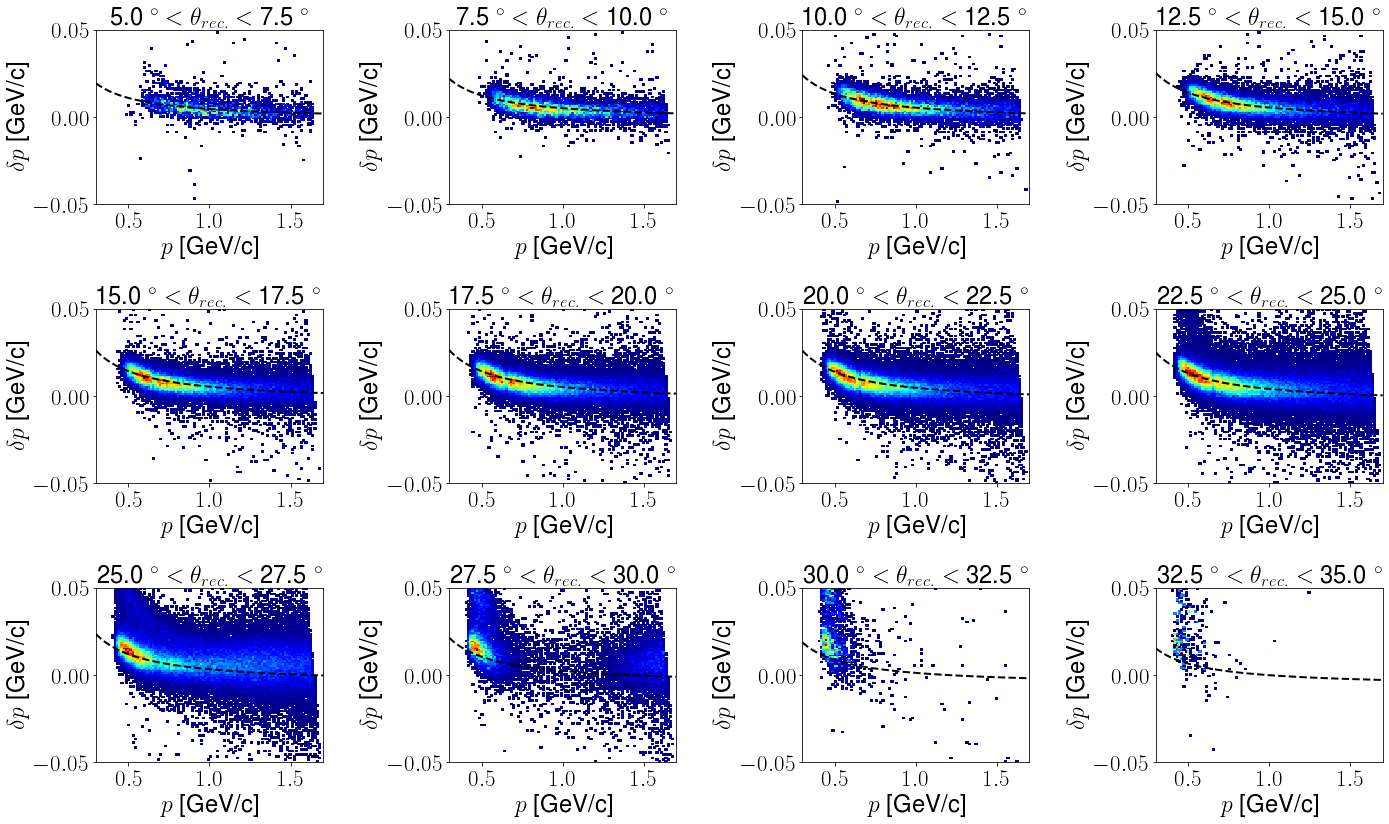

In [133]:
param1_p, param2_p = [-0.00051894, -0.00018104], [ 3.29466917e-03,  5.73663160e-04, -1.40807209e-05]
x = np.linspace(0, 11, 12)*2.5+ 5 + 1.25
fig, axs = plt.subplots(3,4, figsize=(20,12))
for row in range(3):
    for col in range(4):
        ind =col+4*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbending_check1.Ptheta >= 2.5*ind+5) & (inbending_check1.Ptheta < 2.5*(ind+1)+5)
        axs[row, col].hist2d(inbending_check1.loc[thetaCond, "Pp"], inbending_check1.loc[thetaCond, "GenPp"] - inbending_check1.loc[thetaCond, "Pp"], bins = [np.linspace(0.3, 1.7, 101), np.linspace(-0.05, 0.05, 101)], cmap = cmap, cmin =1)
#         param = params_p[ind]
        param = [correction2(param1_p, x[ind]), correction3(param2_p, x[ind])]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 101), correction(param, np.linspace(0.3, 1.7, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(2.5*ind+5)+" "+degree + r" $<\theta_{rec.}<$ " + str(2.5*(ind+1)+5)+" "+degree)
plt.tight_layout()
# plt.show()
plt.savefig("protonFD_inb_mom_1.pdf")

In [72]:
params_p = []
uncertainties_p = []
x0 = [-4.80389058e-05,  4.53222098e-03]
# loss = []
for i in range(12):
#     if ind<3:
#         x0 = [-0.00497,  0.00989223]
#     else:
#         x0 = [-0.02097534,  0.03317596]

    #from previous fit
#     x0s = [[-0.00954028,  0.01301059], [-0.00707975,  0.01093971], [-0.00438814,  0.00959533], [-0.01717612,  0.02865886], [-0.02014798,  0.0338319 ], [-0.03188756,  0.04206616]]
#     x0 = x0s[ind//2]

#     x0s = [[-4.80389058e-05,  4.53222098e-03],
#            [-1.23041956e-03,  6.05807042e-03],
#            [-1.76384255e-03,  6.72228344e-03],
#            [-1.88736661e-03,  7.02802014e-03],
#            [-1.79354781e-03,  7.24121971e-03],
#            [-2.90571633e-03,  9.42541929e-03],
#            [-9.47461186e-03,  1.98311802e-02],
#            [-8.07962821e-03,  1.98069365e-02],
#            [-9.23283528e-03,  2.19080106e-02],
#            [-9.56769814e-03,  2.29519214e-02],
#            [-9.68958476e-03,  2.28616792e-02],
#            [-1.10693927e-02,  2.45928549e-02],
#            [-1.03538529e-02,  2.48101827e-02],
#            [-1.12320275e-02,  2.59453728e-02],
#            [-1.24223334e-02,  2.73036576e-02],
#            [-1.19610320e-02,  2.74316186e-02],
#            [-1.25053015e-02,  2.80233161e-02],
#            [-1.49314572e-02,  2.99888234e-02],
#            [-1.60389360e-02,  3.06035474e-02],
#            [-2.36705524e-02,  3.55724193e-02]]
#     x0 = x0s[ind]
    
    thetaCond = (inbending_check1.Ptheta >= 2.5*i+5) & (inbending_check1.Ptheta < 2.5*(i+1)+5)
    dfi = copy(inbending_check1.loc[thetaCond, ["Pp", "GenPp"]])
    dffit = copy(dfi[np.abs(dfi["GenPp"]-dfi["Pp"]-correction(x0, dfi["Pp"]))<0.01])
    for i in range (0, 5):
        res_lsq = least_squares(fun, x0, args=(dffit["Pp"], (dffit["GenPp"]-dffit["Pp"])))    
        dffit = copy(dfi[np.abs(dfi["GenPp"]-dfi["Pp"]-correction(res_lsq.x, dfi["Pp"]))<0.01])
        x0 = res_lsq.x
    
    params_p.append(res_lsq.x)
    
    # uncertainty
    # https://github.com/scipy/scipy/blob/2526df72e5d4ca8bad6e2f4b3cbdfbc33e805865/scipy/optimize/minpack.py#L739
    _, s, VT = np.linalg.svd(res_lsq.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(res_lsq.jac.shape) * s[0]
    s = s[s > threshold]
    VT = VT[:s.size]
    pcov = np.dot(VT.T / s**2, VT)
    s_sq = np.sum((dfi["GenPp"]-dfi["Pp"]-correction(res_lsq.x, dfi["Pp"]))**2) / (len(dfi) - len(x0))
    pcov = pcov * s_sq
    uncertainties_p.append(np.sqrt(np.diag(pcov)))

In [79]:
params_p = np.array(params_p)
consts_p = params_p[:, 0]
coeffs_p = params_p[:, 1]

uncertainties_p = np.array(uncertainties_p)
consts_uncertainties_p = uncertainties_p[:, 0]
coeffs_uncertainties_p = uncertainties_p[:, 1]

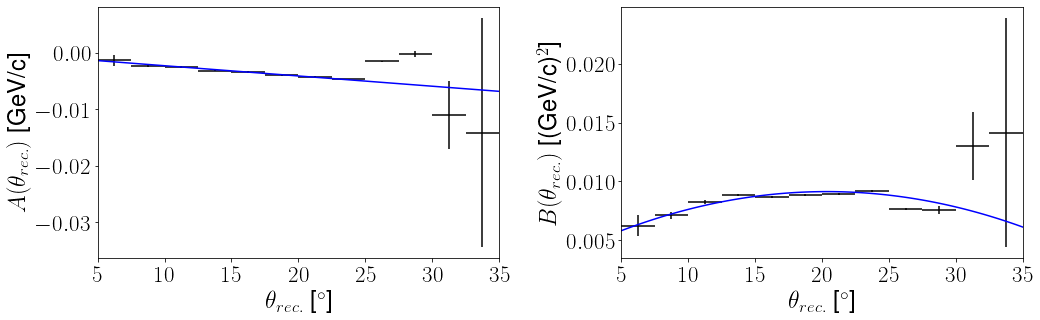

In [83]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].errorbar(np.linspace(0, 11, 12)*2.5+ 5 + 1.25, consts_p, xerr= 1.25, yerr = consts_uncertainties_p, color='k', linestyle = '')
ax[1].errorbar(np.linspace(0, 11, 12)*2.5+ 5 + 1.25, coeffs_p, xerr= 1.25, yerr = coeffs_uncertainties_p, color='k', linestyle = '')
ax[0].plot(np.linspace(5, 35, 101), correction2(param1_p, np.linspace(5, 35, 101)), color = 'b')
ax[1].plot(np.linspace(5, 35, 101), correction3(param2_p, np.linspace(5, 35, 101)), color = 'b')
ax[0].set_xlabel(r"$\theta_{rec.}$"+" ["+degree+"]")
ax[0].set_ylabel(r"$A(\theta_{rec.})$"+" ["+GeVc+"]")
ax[0].set_xlim([5, 35])
ax[0].set_xticks(np.linspace(5, 35, 7))
ax[1].set_xlim([5, 35])
ax[1].set_xticks(np.linspace(5, 35, 7))
ax[1].set_xlabel(r"$\theta_{rec.}$"+" ["+degree+"]")
ax[1].set_ylabel(r"$B(\theta_{rec.})$"+" ["+GeVc2+"]")
plt.tight_layout()
# plt.show()
plt.savefig("coeff_example.pdf")

In [81]:
print(param1_p, param2_p)

[-0.00051894 -0.00018104] [ 3.29466917e-03  5.73663160e-04 -1.40807209e-05]


In [16]:
def fun2(x, t, y):
    return x[0] + x[1]*t- y
def correction2(x, t):
    x0, x1 = x
    return x0 + x1*t

def fun3(x, t, y):
    return x[0] + x[1]*t + x[2]*t*t - y
def correction3(x, t):
    x0, x1, x2 = x
    return x0 + x1*t + x2*t*t

def fun5(x, t, y):
    return correction5(x, t) - y
def correction5(x,t):
    x0, x1, x2, x3 = x
    return x0 + x1*t + x2*t*t +x3*t*t*t

In [78]:
x = np.linspace(0, 11, 12)*2.5+ 5 + 1.25
x = x[:-4]
res_lsq = least_squares(fun2, [0.005, -0.002], args=(x, consts_p[:-4]))    
param1_p = res_lsq.x
res_lsq = least_squares(fun3, [0, 0, 0], args=(x, coeffs_p[:-4]))    
param2_p = res_lsq.x

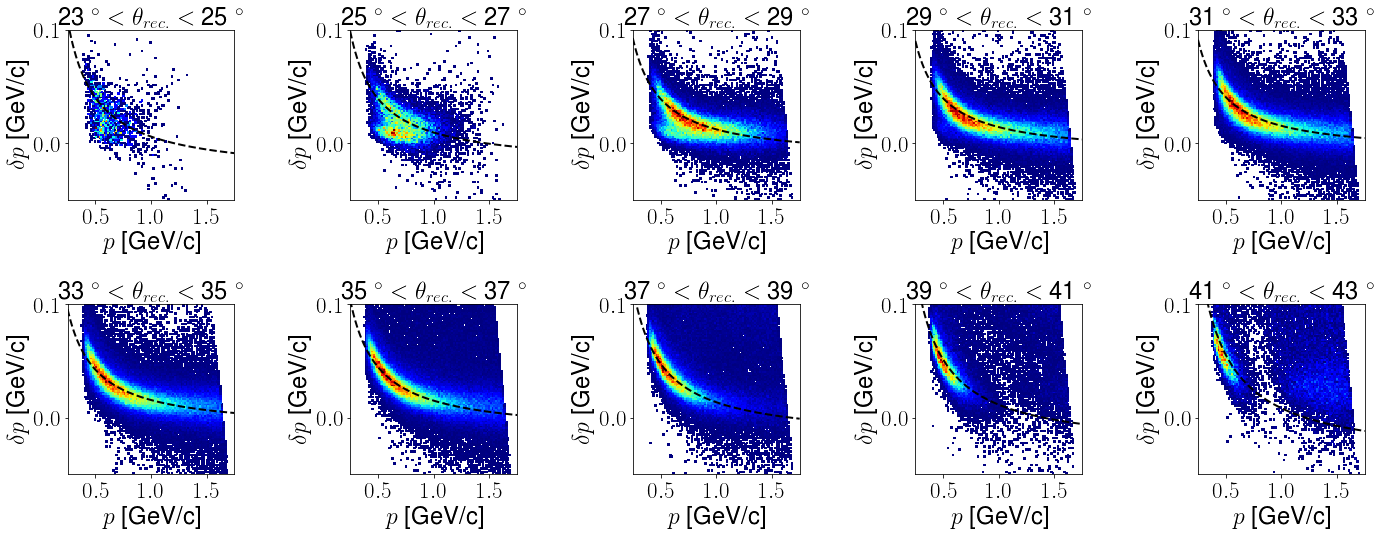

In [134]:
fig, axs = plt.subplots(2,5, figsize=(20,8))
for row in range(2):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbending_check2.Ptheta >= 2*ind+23) & (inbending_check2.Ptheta < 2*(ind+1)+23)
        axs[row, col].hist2d(inbending_check2.loc[thetaCond, "Pp"], inbending_check2.loc[thetaCond, "GenPp"] - inbending_check2.loc[thetaCond, "Pp"], bins = [np.linspace(0.25, 1.75, 101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin =1)
        theta = np.linspace(23, 41, 10)[ind]+1
        const_FD = -3.03346359*10**(-1) + 1.83368163*10**(-2)*theta - 2.86486404*10**(-4)*theta*theta
        coeff_FD =  2.01023276*10**(-1) - 1.13312215*10**(-2)*theta + 1.82487916*10**(-4)*theta*theta

        param = [const_FD, coeff_FD]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.25, 1.75, 101), correction(param, np.linspace(0.25, 1.75, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(2*ind+23)+" "+degree + r" $<\theta_{rec.}<$ " + str(2*(ind+1)+23)+" "+degree)
plt.tight_layout()
plt.savefig("protonFD_inb_mom_2.pdf")

In [362]:
params_p = []
uncertainties_p = []
x0 = [-1.12320275e-02,  2.59453728e-02]
# loss = []
for i in range(10):
#     x0 = [-1.12320275e-02,  2.59453728e-02]
    
    thetaCond = (inbending_check2.Ptheta >= 2*i+23) & (inbending_check2.Ptheta < 2*(i+1)+23)
    dfi = copy(inbending_check2.loc[thetaCond, ["Pp", "GenPp"]])
    dffit = copy(dfi[np.abs(dfi["GenPp"]-dfi["Pp"]-correction(x0, dfi["Pp"]))<0.01])
    for i in range (0, 5):
        res_lsq = least_squares(fun, x0, args=(dffit["Pp"], (dffit["GenPp"]-dffit["Pp"])))    
        dffit = copy(dfi[np.abs(dfi["GenPp"]-dfi["Pp"]-correction(res_lsq.x, dfi["Pp"]))<0.01])
        x0 = res_lsq.x
    
    params_p.append(res_lsq.x)
    
    # uncertainty
    # https://github.com/scipy/scipy/blob/2526df72e5d4ca8bad6e2f4b3cbdfbc33e805865/scipy/optimize/minpack.py#L739
    _, s, VT = np.linalg.svd(res_lsq.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(res_lsq.jac.shape) * s[0]
    s = s[s > threshold]
    VT = VT[:s.size]
    pcov = np.dot(VT.T / s**2, VT)
    s_sq = np.sum((dfi["GenPp"]-dfi["Pp"]-correction(res_lsq.x, dfi["Pp"]))**2) / (len(dfi) - len(x0))
    pcov = pcov * s_sq
    uncertainties_p.append(np.sqrt(np.diag(pcov)))

In [363]:
params_p = np.array(params_p)
consts_p = params_p[:, 0]
coeffs_p = params_p[:, 1]

uncertainties_p = np.array(uncertainties_p)
consts_uncertainties_p = uncertainties_p[:, 0]
coeffs_uncertainties_p = uncertainties_p[:, 1]

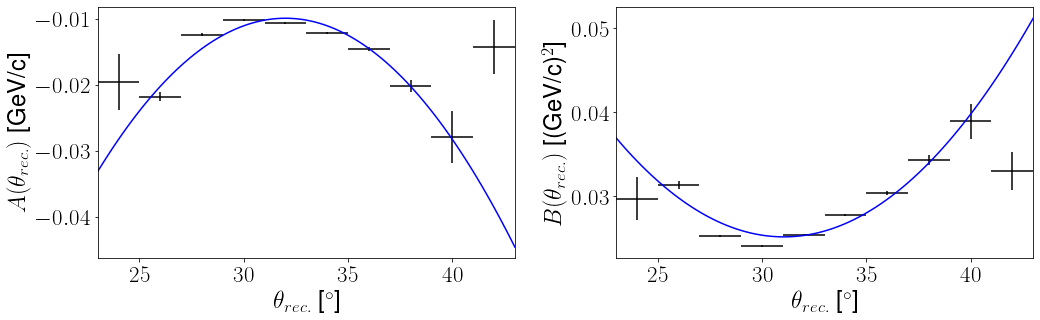

In [366]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].errorbar(np.linspace(0, 9, 10)*2+ 23 + 1, consts_p, xerr= 1, yerr = consts_uncertainties_p, color='k', linestyle = '')
ax[1].errorbar(np.linspace(0, 9, 10)*2+ 23 + 1, coeffs_p, xerr= 1, yerr = coeffs_uncertainties_p, color='k', linestyle = '')
ax[0].plot(np.linspace(23, 43, 101), correction3(param1_p, np.linspace(23, 43, 101)), color = 'b')
ax[1].plot(np.linspace(23, 43, 101), correction3(param2_p, np.linspace(23, 43, 101)), color = 'b')
ax[0].set_xlabel(r"$\theta_{rec.}$"+" ["+degree+"]")
ax[0].set_ylabel(r"$A(\theta_{rec.})$"+" ["+GeVc+"]")
ax[0].set_xlim([23, 43])
# ax[0].set_xticks(np.linspace(5, 35, 7))
ax[1].set_xlim([23, 43])
# ax[1].set_xticks(np.linspace(5, 35, 7))
ax[1].set_xlabel(r"$\theta_{rec.}$"+" ["+degree+"]")
ax[1].set_ylabel(r"$B(\theta_{rec.})$"+" ["+GeVc2+"]")
plt.tight_layout()
plt.show()
# plt.savefig("correction_phi.pdf")

In [342]:
x = np.linspace(0, 9, 10)*2+ 23 + 1
x = x[1:-1]
res_lsq = least_squares(fun3, [0, 0, 0], args=(x, consts_p[1:-1]))    
param1_p = res_lsq.x
res_lsq = least_squares(fun3, [0, 0, 0], args=(x, coeffs_p[1:-1]))    
param2_p = res_lsq.x

In [343]:
print(param1_p, param2_p)

[-3.03346359e-01  1.83368163e-02 -2.86486404e-04] [ 2.01023276e-01 -1.13312215e-02  1.82487916e-04]


In [9]:
inbending = inb_FD
# Ftof2_inb_nocorr_1 = Ftof2_inb_nocorr[Ftof2_inb_nocorr.PFtof2Path2- Ftof2_inb_nocorr.PFtof2Path-40*(1/Ftof2_inb_nocorr.Pp-1/0.4)-50<0]
# Ftof2_inb_nocorr_2 = Ftof2_inb_nocorr[(Ftof2_inb_nocorr.PFtof2Path2- Ftof2_inb_nocorr.PFtof2Path-40*(1/Ftof2_inb_nocorr.Pp-1/0.4)-50>0) & (Ftof2_inb_nocorr.PFtof2Path2- Ftof2_inb_nocorr.PFtof2Path-55*(1/Ftof2_inb_nocorr.Pp-1/0.4)-100<0)]
# Ftof2_inb_nocorr_3 = Ftof2_inb_nocorr[(Ftof2_inb_nocorr.PFtof2Path2- Ftof2_inb_nocorr.PFtof2Path-55*(1/Ftof2_inb_nocorr.Pp-1/0.4)-100>0)]
inbending.loc[:, "DC1theta"] = getTheta([inbending.PDc1Hitx, inbending.PDc1Hity, inbending.PDc1Hitz])
inbending_1 = inbending[inbending.GenPp - inbending.Pp - 0.4*0.022/inbending.Pp**1.5<0]
inbending_2 = inbending[inbending.GenPp - inbending.Pp - 0.4*0.022/inbending.Pp**1.5>0]

In [12]:
params = [-53.14680163254601, 79.61307254040804, 0.3, 0.05739232362022314]#best_params#-52.99936209624629, 80.6709735338239, 0.3, 0.06899530845080828]#best_params#[-72.5, 100, 0.3, 0.055]#[-55.5, 80, 0.3, 0.04]
inbending_check1 = inbending.loc[inbending.DC1theta < corr(params, inbending.Pp), :]
inbending_check2 = inbending.loc[inbending.DC1theta > corr(params, inbending.Pp), :]

In [137]:
def fun4(x, t, y):
    return x[0] + x[1]*np.exp(x[2]*t) - y
def correction4(x, t):
    x0, x1, x2 = x
    return x0 + x1*np.exp(x2*t)

def fun6(x, t, y):
    return correction6(x,t) - y
def correction6(x, t):
    x0, x1 = x
    return x0 + x1/t**2

def fun7(x, t, y):
    return correction7(x,t) - y
def correction7(x, t):
    x0, x1 = x
    return x0 + x1/t

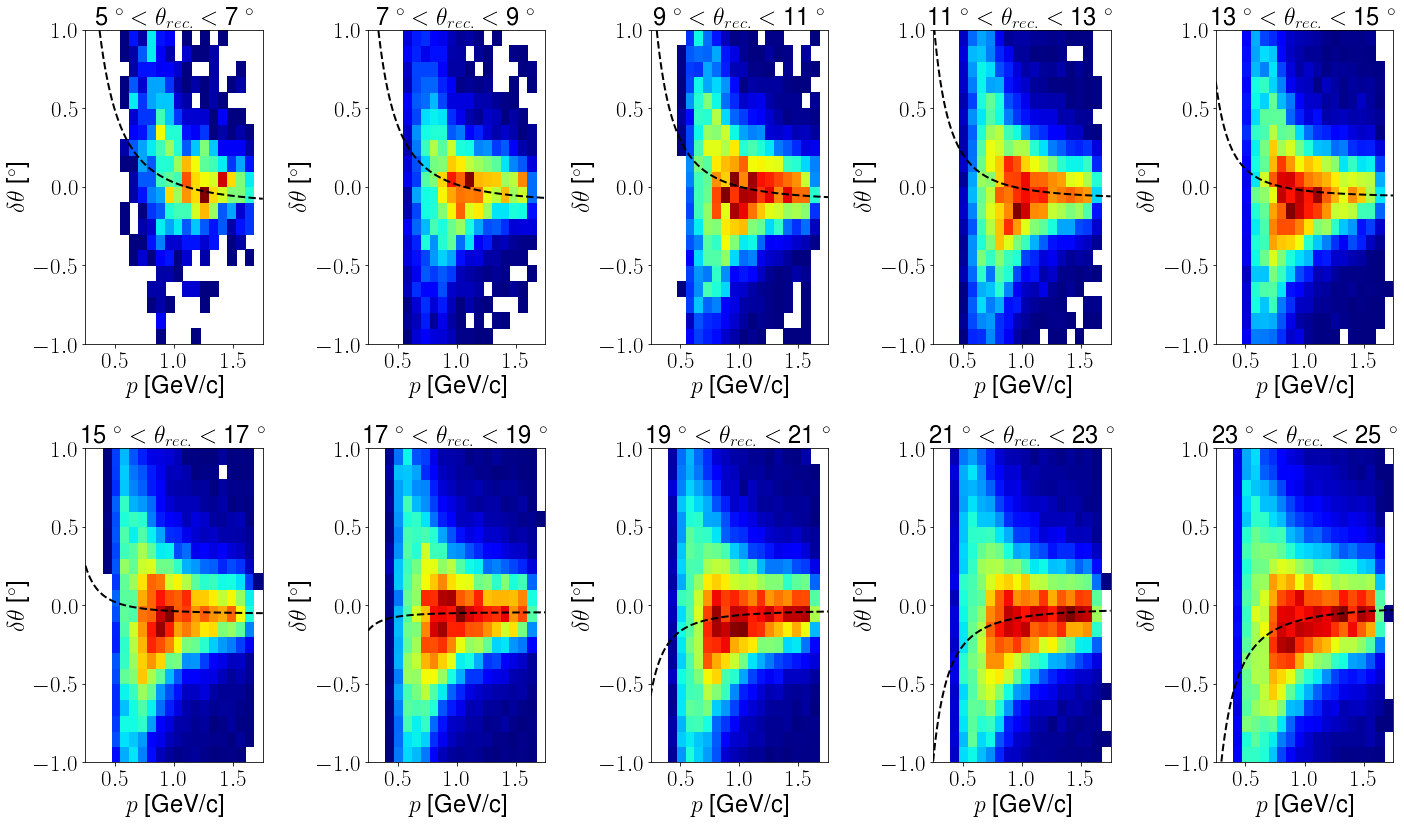

In [152]:
x = 2*np.linspace(0, 9, 10)+6
fig, axs = plt.subplots(2,5, figsize=(20,12))
param1_theta, param2_theta = [-0.16742969,  0.00697925], [ 0.23352115, -0.01338697]
for row in range(2):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbending_check1.Ptheta >= 2*ind+5) & (inbending_check1.Ptheta < 2*(ind+1)+5)
#         param = params_theta[ind]
#         axs[row, col].hist2d(inbending_check1.loc[thetaCond, "Pp"], inbending_check1.loc[thetaCond, "GenPtheta"] - inbending_check1.loc[thetaCond, "Ptheta"] - correction4(param, inbending_check1.loc[thetaCond, "Pp"]), bins = [np.linspace(0.3, 1.7, 21), np.linspace(-1, 1 , 21)], cmap = cmap, cmin =1)
        axs[row, col].hist2d(inbending_check1.loc[thetaCond, "Pp"], inbending_check1.loc[thetaCond, "GenPtheta"] - inbending_check1.loc[thetaCond, "Ptheta"], bins = [np.linspace(0.25, 1.75, 21), np.linspace(-1, 1 , 21)], cmap = cmap, cmin =1)
        theta = (ind) + 5 + 0.5
#         param = params_theta[ind]
#         param = params_theta[ind]
        param = [correction2(param1_theta, x[ind]), correction2(param2_theta, x[ind])]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.25, 1.75, 101), correction6(param, np.linspace(0.25, 1.75, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_ylim(-2, 2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+5)+" "+degree + r" $<\theta_{rec.}<$ " + str(2*(ind+1)+5)+" "+degree)
plt.tight_layout()
# plt.show()
# plt.savefig("correction_p_result.pdf")
plt.savefig("protonFD_inb_theta_1.pdf")

In [142]:
params_theta = []
uncertainties_theta = []
# loss = []
x0 = [0, 1]
x0 = [0, -1]
for i in range(10):
    thetaCond = (inbending_check1.Ptheta >= 2*i+5) & (inbending_check1.Ptheta < 2*(i+1)+5)
    dfi = copy(inbending_check1.loc[thetaCond, ["Pp", "GenPtheta", "Ptheta"]])
    theta = 2*(i)+5 + 1
#     if theta < 7:
#         x0 = [0.0264, 1.464, -3.4769]
#     elif theta < 21:
#         x0 = [0.15450021, -0.64675789, -1.02509569]
#     else:
#         x0 = [0.50047232 -0.03834672 *theta + 0.00071967*theta*theta, 74.99891704  -6.1576777*theta + 0.11469137*theta*theta, 47.71351973 -4.34918241*theta + 0.08841191*theta*theta]
#     else:
#         params_theta.append(x0)
#         continue
    dffit = copy(dfi[np.abs(dfi["GenPtheta"]-dfi["Ptheta"])<3])
#     dffit = copy(dffit[np.abs(dffit["GenPtheta"]-dffit["Ptheta"]-correction4(x0, dffit["Pp"]))<1])

    for i in range (0, 4):
        res_lsq = least_squares(fun6, x0, args=(dffit["Pp"], (dffit["GenPtheta"]-dffit["Ptheta"])))    
        dffit = copy(dfi[np.abs(dfi["GenPtheta"]-dfi["Ptheta"]-correction6(res_lsq.x, dfi["Pp"]))<1])
        x0 = res_lsq.x
    
    params_theta.append(res_lsq.x)
    
    # uncertainty
    # https://github.com/scipy/scipy/blob/2526df72e5d4ca8bad6e2f4b3cbdfbc33e805865/scipy/optimize/minpack.py#L739
    _, s, VT = np.linalg.svd(res_lsq.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(res_lsq.jac.shape) * s[0]
    s = s[s > threshold]
    VT = VT[:s.size]
    pcov = np.dot(VT.T / s**2, VT)
    s_sq = np.sum((dfi["GenPtheta"]-dfi["Ptheta"]-correction6(res_lsq.x, dfi["Pp"]))**2) / (len(dfi) - len(x0))
    pcov = pcov * s_sq
    uncertainties_theta.append(np.sqrt(np.diag(pcov)))
    print(theta, x0)
#     x0 = res_lsq.x

6 [-0.233854    0.41627913]
8 [-0.10230798  0.12934906]
10 [-0.09899121  0.1074801 ]
12 [-0.09924897  0.08219062]
14 [-0.06639263  0.03283221]
16 [-0.04978407  0.00431874]
18 [-0.04619323 -0.00828484]
20 [-0.02686251 -0.03811854]
22 [-0.01445168 -0.05846922]
24 [ 0.00236612 -0.0773317 ]


In [146]:
params_theta = np.array(params_theta)
consts_theta = params_theta[:, 0]
coeffs_theta = params_theta[:, 1]
# coeffs2_theta = params_theta[:, 2]

uncertainties_theta = np.array(uncertainties_theta)
consts_uncertainties_theta = uncertainties_theta[:, 0]
coeffs_uncertainties_theta = uncertainties_theta[:, 1]
# coeffs2_uncertainties_theta = uncertainties_theta[:, 2]

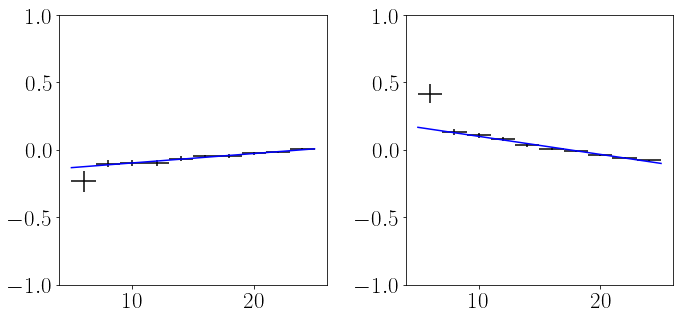

In [147]:
# fig, ax = plt.subplots(1,3, figsize=(15,5))
# x = np.linspace(0, 9,10)*2+20
# # ax[0].errorbar(x[:-2], consts_theta[:-2], xerr= 1, yerr = consts_uncertainties_theta[:-2], color='k', linestyle = '')
# # ax[1].errorbar(x[:-2], coeffs_theta[:-2], xerr= 1, yerr = coeffs_uncertainties_theta[:-2], color='k', linestyle = '')
# # ax[2].errorbar(x[:-2], coeffs2_theta[:-2], xerr= 1, yerr = coeffs2_uncertainties_theta[:-2], color='k', linestyle = '')
# ax[0].errorbar(x, consts_theta, xerr= 1, yerr = consts_uncertainties_theta, color='k', linestyle = '')
# ax[1].errorbar(x, coeffs_theta, xerr= 1, yerr = coeffs_uncertainties_theta, color='k', linestyle = '')
# ax[2].errorbar(x, coeffs2_theta, xerr= 1, yerr = coeffs2_uncertainties_theta, color='k', linestyle = '')
# # ax[0].set_ylim([-1, 4])
# plt.tight_layout()
# plt.show()
# plt.savefig("correction_phi.pdf")

fig, ax = plt.subplots(1,2, figsize=(10,5))
x = 2*np.linspace(0, 9,10) + 5 + 1
ax[0].errorbar(x[:], consts_theta[:], xerr= 1, yerr = consts_uncertainties_theta[:], color='k', linestyle = '')
x1 = np.linspace(5, 25, 101)
# x2 = np.linspace(20, 25, 101)
ax[0].plot(x1, correction2(param1_theta, x1), color = 'b')
# ax[0].plot(x2, correction5(param4_theta, x2), color = 'r')
ax[1].errorbar(x[:], coeffs_theta[:], xerr= 1, yerr = coeffs_uncertainties_theta[:], color='k', linestyle = '')
ax[1].plot(x1, correction2(param2_theta, x1), color = 'b')
# ax[1].plot(x2, correction5(param5_theta, x2), color = 'r')
# ax[1].set_yscale("log")
# ax[1].set_ylim([-9, 0])
# ax[2].errorbar(x[:], coeffs2_theta[:], xerr= 1, yerr = coeffs2_uncertainties_theta[:], color='k', linestyle = '')
# ax[2].plot(x1, correction2(param3_theta, x1), color = 'b')
# ax[2].plot(x2, correction5(param6_theta, x2), color = 'r')
ax[0].set_ylim([-1, 1])
ax[1].set_ylim([-1, 1])
# ax[2].set_ylim([-10, 2])
plt.tight_layout()
plt.show()
# plt.savefig("correction_phi.pdf")

In [148]:
x = np.linspace(0, 9, 10)*2+6
x1 = x[1:]
consts1_theta = consts_theta[1:]
coeffs11_theta = coeffs_theta[1:]

res_lsq = least_squares(fun2, [0, 0], args=(x1, consts1_theta))    
param1_theta = res_lsq.x
res_lsq = least_squares(fun2, [0, 0], args=(x1, coeffs11_theta))    
param2_theta = res_lsq.x
# res_lsq = least_squares(fun2, [0, 0], args=(x1, coeffs21_theta))    
# param3_theta = res_lsq.x

# res_lsq = least_squares(fun2, [0, 0, 0, 0], args=(x2, consts2_theta))    
# param4_theta = res_lsq.x
# res_lsq = least_squares(fun2, [0, 0, 0, 0], args=(x2, coeffs12_theta))    
# param5_theta = res_lsq.x
# res_lsq = least_squares(fun2, [0, 0, 0, 0], args=(x2, coeffs22_theta))    
# param6_theta = res_lsq.x

In [149]:
print(param1_theta, param2_theta)#, param3_theta, param4_theta, param5_theta, param6_theta)

[-0.16740122  0.00697739] [ 0.23350378 -0.01338589]


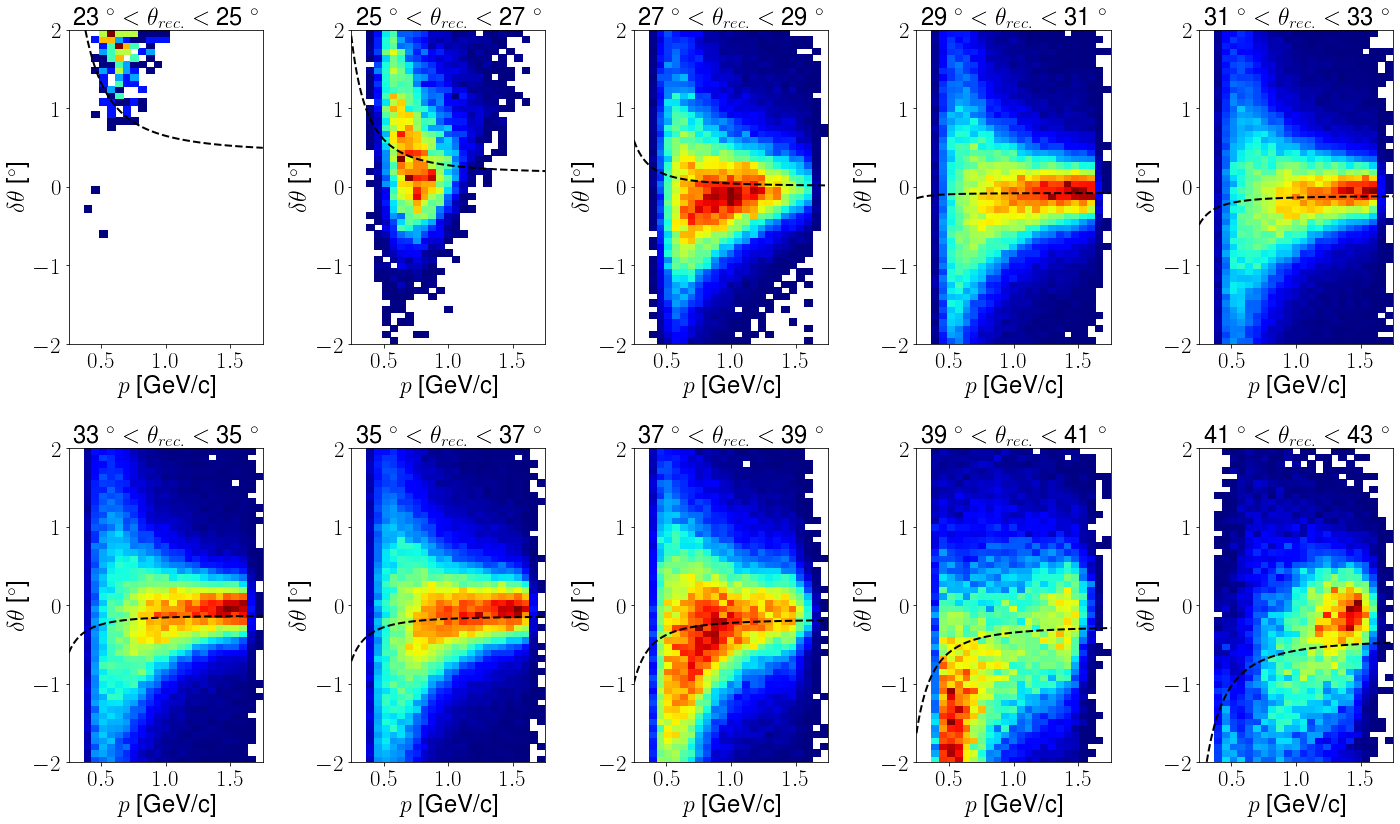

In [154]:
x = np.linspace(0, 9, 10)
fig, axs = plt.subplots(2,5, figsize=(20,12))
param1_theta, param2_theta = [ 2.04334532e+01, -1.81052405e+00,  5.32556360e-02, -5.23157558e-04], [ 8.74233279e+00, -7.63869344e-01,  2.22376362e-02, -2.16457260e-04]
for row in range(2):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbending_check2.Ptheta >= 2*ind+23) & (inbending_check2.Ptheta < 2*(ind+1)+23)
        axs[row, col].hist2d(inbending_check2.loc[thetaCond, "Pp"], inbending_check2.loc[thetaCond, "GenPtheta"] - inbending_check2.loc[thetaCond, "Ptheta"], bins = [np.linspace(0.25, 1.75, 26), np.linspace(-2, 2 , 51)], cmap = cmap, cmin =1)
        theta = 2*ind + 23 + 1
#         const_FD = np.select([theta<30, (theta>=30)],
#                           [2.98140652*10**(2) - 2.75743096*10**(1)*theta + 8.35818159*10**(-1)*theta*theta - 8.26147941*10**(-3)*theta*theta*theta, 1.34032831*10**(2) - 1.12452272*10**(1)*theta + 3.12125195*10**(-1)*theta*theta -2.86545130*10**(-3)*theta*theta*theta])
#         coeff_FD = np.select([theta<30, (theta>=30)],
#                           [1.82790220*10**(6) - 1.98950907*10**(5)*theta + 7.20647164*10**(3)*theta*theta - 8.68597440*10**(1)*theta*theta*theta, 9.37101732*10**(2) - 7.92142664*10**(1)*theta + 2.22452861*theta*theta -2.08191298*10**(-2)*theta*theta*theta])    
#         coeff2_FD = np.select([theta<30, (theta>=30)],
#                           [1.09369187*10**(4) - 1.29345623*10**(3)*theta + 5.07524944*10**(1)*theta*theta - 6.61520585*10**(-1)*theta*theta*theta, 1.02129004*10**(3) - 8.43398593*10**(1)*theta + 2.29760161*theta*theta  -2.07085860*10**(-2)*theta*theta*theta])
#             param = [0.0264, -1.464, -3.4769]
#         else:
#             param = [0.50047232 -0.03834672 *theta + 0.00071967*theta*theta, 74.99891704  -6.1576777*theta + 0.11469137*theta*theta, 47.71351973 -4.34918241*theta + 0.08841191*theta*theta]
#         param = [const_FD, coeff_FD, coeff2_FD]
#         print(theta, param,)
#         param = params_theta[ind]
        param = [correction5(param1_theta, theta), correction5(param2_theta, theta)]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.25, 1.75, 101), correction6(param, np.linspace(0.25, 1.75, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+23)+" "+degree + r" $<\theta_{rec.}<$ " + str(2*(ind+1)+23)+" "+degree)
plt.tight_layout()
# plt.show()
plt.savefig("protonFD_inb_theta_2.pdf")

In [212]:
params_theta = []
uncertainties_theta = []
# loss = []
x0 = [0, 1]
x0 = [0, -1]
for i in range(10):
    thetaCond = (inbending_check2.Ptheta >= 2*i+23) & (inbending_check2.Ptheta < 2*(i+1)+23)
    dfi = copy(inbending_check2.loc[thetaCond, ["Pp", "GenPtheta", "Ptheta"]])
    theta = 2*(i)+23 + 1
#     if theta < 27:
#     x0 = [0.0264, 1.464, -3.4769]
#     else:
#         x0 = [0.50047232 -0.03834672 *theta + 0.00071967*theta*theta, 74.99891704  -6.1576777*theta + 0.11469137*theta*theta, 47.71351973 -4.34918241*theta + 0.08841191*theta*theta]
#     else:
#         params_theta.append(x0)
#         continue
    dffit = copy(dfi.loc[np.abs(dfi["GenPtheta"]-dfi["Ptheta"])<2, :])
    dffit = copy(dffit.loc[dffit.Pp<1.25, :])
#     dffit = copy(dffit[np.abs(dffit["GenPtheta"]-dffit["Ptheta"]-correction4(x0, dffit["Pp"]))<1])

    for i in range (0, 1):
        res_lsq = least_squares(fun6, x0, args=(dffit["Pp"], (dffit["GenPtheta"]-dffit["Ptheta"])))    
#         dffit = copy(dfi[np.abs(dfi["GenPtheta"]-dfi["Ptheta"]-correction6(res_lsq.x, dfi["Pp"]))<2])
        x0 = res_lsq.x
    
    params_theta.append(res_lsq.x)
    
    # uncertainty
    # https://github.com/scipy/scipy/blob/2526df72e5d4ca8bad6e2f4b3cbdfbc33e805865/scipy/optimize/minpack.py#L739
    _, s, VT = np.linalg.svd(res_lsq.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(res_lsq.jac.shape) * s[0]
    s = s[s > threshold]
    VT = VT[:s.size]
    pcov = np.dot(VT.T / s**2, VT)
    s_sq = np.sum((dfi["GenPtheta"]-dfi["Ptheta"]-correction7(res_lsq.x, dfi["Pp"]))**2) / (len(dfi) - len(x0))
    pcov = pcov * s_sq
    uncertainties_theta.append(np.sqrt(np.diag(pcov)))
    print(theta, x0)
#     x0 = res_lsq.x

24 [ 1.82942609 -0.10265879]
26 [0.21876593 0.16433046]
28 [-0.08488327  0.04172433]
30 [-0.08577454 -0.01463976]
32 [-0.08968553 -0.02250122]
34 [-0.0933869  -0.02472886]
36 [-0.07918905 -0.03287671]
38 [-0.17977277 -0.04887604]
40 [-0.37629587 -0.09659804]
42 [-0.36262704 -0.14464642]


In [214]:
params_theta = np.array(params_theta)
consts_theta = params_theta[:, 0]
coeffs_theta = params_theta[:, 1]
# coeffs2_theta = params_theta[:, 2]

uncertainties_theta = np.array(uncertainties_theta)
consts_uncertainties_theta = uncertainties_theta[:, 0]
coeffs_uncertainties_theta = uncertainties_theta[:, 1]
# coeffs2_uncertainties_theta = uncertainties_theta[:, 2]

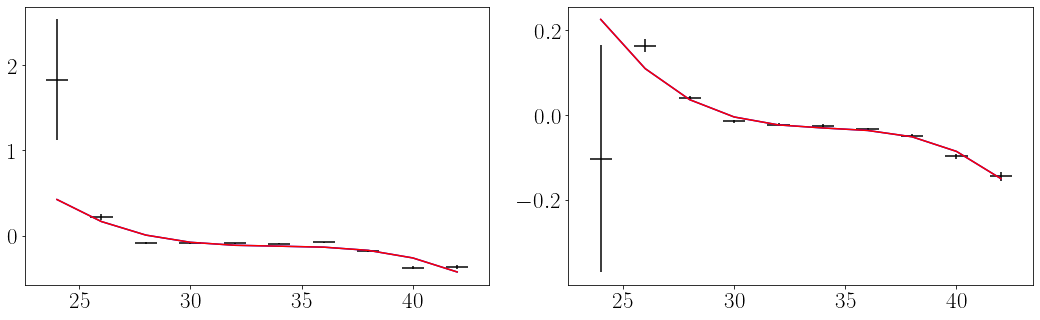

In [268]:
# fig, ax = plt.subplots(1,3, figsize=(15,5))
# x = np.linspace(0, 9,10)*2+20
# # ax[0].errorbar(x[:-2], consts_theta[:-2], xerr= 1, yerr = consts_uncertainties_theta[:-2], color='k', linestyle = '')
# # ax[1].errorbar(x[:-2], coeffs_theta[:-2], xerr= 1, yerr = coeffs_uncertainties_theta[:-2], color='k', linestyle = '')
# # ax[2].errorbar(x[:-2], coeffs2_theta[:-2], xerr= 1, yerr = coeffs2_uncertainties_theta[:-2], color='k', linestyle = '')
# ax[0].errorbar(x, consts_theta, xerr= 1, yerr = consts_uncertainties_theta, color='k', linestyle = '')
# ax[1].errorbar(x, coeffs_theta, xerr= 1, yerr = coeffs_uncertainties_theta, color='k', linestyle = '')
# ax[2].errorbar(x, coeffs2_theta, xerr= 1, yerr = coeffs2_uncertainties_theta, color='k', linestyle = '')
# # ax[0].set_ylim([-1, 4])
# plt.tight_layout()
# plt.show()
# plt.savefig("correction_phi.pdf")

fig, ax = plt.subplots(1,2, figsize=(15,5))
x = 2*np.linspace(0, 9, 10) + 23 + 1
ax[0].errorbar(x, consts_theta, xerr= .5, yerr = consts_uncertainties_theta[:], color='k', linestyle = '')
# x1 = np.linspace(23, 30, 101)
# x2 = np.linspace(30, 45, 101)

# theta = x1
# const_FD = np.select([theta<30, (theta>=30)],
#                   [2.98140652*10**(2) - 2.75743096*10**(1)*theta + 8.35818159*10**(-1)*theta*theta - 8.26147941*10**(-3)*theta*theta*theta, 1.34032831*10**(2) - 1.12452272*10**(1)*theta + 3.12125195*10**(-1)*theta*theta -2.86545130*10**(-3)*theta*theta*theta])
# coeff_FD = np.select([theta<30, (theta>=30)],
#                   [1.82790220*10**(6) - 1.98950907*10**(5)*theta + 7.20647164*10**(3)*theta*theta - 8.68597440*10**(1)*theta*theta*theta, 9.37101732*10**(2) - 7.92142664*10**(1)*theta + 2.22452861*theta*theta -2.08191298*10**(-2)*theta*theta*theta])    
# coeff2_FD = np.select([theta<30, (theta>=30)],
#                   [1.09369187*10**(4) - 1.29345623*10**(3)*theta + 5.07524944*10**(1)*theta*theta - 6.61520585*10**(-1)*theta*theta*theta, 1.02129004*10**(3) - 8.43398593*10**(1)*theta + 2.29760161*theta*theta  -2.07085860*10**(-2)*theta*theta*theta])

ax[0].plot(x, correction5(param1_theta, x), color = 'b')
# ax[0].plot(x1, const_FD, color = 'k', linewidth = 10)
# ax[0].plot(x2, correction5(param4_theta, x2), color = 'r')
ax[1].errorbar(x[:], coeffs_theta[:], xerr= .5, yerr = coeffs_uncertainties_theta[:], color='k', linestyle = '')
ax[1].plot(x, correction5(param2_theta, x), color = 'b')
const_FD = 2.04334532*10 -1.81052405 * x + 5.32556360*0.01 * x * x -5.23157558*0.0001 * x * x * x
coeff_FD = 8.74233279 -7.63869344 * 0.1 * x + 2.22376362*0.01 * x * x -2.16457260*0.0001 * x * x * x
ax[0].plot(x, const_FD, color = 'r')
ax[1].plot(x, coeff_FD, color = 'r')
# ax[1].plot(x2, correction5(param5_theta, x2), color = 'r')
# ax[2].errorbar(x[1:], coeffs2_theta[1:], xerr= .5, yerr = coeffs2_uncertainties_theta[1:], color='k', linestyle = '')
# ax[2].plot(x1, correction5(param3_theta, x1), color = 'b')
# ax[2].plot(x2, correction5(param6_theta, x2), color = 'r')
# ax[1].set_ylim([-1000, 2000])
# ax[2].set_ylim([-100, 100])
plt.tight_layout()
plt.show()
# plt.savefig("correction_phi.pdf")

In [247]:
x = np.linspace(0, 9, 10)*2+24
# x1 = x[1:7]
consts1_theta = consts_theta[1:7]
coeffs21_theta = coeffs2_theta[1:7]

# x3 = x[1:6]
# coeffs11_theta = coeffs_theta[1:6]

# x2 = x[7:]
# consts2_theta = consts_theta[7:]
# coeffs12_theta = coeffs_theta[7:]
# # coeffs22_theta = coeffs2_theta[7:]

res_lsq = least_squares(fun5, [0, 0, 0, 0], args=(x[1:], consts_theta[1:]))    
param1_theta = res_lsq.x
res_lsq = least_squares(fun5, [0, 0, 0, 0], args=(x[2:], coeffs_theta[2:]))    
param2_theta = res_lsq.x
# res_lsq = least_squares(fun5, [0, 0, 0, 0], args=(x1, coeffs21_theta))    
# param3_theta = res_lsq.x

# res_lsq = least_squares(fun5, [0, 0, 0, 0], args=(x2, consts2_theta))    
# param4_theta = res_lsq.x
# res_lsq = least_squares(fun5, [0, 0, 0, 0], args=(x2, coeffs12_theta))    
# param5_theta = res_lsq.x
# res_lsq = least_squares(fun5, [0, 0, 0, 0], args=(x2, coeffs22_theta))    
# param6_theta = res_lsq.x

In [248]:
print(param1_theta, param2_theta)#, param3_theta, param4_theta, param5_theta, param6_theta)

[ 2.04334532e+01 -1.81052405e+00  5.32556360e-02 -5.23157558e-04] [ 8.74233279e+00 -7.63869344e-01  2.22376362e-02 -2.16457260e-04]


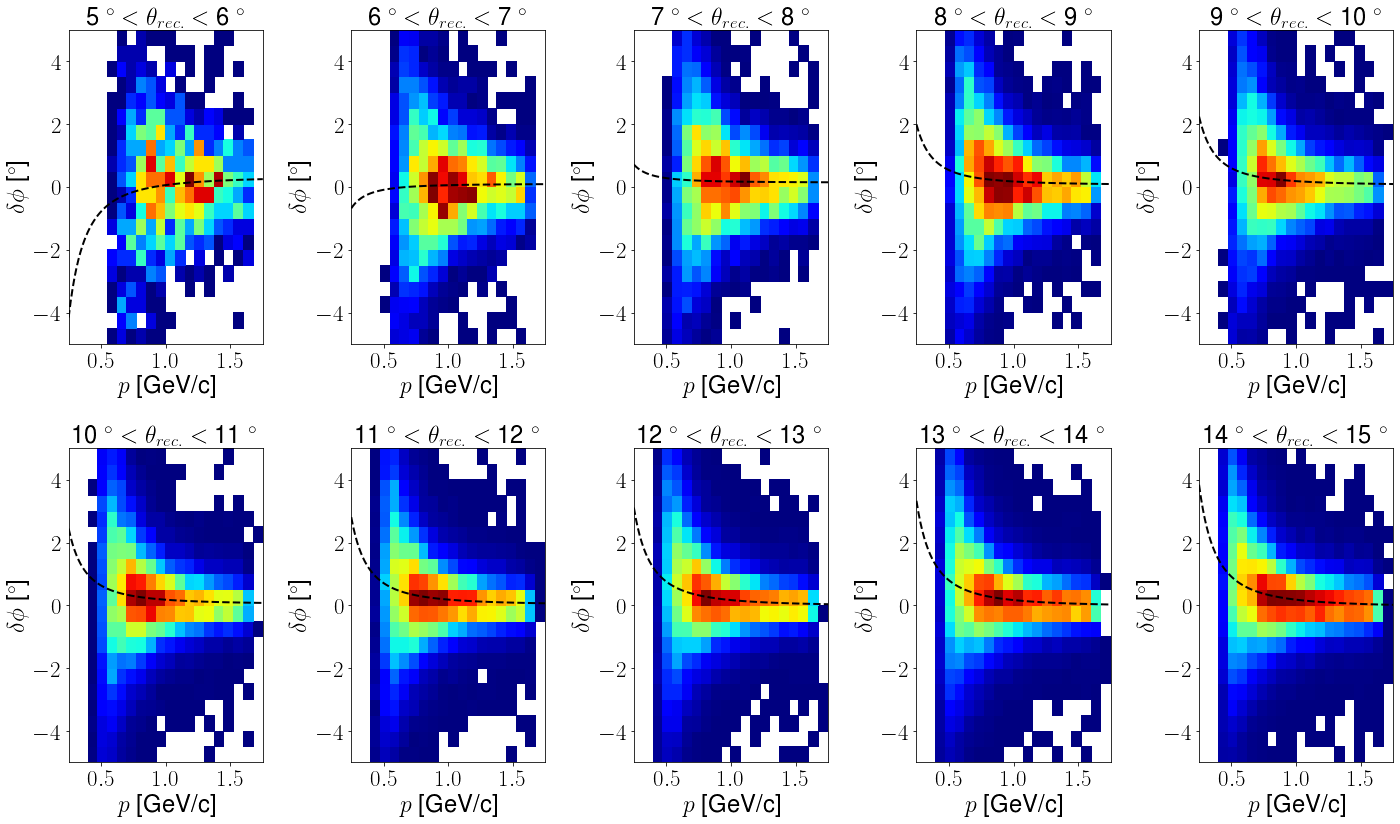

In [288]:
x = np.linspace(0, 9, 10)
fig, axs = plt.subplots(2,5, figsize=(20,12))
for row in range(2):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbending_check1.Ptheta >= 2*ind+5) & (inbending_check1.Ptheta < 2*(ind+1)+5)
        axs[row, col].hist2d(inbending_check1.loc[thetaCond, "Pp"], inbending_check1.loc[thetaCond, "GenPphi"] - inbending_check1.loc[thetaCond, "Pphi"], bins = [np.linspace(0.25, 1.75, 21), np.linspace(-5, 5 , 21)], cmap = cmap, cmin =1)
        theta = 2*ind + 6
#         if theta<20:
#             param = [0.0264, -1.464, -3.4769]
#         else:
#             param = [0.50047232 -0.03834672 *theta + 0.00071967*theta*theta, 74.99891704  -6.1576777*theta + 0.11469137*theta*theta, 47.71351973 -4.34918241*theta + 0.08841191*theta*theta]
#         const_FD = np.select([theta<15, theta>=15],
#                           [0, 4.53922278 - 0.72676857*theta + 0.02197507*theta*theta])
#         coeff_FD = np.select([theta<15, theta>=15],
#                           [0, -13.23900015  + 1.70084877*theta  -0.04636718*theta*theta])
#         coeff2_FD = np.select([theta<15, theta>=15],
#                           [0, -3.25471872 + 0.38338761*theta  -0.0122272*theta*theta])

#         param = [const_FD, coeff_FD, coeff2_FD]
#         param = [correction2(param1_p, x[ind]), correction3(param2_p, x[ind])]
#         if ind == 11:
#             param = params[10]
        param = params_phi[ind]
        axs[row, col].plot(np.linspace(0.25, 1.75, 101), correction6(param, np.linspace(0.25, 1.75, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_ylim(-2, 2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(ind+5)+" "+degree + r" $<\theta_{rec.}<$ " + str((ind+1)+5)+" "+degree)
plt.tight_layout()
plt.savefig("protonFD_inb_phi_1.pdf")

In [287]:
params_phi = []
uncertainties_phi = []
# loss = []
x0 = [0, 1]
x0 = [0, -1]
for i in range(10):
    thetaCond = (inbending_check1.Ptheta >= 2*i+5) & (inbending_check1.Ptheta < 2*(i+1)+5)
    dfi = copy(inbending_check1.loc[thetaCond, ["Pp", "GenPtheta", "Ptheta", "GenPphi", "Pphi"]])
    theta = 2*(i)+5 + 1
#     if theta < 7:
#         x0 = [-0.190662844, 6.48745941, -3.14646608]
# #     elif theta < 21:
# #         x0 = [ 0.13312076, -1.15416266, -1.61335404]
#     else:
#         x0 = [-0.20725736 -0.00675627 *theta + 0.0007863*theta*theta, 142.96379788  -16.66339055*theta + 0.51311212*theta*theta, 17.39529095 -1.78403359*theta + 0.0335692*theta*theta]
#     else:
#         params_theta.append(x0)
#         continue
    dffit = copy(dfi[np.abs(dfi["GenPphi"]-dfi["Pphi"])<5])
#     dffit = copy(dffit[np.abs(dffit["GenPtheta"]-dffit["Ptheta"]-correction4(x0, dffit["Pp"]))<1])

    for r in range (0, 1):
        res_lsq = least_squares(fun6, x0, args=(dffit["Pp"], (dffit["GenPphi"]-dffit["Pphi"])))    
#         dffit = copy(dfi[np.abs(dfi["GenPtheta"]-dfi["Ptheta"]-correction4(res_lsq.x, dfi["Pp"]))<1])
        x0 = res_lsq.x
    
    params_phi.append(res_lsq.x)
    
    # uncertainty
    # https://github.com/scipy/scipy/blob/2526df72e5d4ca8bad6e2f4b3cbdfbc33e805865/scipy/optimize/minpack.py#L739
    _, s, VT = np.linalg.svd(res_lsq.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(res_lsq.jac.shape) * s[0]
    s = s[s > threshold]
    VT = VT[:s.size]
    pcov = np.dot(VT.T / s**2, VT)
    s_sq = np.sum((dfi["GenPtheta"]-dfi["Ptheta"]-correction6(res_lsq.x, dfi["Pp"]))**2) / (len(dfi) - len(x0))
    pcov = pcov * s_sq
    uncertainties_phi.append(np.sqrt(np.diag(pcov)))
    print(i, theta, x0)
#     x0 = res_lsq.x

0 6 [ 0.33895115 -0.28107314]
1 8 [ 0.10357865 -0.04910593]
2 10 [0.13568314 0.03607044]
3 12 [0.0516347 0.1212322]
4 14 [0.04620093 0.13720234]
5 16 [0.02996417 0.15089803]
6 18 [0.01020737 0.17491343]
7 20 [-0.0260682   0.19626287]
8 22 [-0.04038232  0.21068605]
9 24 [-0.06204747  0.24399426]


In [579]:
coeffs_phi[[5,6,9,12,13,14,15,17,18,19]]

array([-0.05941748, -1.43924449,  1.17388041,  5.87430265,  1.57672008,
        1.09604138,  1.13746563,  1.40986111,  1.2304411 ,  1.4334769 ])

In [262]:
params_phi = np.array(params_phi)
consts_phi = params_phi[:, 0]
coeffs_phi = params_phi[:, 1]
# coeffs2_phi = params_phi[:, 2]

uncertainties_phi = np.array(uncertainties_phi)
consts_uncertainties_phi = uncertainties_phi[:, 0]
coeffs_uncertainties_phi = uncertainties_phi[:, 1]
# coeffs2_uncertainties_phi = uncertainties_phi[:, 2]

In [276]:
x = np.linspace(0, 9, 10)*2+6
# x1 = x[3:6]
# consts1_phi = consts_phi[3:6]
# coeffs11_phi = coeffs_phi[3:6]
# coeffs21_phi = coeffs2_phi[3:6]
# x2 = x[6:-2]
# consts2_phi = consts_phi[6:-2]
# coeffs12_phi = coeffs_phi[6:-2]
# coeffs22_phi = coeffs2_phi[6:-2]

res_lsq = least_squares(fun2, [0, 0], args=(x[1:], consts_phi[1:]))    
param1_phi = res_lsq.x
res_lsq = least_squares(fun5, [0, 0, 0, 0], args=(x[1:], coeffs_phi[1:]))    
param2_phi = res_lsq.x
# res_lsq = least_squares(fun3, [0, 0, 0], args=(x[[9,10,11,12,13,14,15,17,18,19]], coeffs2_phi[[9,10,11,12,13,14,15,17,18,19]]))    
# param3_phi = res_lsq.x

# res_lsq = least_squares(fun3, [0, 0, 0], args=(x2, consts2_phi))    
# param4_phi = res_lsq.x
# res_lsq = least_squares(fun3, [0, 0, 0], args=(x2, coeffs12_phi))    
# param5_phi = res_lsq.x
# res_lsq = least_squares(fun3, [0, 0, 0], args=(x2, coeffs22_phi))    
# param6_phi = res_lsq.x

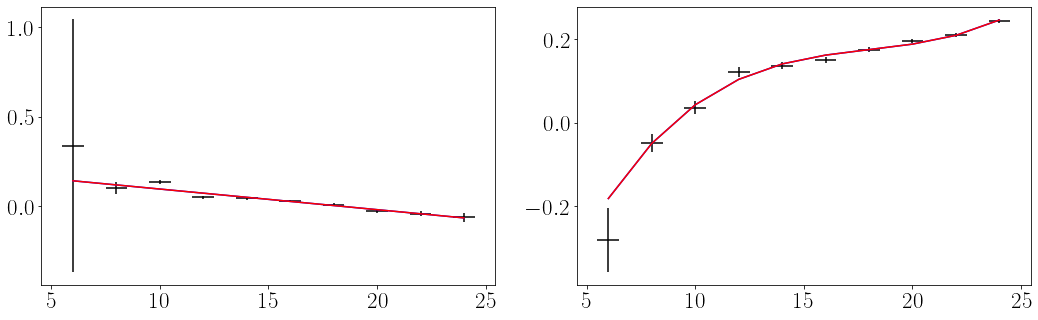

In [282]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
x = np.linspace(0, 9, 10)*2+6
ax[0].errorbar(x[:], consts_phi[:], xerr= 0.5, yerr = consts_uncertainties_theta[:], color='k', linestyle = '')
ax[0].plot(x, correction2(param1_phi, x), color = 'b')# x1 = np.linspace(5, 25, 101)
# x2 = np.linspace(27, 42, 101)
# ax[0].plot(x1, correction3(param1_phi, x1), color = 'b')
# theta = x1
# const_FD = np.select([theta<15, theta>=15],
#                   [0, 4.53922278 - 0.72676857*theta + 0.02197507*theta*theta])
# coeff_FD = np.select([theta<15, theta>=15],
#                   [0, -13.23900015  + 1.70084877*theta  -0.04636718*theta*theta])
# coeff2_FD = np.select([theta<15, theta>=15],
#                   [0, -3.25471872 + 0.38338761*theta  -0.0122272*theta*theta])
# ax[0].plot(x1, const_FD, linewidth =4)
# ax[0].plot(x2, correction3(param4_phi, x2), color = 'r')
ax[1].errorbar(x[:], coeffs_phi[:], xerr= 0.5, yerr = coeffs_uncertainties_phi[:], color='k', linestyle = '')
ax[1].plot(x, correction5(param2_phi, x), color = 'b')
const_FD = 0.21192125 -0.0115175 * x
coeff_FD = -8.94307411*0.1 + 1.66349766*0.1 * x -8.90617559*0.001 * x * x + 1.64803754*0.0001 * x * x * x
ax[0].plot(x, const_FD, color ='r')
ax[1].plot(x, coeff_FD, color ='r')
# ax[1].plot(x2, correction3(param5_phi, x2), color = 'r')
# ax[2].errorbar(x[:], coeffs2_phi[:], xerr= 0.5, yerr = 0, color='k', linestyle = '')
# ax[2].plot(x1, correction3(param3_phi, x1), color = 'b')
# ax[2].plot(x2, correction3(param6_phi, x2), color = 'r')
# ax[0].set_ylim([-10, 10])
# ax[1].set_ylim([-10, 10])
# ax[2].set_ylim([-10, 5])
plt.tight_layout()
plt.show()
# plt.savefig("correction_phi.pdf")

In [278]:
print(param1_phi, param2_phi)#, param3_phi)

[ 0.21192125 -0.0115175 ] [-8.94307411e-01  1.66349766e-01 -8.90617559e-03  1.64803754e-04]


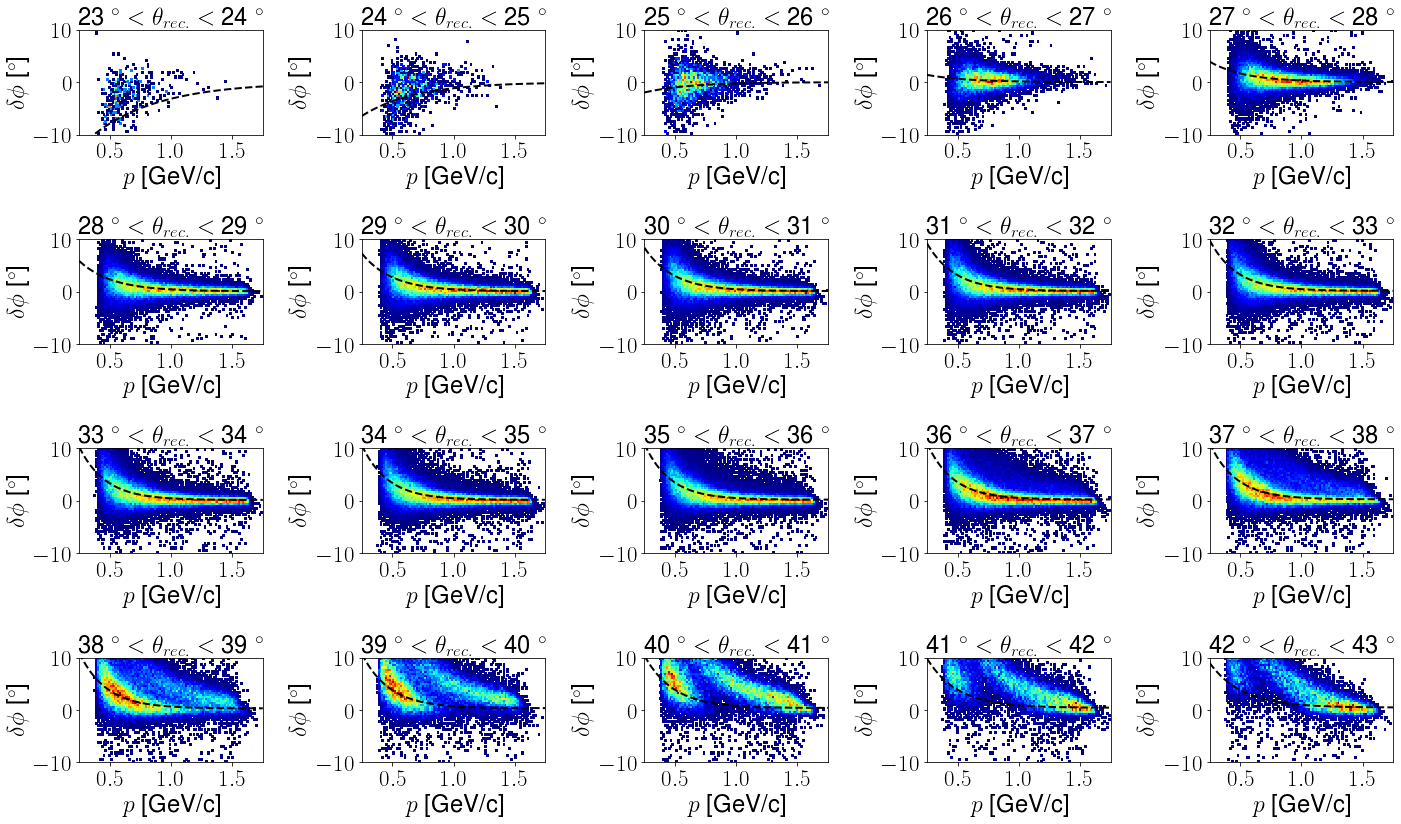

In [612]:
x = np.linspace(0, 19, 20)
fig, axs = plt.subplots(4,5, figsize=(20,12))
for row in range(4):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbending_check2.Ptheta >= ind+23) & (inbending_check2.Ptheta < (ind+1)+23)
        axs[row, col].hist2d(inbending_check2.loc[thetaCond, "Pp"], inbending_check2.loc[thetaCond, "GenPphi"] - inbending_check2.loc[thetaCond, "Pphi"], bins = [np.linspace(0.25, 1.75, 101), np.linspace(-10, 10 , 51)], cmap = cmap, cmin =1)
#         theta = 2.5*(i+1)+5 + 1.25
#         if theta<20:
#             param = [0.0264, -1.464, -3.4769]
#         else:
#             param = [0.50047232 -0.03834672 *theta + 0.00071967*theta*theta, 74.99891704  -6.1576777*theta + 0.11469137*theta*theta, 47.71351973 -4.34918241*theta + 0.08841191*theta*theta]
        theta = 23.5 + ind
        const_FD = 0.54697831 -0.04896981*theta +  0.00111376*theta*theta
        coeff_FD = -4.06733541*10**2 + 2.43696202*10*theta -3.36144736*10**(-1)*theta*theta
        coeff2_FD = 2.06378660*10 - 1.42866062*theta + 2.01085440*10**(-2)*theta*theta
    
        param = [const_FD, coeff_FD, coeff2_FD]#params_phi[ind]
#         param = [correction2(param1_p, x[ind]), correction3(param2_p, x[ind])]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.25, 1.75, 101), correction4(param, np.linspace(0.25, 1.75, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].plot(np.linspace(0.3, 1.7, 101), correction4([0, 10, -3], np.linspace(0.3, 1.7, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(ind+23)+" "+degree + r" $<\theta_{rec.}<$ " + str((ind+1)+23)+" "+degree)
plt.tight_layout()
# plt.show()
# plt.savefig("correction_p_result.pdf")
plt.savefig("protonFD_inb_phi_2.pdf")

In [417]:
params_phi = []
uncertainties_phi = []
# loss = []
# x0 = [0, -1, -3]
for i in range(20):
    thetaCond = (inbending_check2.Ptheta >= i+23) & (inbending_check2.Ptheta < (i+1)+23)
    dfi = copy(inbending_check2.loc[thetaCond, ["Pp", "GenPtheta", "Ptheta", "GenPphi", "Pphi"]])
    theta = (i) + 23 + 0.5
    if theta<37:
        x0 = [0, 10, -3]
    else:
        params_phi.append(res_lsq.x)
        uncertainties_phi.append(np.sqrt(np.diag(pcov)))
        continue

    
#     if theta < 7:
#         x0 = [-0.190662844, 6.48745941, -3.14646608]
# #     elif theta < 21:
# #         x0 = [ 0.13312076, -1.15416266, -1.61335404]
#     else:
#         x0 = [-0.20725736 -0.00675627 *theta + 0.0007863*theta*theta, 142.96379788  -16.66339055*theta + 0.51311212*theta*theta, 17.39529095 -1.78403359*theta + 0.0335692*theta*theta]
#     else:
#         params_theta.append(x0)
#         continue
    dffit = copy(dfi[np.abs(dfi["GenPphi"]-dfi["Pphi"])<10])

    for i in range (0, 1):
        res_lsq = least_squares(fun4, x0, args=(dffit["Pp"], (dffit["GenPphi"]-dffit["Pphi"])))    
        dffit = copy(dfi[np.abs(dfi["GenPtheta"]-dfi["Ptheta"]-correction4(res_lsq.x, dfi["Pp"]))<1])
        x0 = res_lsq.x
    
    params_phi.append(res_lsq.x)
    
    # uncertainty
    # https://github.com/scipy/scipy/blob/2526df72e5d4ca8bad6e2f4b3cbdfbc33e805865/scipy/optimize/minpack.py#L739
    _, s, VT = np.linalg.svd(res_lsq.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(res_lsq.jac.shape) * s[0]
    s = s[s > threshold]
    VT = VT[:s.size]
    pcov = np.dot(VT.T / s**2, VT)
    s_sq = np.sum((dfi["GenPtheta"]-dfi["Ptheta"]-correction4(res_lsq.x, dfi["Pp"]))**2) / (len(dfi) - len(x0))
    pcov = pcov * s_sq
    uncertainties_phi.append(np.sqrt(np.diag(pcov)))
    print(theta, x0)
#     x0 = res_lsq.x

23.5 [  0.87163532 -12.53621499  -2.119501  ]
24.5 [-5.62085748e-03 -7.93778748e+01 -6.77010160e+00]
25.5 [ 1.48188056e-01 -2.58850287e+02 -1.08564388e+01]
26.5 [ 5.22781269e-01 -1.89810591e+04 -2.26007839e+01]
27.5 [ 0.14683521  4.72708622 -2.92426642]
28.5 [ 0.0456285   9.80643947 -3.38465301]
29.5 [ 0.04607196 18.85271948 -4.164644  ]
30.5 [ 0.06989265 28.4138759  -4.71807664]
31.5 [ 0.0821886  34.83934744 -4.97781267]
32.5 [ 0.07892637 35.97443543 -4.94555855]
33.5 [ 0.08316964 38.44723187 -4.99366493]
34.5 [ 0.07414475 34.62991911 -4.7124891 ]
35.5 [ 0.15623748 33.92945525 -4.6000354 ]
36.5 [ 0.39340227 28.12915647 -4.2083606 ]


In [418]:
params_phi = np.array(params_phi)
consts_phi = params_phi[:, 0]
coeffs_phi = params_phi[:, 1]
coeffs2_phi = params_phi[:, 2]

uncertainties_phi = np.array(uncertainties_phi)
consts_uncertainties_phi = uncertainties_phi[:, 0]
coeffs_uncertainties_phi = uncertainties_phi[:, 1]
coeffs2_uncertainties_phi = uncertainties_phi[:, 2]

In [419]:
x = np.linspace(0, 19, 20)+23.5
# x1 = x[3:6]
# consts1_phi = consts_phi[3:6]
# coeffs11_phi = coeffs_phi[3:6]
# coeffs21_phi = coeffs2_phi[3:6]
# x2 = x[6:-2]
# consts2_phi = consts_phi[6:-2]
# coeffs12_phi = coeffs_phi[6:-2]
# coeffs22_phi = coeffs2_phi[6:-2]

res_lsq = least_squares(fun3, [0, 0, 0], args=(x[4:], consts_phi[4:]))    
param1_phi = res_lsq.x
res_lsq = least_squares(fun3, [0, 0, 0], args=(x[4:], coeffs_phi[4:]))    
param2_phi = res_lsq.x
res_lsq = least_squares(fun3, [0, 0, 0], args=(x[4:], coeffs2_phi[4:]))    
param3_phi = res_lsq.x

# res_lsq = least_squares(fun3, [0, 0, 0], args=(x2, consts2_phi))    
# param4_phi = res_lsq.x
# res_lsq = least_squares(fun3, [0, 0, 0], args=(x2, coeffs12_phi))    
# param5_phi = res_lsq.x
# res_lsq = least_squares(fun3, [0, 0, 0], args=(x2, coeffs22_phi))    
# param6_phi = res_lsq.x

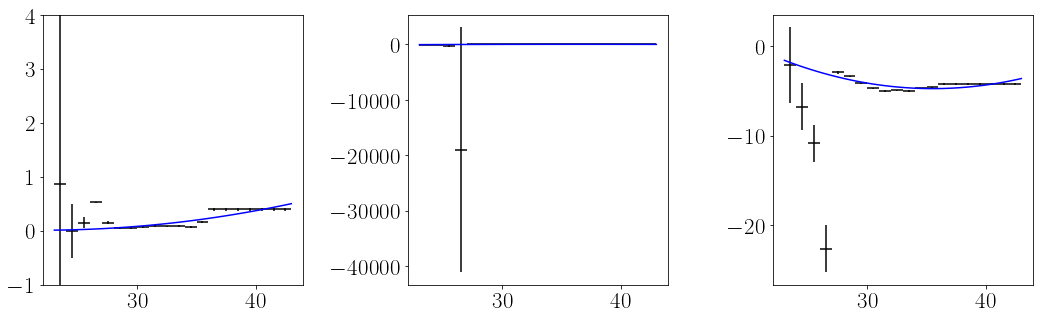

In [426]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
x = np.linspace(0, 19, 20)+23.5
ax[0].errorbar(x[:], consts_phi[:], xerr= 0.5, yerr = consts_uncertainties_phi[:], color='k', linestyle = '')
x1 = np.linspace(23, 43, 101)
ax[0].plot(x1, correction3(param1_phi, x1), color = 'b')
ax[1].errorbar(x[:], coeffs_phi[:], xerr= 0.5, yerr = coeffs_uncertainties_phi[:], color='k', linestyle = '')
ax[1].plot(x1, correction3(param2_phi, x1), color = 'b')
# ax[1].plot(x2, correction3(param5_phi, x2), color = 'r')
ax[2].errorbar(x[:], coeffs2_phi[:], xerr= 0.5, yerr = coeffs2_uncertainties_phi[:], color='k', linestyle = '')
ax[2].plot(x1, correction3(param3_phi, x1), color = 'b')
# ax[2].plot(x2, correction3(param6_phi, x2), color = 'r')
ax[0].set_ylim([-1, 4])
plt.tight_layout()
plt.show()
# plt.savefig("correction_phi.pdf")

In [427]:
print(param1_phi, param2_phi, param3_phi)

[ 0.54697831 -0.04896981  0.00111376] [-4.06733541e+02  2.43696202e+01 -3.36144736e-01] [ 2.06378660e+01 -1.42866062e+00  2.01085440e-02]


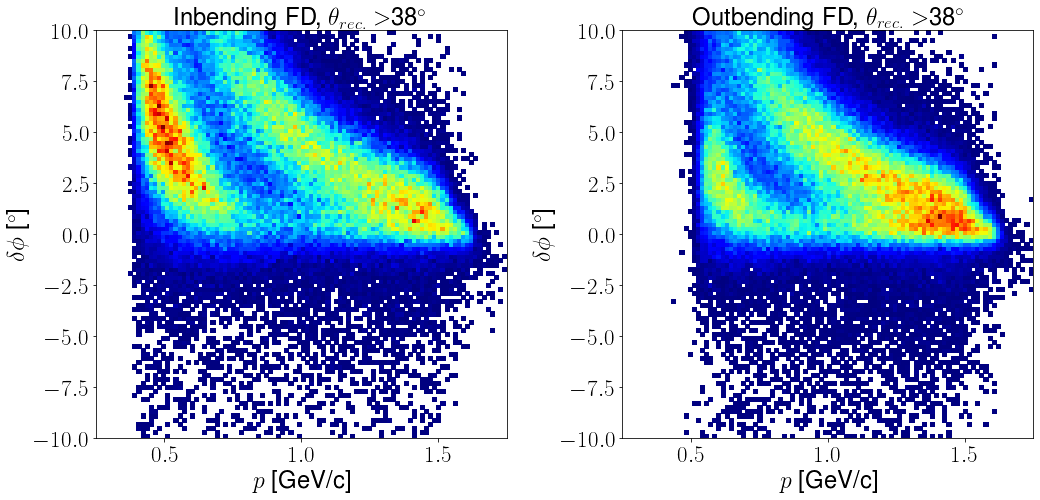

In [456]:
fig, axs = plt.subplots(1,2, figsize = (15, 7.5))
axs[0].hist2d(inb_FD.loc[(inb_FD.Ptheta > 38), "Pp"], inb_FD.loc[(inb_FD.Ptheta > 38), "GenPphi"] - inb_FD.loc[(inb_FD.Ptheta > 38), "Pphi"], bins = [np.linspace(0.25, 1.75, 101), np.linspace(-10, 10, 101)], cmap = cmap, cmin = 1)
axs[1].hist2d(outb_FD.loc[(outb_FD.Ptheta > 38), "Pp"], outb_FD.loc[(outb_FD.Ptheta > 38), "GenPphi"] - outb_FD.loc[(outb_FD.Ptheta > 38), "Pphi"], bins = [np.linspace(0.25, 1.75, 101), np.linspace(-10, 10, 101)], cmap = cmap, cmin = 1)

axs[0].set_xlabel(r"$p$"+" ["+GeVc+"]")
axs[0].set_ylabel(r"$\delta \phi$"+" ["+degree+"]")
axs[1].set_xlabel(r"$p$"+" ["+GeVc+"]")
axs[1].set_ylabel(r"$\delta \phi$"+" ["+degree+"]")

axs[0].set_title("Inbending FD,   "+r"$\theta_{rec.} >$" + "38" + degree)
axs[1].set_title("Outbending FD,   "+r"$\theta_{rec.} >$" + "38" + degree)

plt.tight_layout()
plt.show()

In [84]:
for i, file in enumerate(listdir("/Volumes/SBHDD1TB/data/merged/inbending/")):
    print(i, file)
    df = pd.read_pickle("/Volumes/SBHDD1TB/data/merged/inbending/" + file)
    if i > 0:
#         inb_FD = pd.concat([df.loc[df.Psector < 4000, ["PDc1Hitx", "PDc1Hity", "PDc1Hitz", "Etheta", "Ep", "GenEp", "Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi"]], inb_FD])
#         inb_FD = pd.concat([df.loc[df.Psector < 4000, ["PDc1Hitx", "PDc1Hity", "PDc1Hitz", "Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi"]], inb_FD])
#         inb_CD = pd.concat([df.loc[df.Psector > 4000, ["Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi"]], inb_CD])
        inb_FD_corr = pd.concat([df.loc[df.Psector < 4000, ["Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi", "MM2_ep", "MM2_epg"]], inb_FD_corr])
        inb_CD_corr = pd.concat([df.loc[df.Psector > 4000, ["Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi", "MM2_ep", "MM2_epg"]], inb_CD_corr])
    else:
#         inb_FD = df.loc[df.Psector < 4000, ["PDc1Hitx", "PDc1Hity", "PDc1Hitz", "Etheta", "Ep", "GenEp", "Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi"]]
#         inb_FD = df.loc[df.Psector < 4000, ["PDc1Hitx", "PDc1Hity", "PDc1Hitz", "Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi"]]
#         inb_CD = df.loc[df.Psector > 4000, ["Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi"]]
        inb_FD_corr = df.loc[df.Psector < 4000, ["Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi", "MM2_ep", "MM2_epg"]]
        inb_CD_corr = df.loc[df.Psector > 4000, ["Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi", "MM2_ep", "MM2_epg"]]
#         break

0 2942.pkl
1 2966.pkl
2 2967.pkl
3 3057.pkl
4 3059.pkl
5 3061.pkl
6 3062.pkl
7 3063.pkl
8 3066.pkl
9 3067.pkl
10 3073.pkl
11 3075.pkl
12 3100.pkl
13 3108.pkl


In [85]:
for i, file in enumerate(listdir("/Volumes/SBHDD1TB/data/merged/outbending/")):
    print(i, file)
    df = pd.read_pickle("/Volumes/SBHDD1TB/data/merged/outbending/" + file)
    if i > 0:
        outb_FD_corr = pd.concat([df.loc[df.Psector < 4000, ["Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi", "MM2_ep", "MM2_epg"]], outb_FD_corr])
        outb_CD_corr = pd.concat([df.loc[df.Psector > 4000, ["Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi", "MM2_ep", "MM2_epg"]], outb_CD_corr])
    else:
        outb_FD_corr = df.loc[df.Psector < 4000, ["Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi", "MM2_ep", "MM2_epg"]]
        outb_CD_corr = df.loc[df.Psector > 4000, ["Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi", "MM2_ep", "MM2_epg"]]

0 3111.pkl
1 3114.pkl
2 3150.pkl
3 3169.pkl
4 3177.pkl
5 3188.pkl


In [77]:
# inb_FD.to_pickle("inb_FD.pkl")
# outb_FD.to_pickle("out_FD.pkl")

# inb_CD.to_pickle("inb_CD.pkl")
# outb_CD.to_pickle("out_CD.pkl")

inb_FD_corr.to_pickle("inb_FD_corr.pkl")
outb_FD_corr.to_pickle("out_FD_corr.pkl")

inb_CD_corr.to_pickle("inb_CD_corr.pkl")
outb_CD_corr.to_pickle("out_CD_corr.pkl")

In [14]:
# inb_FD = pd.read_pickle("inb_FD.pkl")
# outb_FD = pd.read_pickle("out_FD.pkl")

# inb_CD = pd.read_pickle("inb_CD.pkl")
# outb_CD = pd.read_pickle("out_CD.pkl")

# inb_FD_corr = pd.read_pickle("inb_FD_corr.pkl")
# outb_FD_corr = pd.read_pickle("out_FD_corr.pkl")

# inb_CD_corr = pd.read_pickle("inb_CD_corr.pkl")
# outb_CD_corr = pd.read_pickle("out_CD_corr.pkl")

In [112]:
inb = pd.concat([inb_FD, inb_CD])
outb = pd.concat([outb_FD, outb_CD])

In [88]:
inb_corr = pd.concat([inb_FD_corr, inb_CD_corr])
outb_corr = pd.concat([outb_FD_corr, outb_CD_corr])

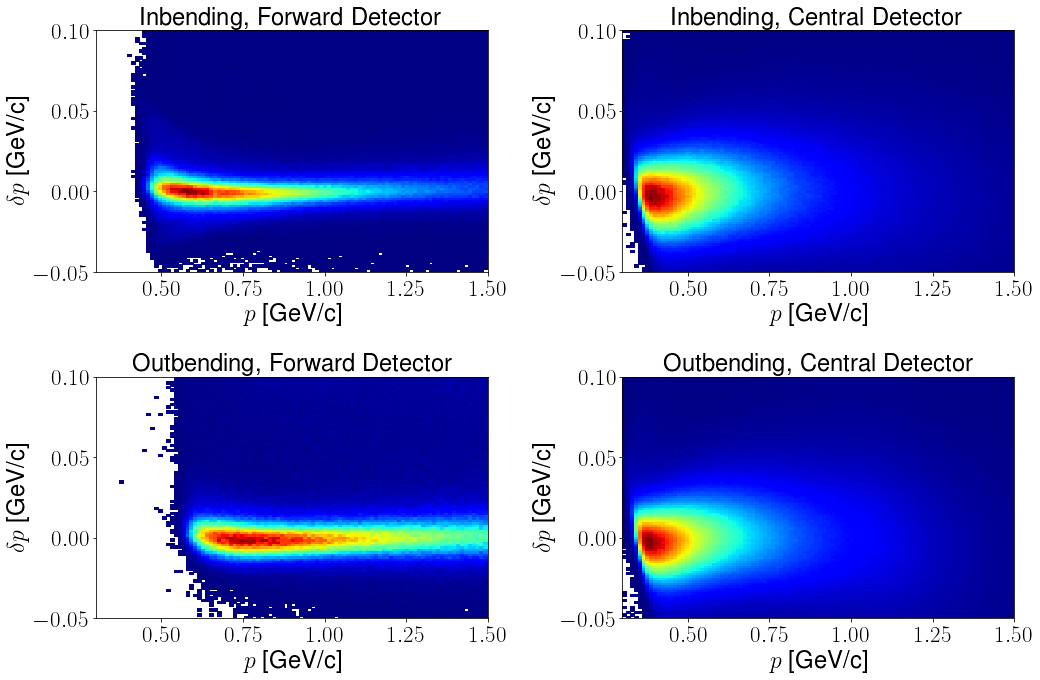

In [129]:
fig, axs = plt.subplots(2,2, figsize = (15, 10))
for row in range(2):
    for col in range(2):
#         ind =col+2*row
        axs[row, col].set_xlabel(r"$p$"+" ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$"+" ["+GeVc+"]")
axs[0, 0].hist2d(inb_FD_corr.Pp, inb_FD_corr.GenPp - inb_FD_corr.Pp, bins = [np.linspace(0.3, 1.5, 101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
axs[0, 1].hist2d(inb_CD_corr.Pp, inb_CD_corr.GenPp - inb_CD_corr.Pp, bins = [np.linspace(0.3, 1.5, 101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
axs[1, 0].hist2d(outb_FD_corr.Pp, outb_FD_corr.GenPp - outb_FD_corr.Pp, bins = [np.linspace(0.3, 1.5, 101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
axs[1, 1].hist2d(outb_CD_corr.Pp, outb_CD_corr.GenPp - outb_CD_corr.Pp, bins = [np.linspace(0.3, 1.5, 101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)

axs[0, 0].set_title("Inbending, Forward Detector")
axs[0, 1].set_title("Inbending, Central Detector")
axs[1, 0].set_title("Outbending, Forward Detector")
axs[1, 1].set_title("Outbending, Central Detector")

plt.tight_layout()
plt.savefig("protons_all_conf_corr.pdf")

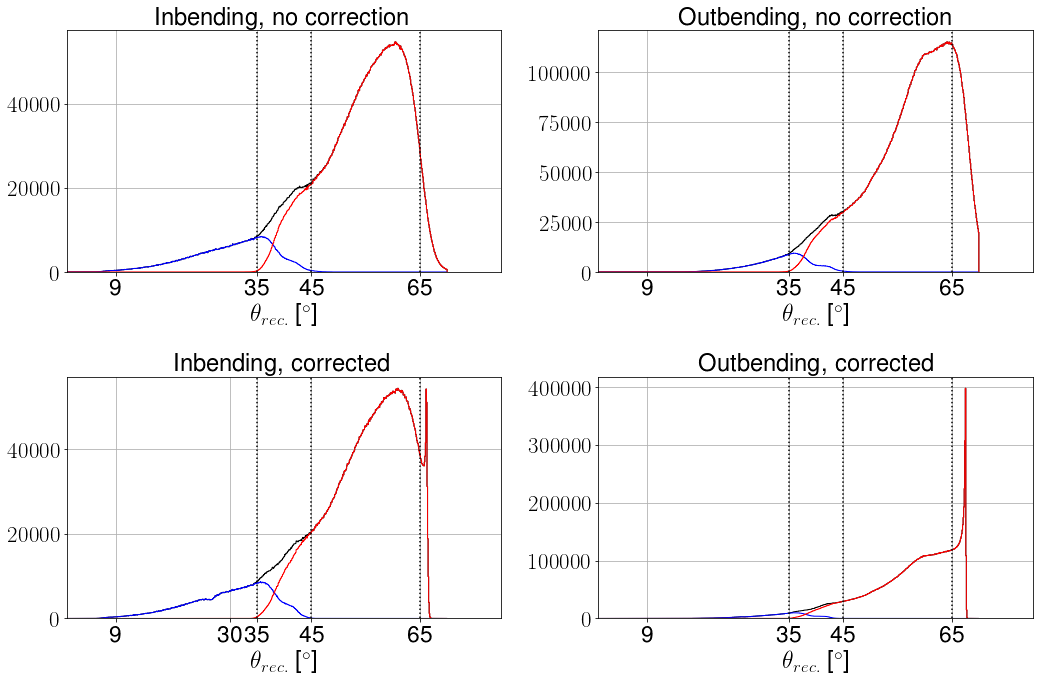

In [688]:
fig, axs = plt.subplots(2,2, figsize = (15, 10))
for row in range(2):
    for col in range(2):
#         ind =col+2*row
        axs[row, col].set_xlabel(r"$\theta_{rec.}$"+" ["+degree+"]")
        axs[row, col].set_xlim([0, 80])
        axs[row, col].axvline(35, linestyle = ':', color = 'k')
        axs[row, col].axvline(45, linestyle = ':', color = 'k')
        axs[row, col].axvline(65, linestyle = ':', color = 'k')
        axs[row, col].set_xticks([9, 35, 45, 65])
        axs[row, col].set_xticklabels([9, 35, 45, 65])
    
axs[1, 0].set_xticks([9, 30, 35, 45, 65])
axs[1, 0].set_xticklabels([9, 30, 35, 45, 65])


#         axs[row, col].set_ylabel(r"$\delta p$"+" ["+GeVc+"]")

bins = np.linspace(0, 70, 701)

inb.Ptheta.hist(bins = bins, histtype = 'step', edgecolor = 'k', ax = axs[0,0])
inb_FD.Ptheta.hist(bins = bins, histtype = 'step', edgecolor = 'b', ax = axs[0,0])
inb_CD.Ptheta.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[0,0])
axs[0, 0].set_title("Inbending, no correction")

outb.Ptheta.hist(bins = bins, histtype = 'step', edgecolor = 'k', ax = axs[0,1])
outb_FD.Ptheta.hist(bins = bins, histtype = 'step', edgecolor = 'b', ax = axs[0,1])
outb_CD.Ptheta.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[0,1])
axs[0, 1].set_title("Outbending, no correction")

inb_corr.Ptheta.hist(bins = bins, histtype = 'step', edgecolor = 'k', ax = axs[1,0])
inb_FD_corr.Ptheta.hist(bins = bins, histtype = 'step', edgecolor = 'b', ax = axs[1,0])
inb_CD_corr.Ptheta.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[1,0])
axs[1, 0].set_title("Inbending, corrected")

outb_corr.Ptheta.hist(bins = bins, histtype = 'step', edgecolor = 'k', ax = axs[1,1])
outb_FD_corr.Ptheta.hist(bins = bins, histtype = 'step', edgecolor = 'b', ax = axs[1,1])
outb_CD_corr.Ptheta.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[1,1])
axs[1, 1].set_title("Outbending, corrected")


plt.tight_layout()
plt.show()

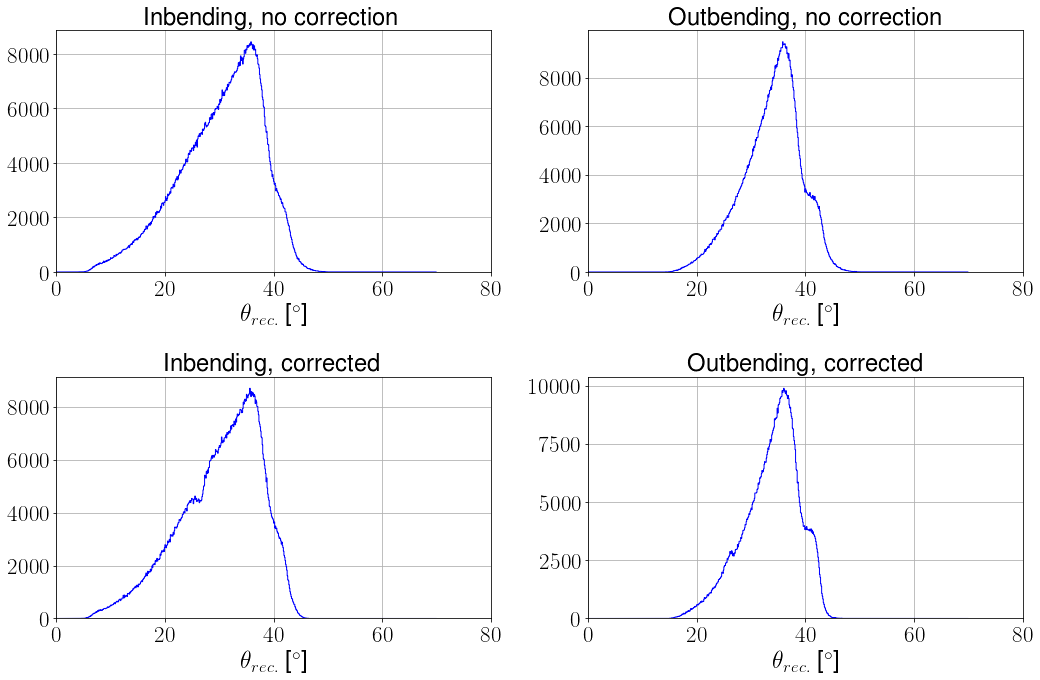

In [689]:
fig, axs = plt.subplots(2,2, figsize = (15, 10))
for row in range(2):
    for col in range(2):
#         ind =col+2*row
        axs[row, col].set_xlabel(r"$\theta_{rec.}$"+" ["+degree+"]")
        axs[row, col].set_xlim([0, 80])
#         axs[row, col].axvline(35, linestyle = ':', color = 'k')
#         axs[row, col].axvline(45, linestyle = ':', color = 'k')
#         axs[row, col].axvline(65, linestyle = ':', color = 'k')
#         axs[row, col].set_xticks([9, 35, 45, 65])
#         axs[row, col].set_xticklabels([9, 35, 45, 65])
    
# axs[1, 0].set_xticks([9, 30, 35, 45, 65])
# axs[1, 0].set_xticklabels([9, 30, 35, 45, 65])


#         axs[row, col].set_ylabel(r"$\delta p$"+" ["+GeVc+"]")

bins = np.linspace(0, 70, 701)

# inb.Ptheta.hist(bins = bins, histtype = 'step', edgecolor = 'k', ax = axs[0,0])
inb_FD.Ptheta.hist(bins = bins, histtype = 'step', edgecolor = 'b', ax = axs[0,0])
# inb_CD.Ptheta.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[0,0])
axs[0, 0].set_title("Inbending, no correction")

# outb.Ptheta.hist(bins = bins, histtype = 'step', edgecolor = 'k', ax = axs[0,1])
outb_FD.Ptheta.hist(bins = bins, histtype = 'step', edgecolor = 'b', ax = axs[0,1])
# outb_CD.Ptheta.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[0,1])
axs[0, 1].set_title("Outbending, no correction")

# inb_corr.Ptheta.hist(bins = bins, histtype = 'step', edgecolor = 'k', ax = axs[1,0])
inb_FD_corr.Ptheta.hist(bins = bins, histtype = 'step', edgecolor = 'b', ax = axs[1,0])
# inb_CD_corr.Ptheta.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[1,0])
axs[1, 0].set_title("Inbending, corrected")

# outb_corr.Ptheta.hist(bins = bins, histtype = 'step', edgecolor = 'k', ax = axs[1,1])
outb_FD_corr.Ptheta.hist(bins = bins, histtype = 'step', edgecolor = 'b', ax = axs[1,1])
# outb_CD_corr.Ptheta.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[1,1])
axs[1, 1].set_title("Outbending, corrected")


plt.tight_layout()
plt.show()

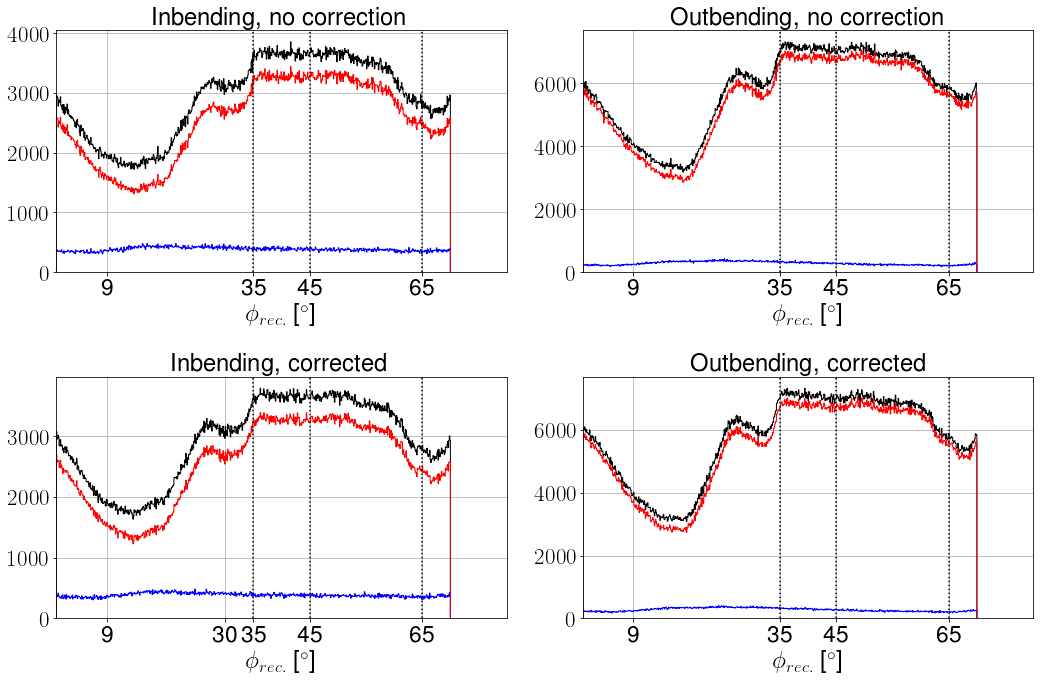

In [690]:
fig, axs = plt.subplots(2,2, figsize = (15, 10))
for row in range(2):
    for col in range(2):
#         ind =col+2*row
        axs[row, col].set_xlabel(r"$\phi_{rec.}$"+" ["+degree+"]")
        axs[row, col].set_xlim([0, 80])
        axs[row, col].axvline(35, linestyle = ':', color = 'k')
        axs[row, col].axvline(45, linestyle = ':', color = 'k')
        axs[row, col].axvline(65, linestyle = ':', color = 'k')
        axs[row, col].set_xticks([9, 35, 45, 65])
        axs[row, col].set_xticklabels([9, 35, 45, 65])
    
axs[1, 0].set_xticks([9, 30, 35, 45, 65])
axs[1, 0].set_xticklabels([9, 30, 35, 45, 65])


#         axs[row, col].set_ylabel(r"$\delta p$"+" ["+GeVc+"]")

bins = np.linspace(0, 70, 701)

inb.Pphi.hist(bins = bins, histtype = 'step', edgecolor = 'k', ax = axs[0,0])
inb_FD.Pphi.hist(bins = bins, histtype = 'step', edgecolor = 'b', ax = axs[0,0])
inb_CD.Pphi.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[0,0])
axs[0, 0].set_title("Inbending, no correction")

outb.Pphi.hist(bins = bins, histtype = 'step', edgecolor = 'k', ax = axs[0,1])
outb_FD.Pphi.hist(bins = bins, histtype = 'step', edgecolor = 'b', ax = axs[0,1])
outb_CD.Pphi.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[0,1])
axs[0, 1].set_title("Outbending, no correction")

inb_corr.Pphi.hist(bins = bins, histtype = 'step', edgecolor = 'k', ax = axs[1,0])
inb_FD_corr.Pphi.hist(bins = bins, histtype = 'step', edgecolor = 'b', ax = axs[1,0])
inb_CD_corr.Pphi.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[1,0])
axs[1, 0].set_title("Inbending, corrected")

outb_corr.Pphi.hist(bins = bins, histtype = 'step', edgecolor = 'k', ax = axs[1,1])
outb_FD_corr.Pphi.hist(bins = bins, histtype = 'step', edgecolor = 'b', ax = axs[1,1])
outb_CD_corr.Pphi.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[1,1])
axs[1, 1].set_title("Outbending, corrected")


plt.tight_layout()
plt.show()

<AxesSubplot:>

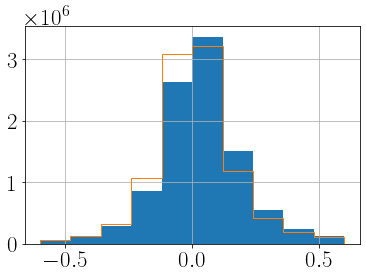

In [113]:
inb_CD.MM2_ep.hist()
inb_CD_corr.MM2_ep.hist(histtype = 'step')

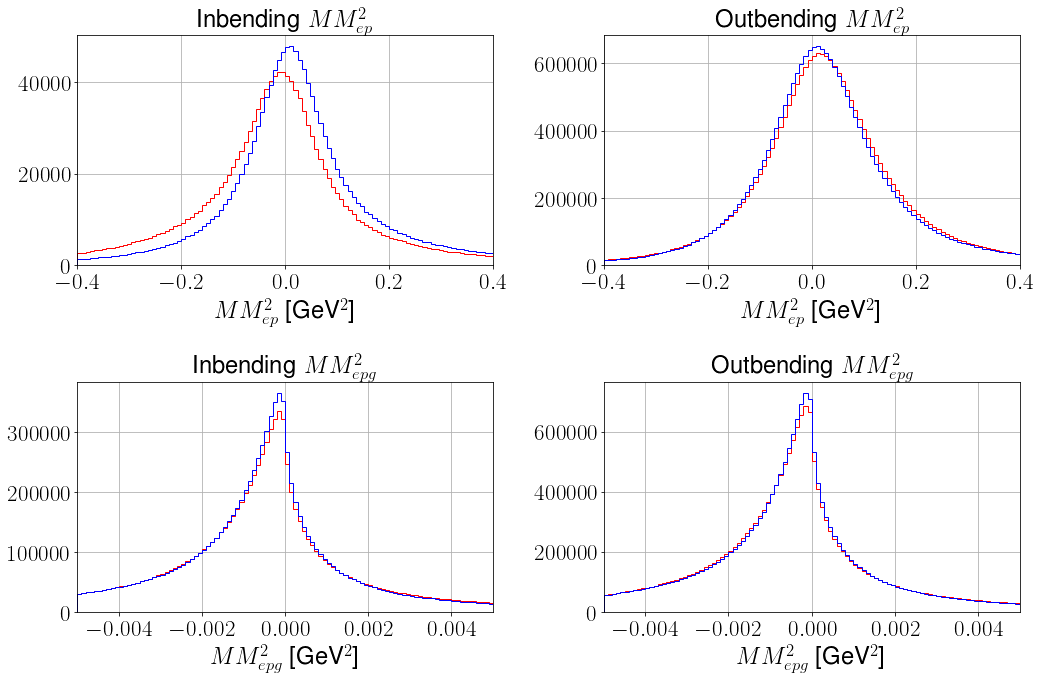

In [125]:
fig, axs = plt.subplots(2,2, figsize = (15, 10))
for row in range(2):
    for col in range(2):
#         ind =col+2*row
        if row == 0:
            axs[row, col].set_xlabel(r"$MM^2_{ep}$"+" ["+GeV2+"]")
            axs[row, col].set_xlim([-0.4, 0.4])
        else:
            axs[row, col].set_xlabel(r"$MM^2_{epg}$"+" ["+GeV2+"]")
            axs[row, col].set_xlim([-0.005, 0.005])
bins = np.linspace(-0.4, 0.4, 101)
bins2 = np.linspace(-0.005, 0.005, 101)
#         axs[row, col].axvline(35, linestyle = ':', color = 'k')
#         axs[row, col].axvline(45, linestyle = ':', color = 'k')
#         axs[row, col].axvline(65, linestyle = ':', color = 'k')
#         axs[row, col].set_xticks([9, 35, 45, 65])
#         axs[row, col].set_xticklabels([9, 35, 45, 65])


#         axs[row, col].set_ylabel(r"$\delta p$"+" ["+GeVc+"]")


inb_FD.MM2_ep.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[0,0])
inb_FD_corr.MM2_ep.hist(bins = bins, histtype = 'step', edgecolor = 'b', ax = axs[0,0])
# inb_CD.MM2_ep.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[0,0])
axs[0, 0].set_title("Inbending  " + r"$MM^2_{ep}$")

outb.MM2_ep.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[0,1])
outb_corr.MM2_ep.hist(bins = bins, histtype = 'step', edgecolor = 'b', ax = axs[0,1])
# outb_CD.MM2_ep.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[0,1])
axs[0, 1].set_title("Outbending  " + r"$MM^2_{ep}$")

inb.MM2_epg.hist(bins = bins2, histtype = 'step', edgecolor = 'r', ax = axs[1,0])
inb_corr.MM2_epg.hist(bins = bins2, histtype = 'step', edgecolor = 'b', ax = axs[1,0])
# inb_CD.MM2_ep.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[0,0])
axs[1, 0].set_title("Inbending  " + r"$MM^2_{epg}$")

outb.MM2_epg.hist(bins = bins2, histtype = 'step', edgecolor = 'r', ax = axs[1,1])
outb_corr.MM2_epg.hist(bins = bins2, histtype = 'step', edgecolor = 'b', ax = axs[1,1])
# outb_CD.MM2_ep.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[0,1])
axs[1, 1].set_title("Outbending  " + r"$MM^2_{epg}$")

plt.tight_layout()
plt.savefig("benchmarks_excl.pdf")

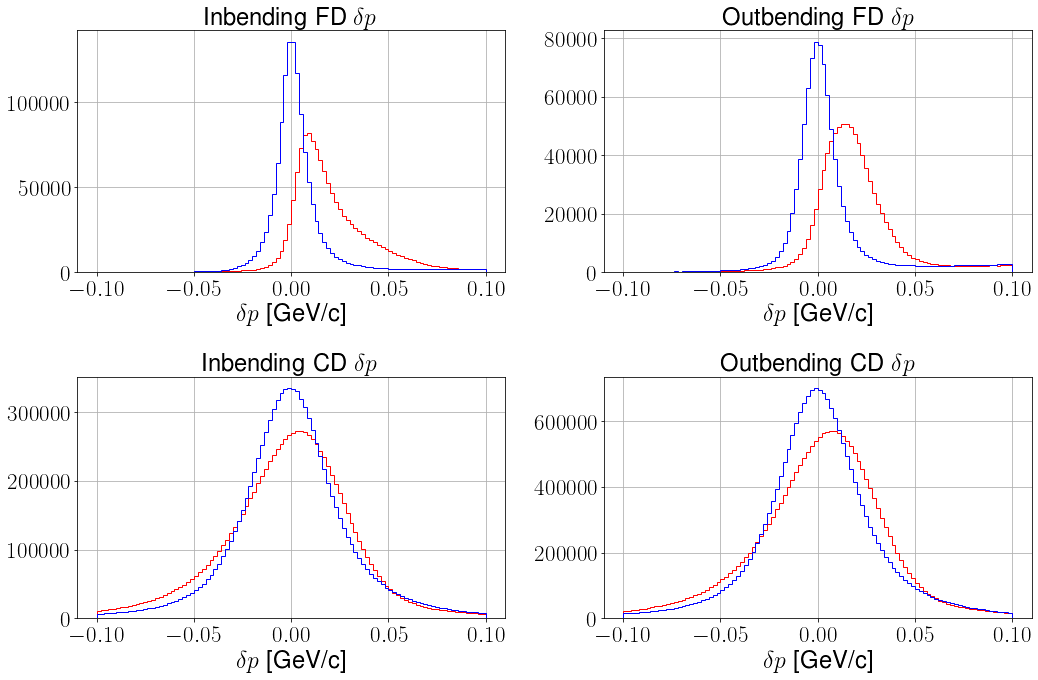

In [126]:
fig, axs = plt.subplots(2,2, figsize = (15, 10))
for row in range(2):
    for col in range(2):
        axs[row, col].set_xlabel(r"$\delta p$"+" ["+GeVc+"]")
# #         ind =col+2*row
#         if row == 0:
#             axs[row, col].set_xlabel(r"$MM^2_{ep}$"+" ["+GeV2+"]")
#             axs[row, col].set_xlim([-0.4, 0.4])
#         else:
#             axs[row, col].set_xlabel(r"$MM^2_{epg}$"+" ["+GeV2+"]")
#             axs[row, col].set_xlim([-0.005, 0.005])
# bins = np.linspace(-0.4, 0.4, 101)
# bins2 = np.linspace(-0.005, 0.005, 101)
#         axs[row, col].axvline(35, linestyle = ':', color = 'k')
#         axs[row, col].axvline(45, linestyle = ':', color = 'k')
#         axs[row, col].axvline(65, linestyle = ':', color = 'k')
#         axs[row, col].set_xticks([9, 35, 45, 65])
#         axs[row, col].set_xticklabels([9, 35, 45, 65])


#         axs[row, col].set_ylabel(r"$\delta p$"+" ["+GeVc+"]")
bins_p = np.linspace(-0.1, 0.1, 101)

(inb_FD.GenPp - inb_FD.Pp).hist(bins = bins_p, histtype = 'step', edgecolor = 'r', ax = axs[0,0])
(inb_FD_corr.GenPp - inb_FD_corr.Pp).hist(bins = bins_p, histtype = 'step', edgecolor = 'b', ax = axs[0,0])
# inb_CD.MM2_ep.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[0,0])
axs[0, 0].set_title("Inbending FD  " + r"$\delta p$")

(outb_FD.GenPp - outb_FD.Pp).hist(bins = bins_p, histtype = 'step', edgecolor = 'r', ax = axs[0,1])
(outb_FD_corr.GenPp - outb_FD_corr.Pp).hist(bins = bins_p, histtype = 'step', edgecolor = 'b', ax = axs[0,1])
# outb_CD.MM2_ep.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[0,1])
axs[0, 1].set_title("Outbending FD  " + r"$\delta p$")

(inb_CD.GenPp - inb_CD.Pp).hist(bins = bins_p, histtype = 'step', edgecolor = 'r', ax = axs[1,0])
(inb_CD_corr.GenPp - inb_CD_corr.Pp).hist(bins = bins_p, histtype = 'step', edgecolor = 'b', ax = axs[1,0])
# inb_CD.MM2_ep.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[0,0])
axs[1, 0].set_title("Inbending CD  " + r"$\delta p$")

(outb_CD.GenPp - outb_CD.Pp).hist(bins = bins_p, histtype = 'step', edgecolor = 'r', ax = axs[1,1])
(outb_CD_corr.GenPp - outb_CD_corr.Pp).hist(bins = bins_p, histtype = 'step', edgecolor = 'b', ax = axs[1,1])
# outb_CD.MM2_ep.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[0,1])
axs[1, 1].set_title("Outbending CD  " + r"$\delta p$")

plt.tight_layout()
plt.savefig("benchmarks_p.pdf")

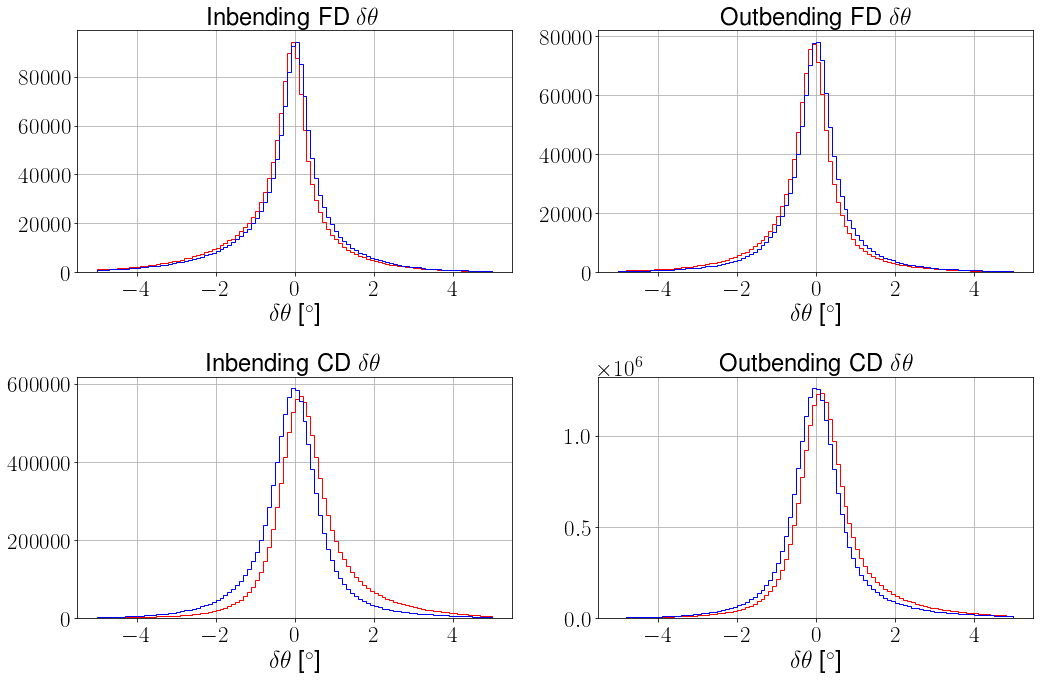

In [127]:
fig, axs = plt.subplots(2,2, figsize = (15, 10))
for row in range(2):
    for col in range(2):
        axs[row, col].set_xlabel(r"$\delta \theta$"+" ["+degree+"]")
# #         ind =col+2*row
#         if row == 0:
#             axs[row, col].set_xlabel(r"$MM^2_{ep}$"+" ["+GeV2+"]")
#             axs[row, col].set_xlim([-0.4, 0.4])
#         else:
#             axs[row, col].set_xlabel(r"$MM^2_{epg}$"+" ["+GeV2+"]")
#             axs[row, col].set_xlim([-0.005, 0.005])
# bins = np.linspace(-0.4, 0.4, 101)
# bins2 = np.linspace(-0.005, 0.005, 101)
#         axs[row, col].axvline(35, linestyle = ':', color = 'k')
#         axs[row, col].axvline(45, linestyle = ':', color = 'k')
#         axs[row, col].axvline(65, linestyle = ':', color = 'k')
#         axs[row, col].set_xticks([9, 35, 45, 65])
#         axs[row, col].set_xticklabels([9, 35, 45, 65])


#         axs[row, col].set_ylabel(r"$\delta \theta$"+" ["+GeVc+"]")
bins_theta = np.linspace(-5, 5, 101)

(inb_FD.GenPtheta - inb_FD.Ptheta).hist(bins = bins_theta, histtype = 'step', edgecolor = 'r', ax = axs[0,0])
(inb_FD_corr.GenPtheta - inb_FD_corr.Ptheta).hist(bins = bins_theta, histtype = 'step', edgecolor = 'b', ax = axs[0,0])
# inb_CD.MM2_ep.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[0,0])
axs[0, 0].set_title("Inbending FD  " + r"$\delta \theta$")

(outb_FD.GenPtheta - outb_FD.Ptheta).hist(bins = bins_theta, histtype = 'step', edgecolor = 'r', ax = axs[0,1])
(outb_FD_corr.GenPtheta - outb_FD_corr.Ptheta).hist(bins = bins_theta, histtype = 'step', edgecolor = 'b', ax = axs[0,1])
# outb_CD.MM2_ep.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[0,1])
axs[0, 1].set_title("Outbending FD  " + r"$\delta \theta$")

(inb_CD.GenPtheta - inb_CD.Ptheta).hist(bins = bins_theta, histtype = 'step', edgecolor = 'r', ax = axs[1,0])
(inb_CD_corr.GenPtheta - inb_CD_corr.Ptheta).hist(bins = bins_theta, histtype = 'step', edgecolor = 'b', ax = axs[1,0])
# inb_CD.MM2_ep.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[0,0])
axs[1, 0].set_title("Inbending CD  " + r"$\delta \theta$")

(outb_CD.GenPtheta - outb_CD.Ptheta).hist(bins = bins_theta, histtype = 'step', edgecolor = 'r', ax = axs[1,1])
(outb_CD_corr.GenPtheta - outb_CD_corr.Ptheta).hist(bins = bins_theta, histtype = 'step', edgecolor = 'b', ax = axs[1,1])
# outb_CD.MM2_ep.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[0,1])
axs[1, 1].set_title("Outbending CD  " + r"$\delta \theta$")

plt.tight_layout()
plt.savefig("benchmarks_theta.pdf")

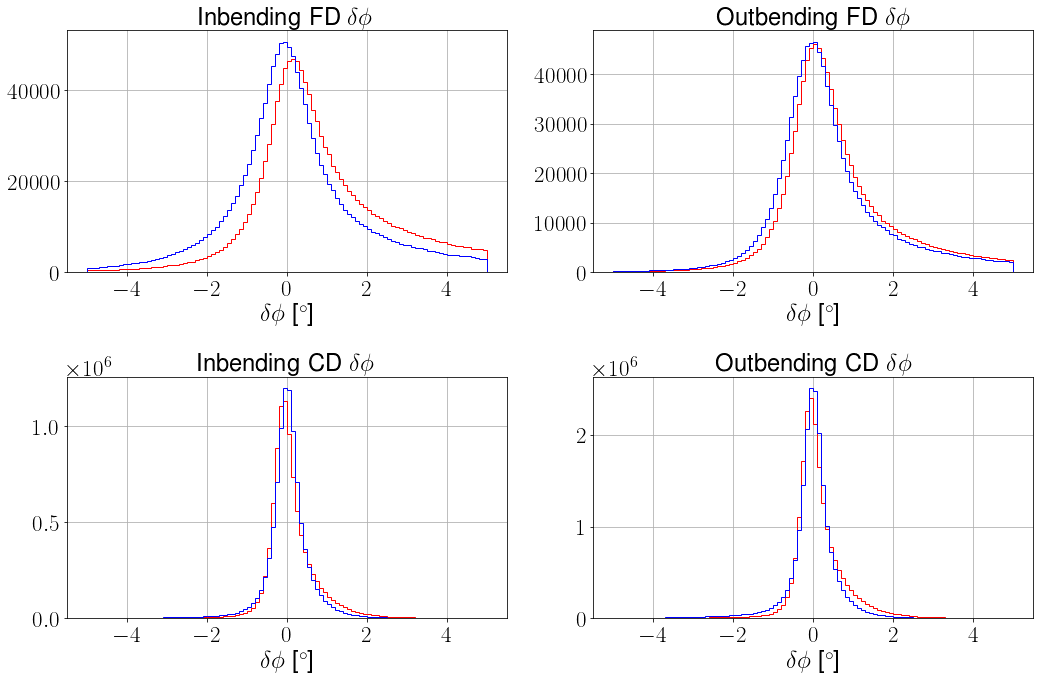

In [130]:
fig, axs = plt.subplots(2,2, figsize = (15, 10))
for row in range(2):
    for col in range(2):
        axs[row, col].set_xlabel(r"$\delta \phi$"+" ["+degree+"]")
# #         ind =col+2*row
#         if row == 0:
#             axs[row, col].set_xlabel(r"$MM^2_{ep}$"+" ["+GeV2+"]")
#             axs[row, col].set_xlim([-0.4, 0.4])
#         else:
#             axs[row, col].set_xlabel(r"$MM^2_{epg}$"+" ["+GeV2+"]")
#             axs[row, col].set_xlim([-0.005, 0.005])
# bins = np.linspace(-0.4, 0.4, 101)
# bins2 = np.linspace(-0.005, 0.005, 101)
#         axs[row, col].axvline(35, linestyle = ':', color = 'k')
#         axs[row, col].axvline(45, linestyle = ':', color = 'k')
#         axs[row, col].axvline(65, linestyle = ':', color = 'k')
#         axs[row, col].set_xticks([9, 35, 45, 65])
#         axs[row, col].set_xticklabels([9, 35, 45, 65])


#         axs[row, col].set_ylabel(r"$\delta \phi$"+" ["+GeVc+"]")
bins_phi = np.linspace(-5, 5, 101)

(inb_FD.GenPphi - inb_FD.Pphi).hist(bins = bins_phi, histtype = 'step', edgecolor = 'r', ax = axs[0,0])
(inb_FD_corr.GenPphi - inb_FD_corr.Pphi).hist(bins = bins_phi, histtype = 'step', edgecolor = 'b', ax = axs[0,0])
# inb_CD.MM2_ep.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[0,0])
axs[0, 0].set_title("Inbending FD  " + r"$\delta \phi$")

(outb_FD.GenPphi - outb_FD.Pphi).hist(bins = bins_phi, histtype = 'step', edgecolor = 'r', ax = axs[0,1])
(outb_FD_corr.GenPphi - outb_FD_corr.Pphi).hist(bins = bins_phi, histtype = 'step', edgecolor = 'b', ax = axs[0,1])
# outb_CD.MM2_ep.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[0,1])
axs[0, 1].set_title("Outbending FD  " + r"$\delta \phi$")

(inb_CD.GenPphi - inb_CD.Pphi).hist(bins = bins_phi, histtype = 'step', edgecolor = 'r', ax = axs[1,0])
(inb_CD_corr.GenPphi - inb_CD_corr.Pphi).hist(bins = bins_phi, histtype = 'step', edgecolor = 'b', ax = axs[1,0])
# inb_CD.MM2_ep.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[0,0])
axs[1, 0].set_title("Inbending CD  " + r"$\delta \phi$")

(outb_CD.GenPphi - outb_CD.Pphi).hist(bins = bins_phi, histtype = 'step', edgecolor = 'r', ax = axs[1,1])
(outb_CD_corr.GenPphi - outb_CD_corr.Pphi).hist(bins = bins_phi, histtype = 'step', edgecolor = 'b', ax = axs[1,1])
# outb_CD.MM2_ep.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[0,1])
axs[1, 1].set_title("Outbending CD  " + r"$\delta \phi$")

plt.tight_layout()
plt.savefig("benchmarks_phi.pdf")

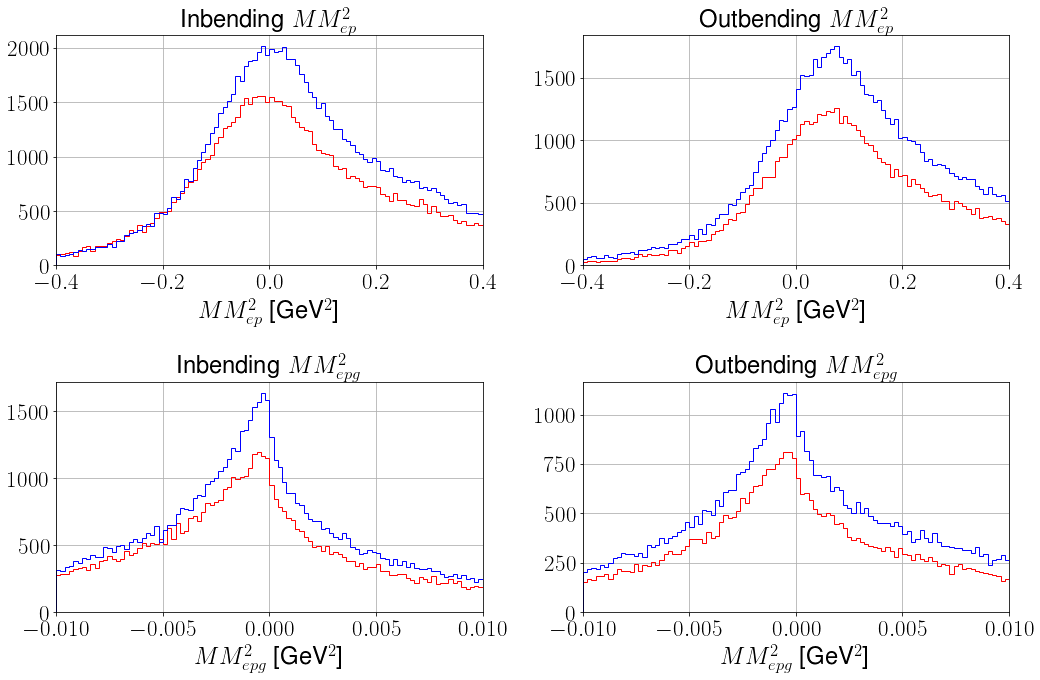

In [118]:
fig, axs = plt.subplots(2,2, figsize = (15, 10))
for row in range(2):
    for col in range(2):
#         ind =col+2*row
        if row == 0:
            axs[row, col].set_xlabel(r"$MM^2_{ep}$"+" ["+GeV2+"]")
            axs[row, col].set_xlim([-0.4, 0.4])
        else:
            axs[row, col].set_xlabel(r"$MM^2_{epg}$"+" ["+GeV2+"]")
            axs[row, col].set_xlim([-0.01, 0.01])
bins = np.linspace(-0.4, 0.4, 101)
bins2 = np.linspace(-0.01, 0.01, 101)
#         axs[row, col].axvline(35, linestyle = ':', color = 'k')
#         axs[row, col].axvline(45, linestyle = ':', color = 'k')
#         axs[row, col].axvline(65, linestyle = ':', color = 'k')
#         axs[row, col].set_xticks([9, 35, 45, 65])
#         axs[row, col].set_xticklabels([9, 35, 45, 65])


#         axs[row, col].set_ylabel(r"$\delta p$"+" ["+GeVc+"]")


exp_inb_noCorr.loc[exp_inb_noCorr.Psector<7, "MM2_ep"].hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[0,0])
exp_inb_Corr.loc[exp_inb_Corr.Psector<7, "MM2_ep"].hist(bins = bins, histtype = 'step', edgecolor = 'b', ax = axs[0,0])
axs[0, 0].set_title("Inbending  " + r"$MM^2_{ep}$")

exp_outb_noCorr.loc[exp_outb_noCorr.Psector<7, "MM2_ep"].hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[0,1])
exp_outb_Corr.loc[exp_outb_Corr.Psector<7, "MM2_ep"].hist(bins = bins, histtype = 'step', edgecolor = 'b', ax = axs[0,1])
axs[0, 1].set_title("Outbending  " + r"$MM^2_{ep}$")

exp_inb_noCorr.loc[exp_inb_noCorr.Psector<7, "MM2_epg"].hist(bins = bins2, histtype = 'step', edgecolor = 'r', ax = axs[1,0])
exp_inb_Corr.loc[exp_inb_Corr.Psector<7, "MM2_epg"].hist(bins = bins2, histtype = 'step', edgecolor = 'b', ax = axs[1,0])
axs[1, 0].set_title("Inbending  " + r"$MM^2_{epg}$")

exp_outb_noCorr.loc[exp_outb_noCorr.Psector<7, "MM2_epg"].hist(bins = bins2, histtype = 'step', edgecolor = 'r', ax = axs[1,1])
exp_outb_Corr.loc[exp_outb_Corr.Psector<7, "MM2_epg"].hist(bins = bins2, histtype = 'step', edgecolor = 'b', ax = axs[1,1])
# outb_CD.MM2_ep.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[0,1])
axs[1, 1].set_title("Outbending  " + r"$MM^2_{epg}$")

plt.tight_layout()
plt.show()

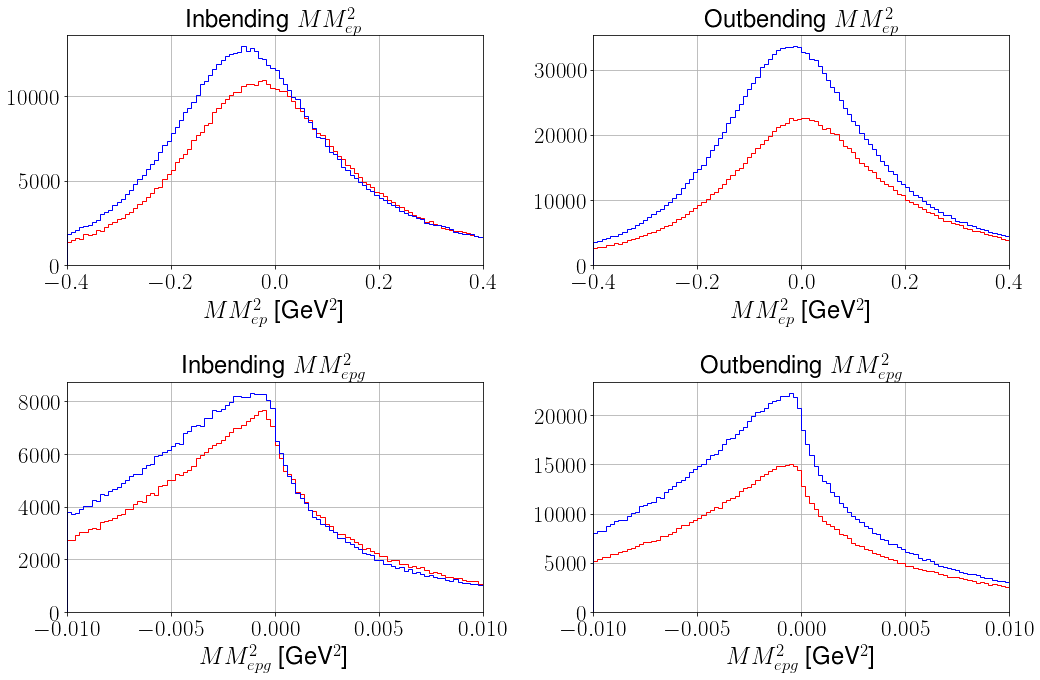

In [119]:
fig, axs = plt.subplots(2,2, figsize = (15, 10))
for row in range(2):
    for col in range(2):
#         ind =col+2*row
        if row == 0:
            axs[row, col].set_xlabel(r"$MM^2_{ep}$"+" ["+GeV2+"]")
            axs[row, col].set_xlim([-0.4, 0.4])
        else:
            axs[row, col].set_xlabel(r"$MM^2_{epg}$"+" ["+GeV2+"]")
            axs[row, col].set_xlim([-0.01, 0.01])
bins = np.linspace(-0.4, 0.4, 101)
bins2 = np.linspace(-0.01, 0.01, 101)
#         axs[row, col].axvline(35, linestyle = ':', color = 'k')
#         axs[row, col].axvline(45, linestyle = ':', color = 'k')
#         axs[row, col].axvline(65, linestyle = ':', color = 'k')
#         axs[row, col].set_xticks([9, 35, 45, 65])
#         axs[row, col].set_xticklabels([9, 35, 45, 65])


#         axs[row, col].set_ylabel(r"$\delta p$"+" ["+GeVc+"]")


exp_inb_noCorr.loc[exp_inb_noCorr.Psector>7, "MM2_ep"].hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[0,0])
exp_inb_Corr.loc[exp_inb_Corr.Psector>7, "MM2_ep"].hist(bins = bins, histtype = 'step', edgecolor = 'b', ax = axs[0,0])
axs[0, 0].set_title("Inbending  " + r"$MM^2_{ep}$")

exp_outb_noCorr.loc[exp_outb_noCorr.Psector>7, "MM2_ep"].hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[0,1])
exp_outb_Corr.loc[exp_outb_Corr.Psector>7, "MM2_ep"].hist(bins = bins, histtype = 'step', edgecolor = 'b', ax = axs[0,1])
axs[0, 1].set_title("Outbending  " + r"$MM^2_{ep}$")

exp_inb_noCorr.loc[exp_inb_noCorr.Psector>7, "MM2_epg"].hist(bins = bins2, histtype = 'step', edgecolor = 'r', ax = axs[1,0])
exp_inb_Corr.loc[exp_inb_Corr.Psector>7, "MM2_epg"].hist(bins = bins2, histtype = 'step', edgecolor = 'b', ax = axs[1,0])
axs[1, 0].set_title("Inbending  " + r"$MM^2_{epg}$")

exp_outb_noCorr.loc[exp_outb_noCorr.Psector>7, "MM2_epg"].hist(bins = bins2, histtype = 'step', edgecolor = 'r', ax = axs[1,1])
exp_outb_Corr.loc[exp_outb_Corr.Psector>7, "MM2_epg"].hist(bins = bins2, histtype = 'step', edgecolor = 'b', ax = axs[1,1])
# outb_CD.MM2_ep.hist(bins = bins, histtype = 'step', edgecolor = 'r', ax = axs[0,1])
axs[1, 1].set_title("Outbending  " + r"$MM^2_{epg}$")

plt.tight_layout()
plt.show()

In [4]:
exp_inb_noCorr = pd.read_pickle("/Volumes/SBHDD1TB/data/merged_noCorr/exp/dvcs_inb_noCorr.pkl")
exp_outb_noCorr = pd.read_pickle("/Volumes/SBHDD1TB/data/merged_noCorr/exp/dvcs_outb_noCorr.pkl")
exp_inb_Corr = pd.read_pickle("/Volumes/SBHDD1TB/data/merged/exp/dvcs_inb_newlyCorr.pkl")
exp_outb_Corr = pd.read_pickle("/Volumes/SBHDD1TB/data/merged/exp/dvcs_outb_newlyCorr.pkl")

<AxesSubplot:>

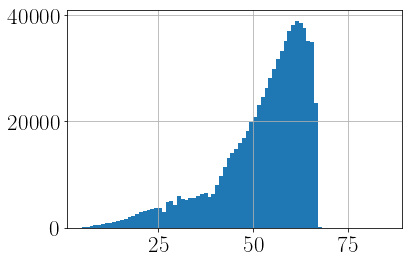

In [6]:
exp_inb_Corr.Ptheta.hist(bins = np.linspace(5, 85, 81))

In [48]:
df = pd.read_pickle("/Volumes/SBHDD1TB/data/merged/outbending/3111.pkl" )

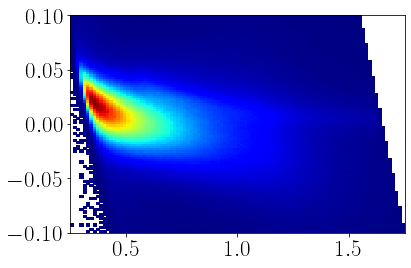

In [50]:
plt.hist2d(outb.Pp, outb.GenPp - outb.Pp , bins = [np.linspace(0.25, 1.75, 101), np.linspace(-0.1, 0.1 , 101)], cmap = cmap, cmin = 1)
plt.show()

In [55]:
df2 = pd.read_pickle("/Volumes/SBHDD1TB/data/merged/inbending/2942.pkl" )

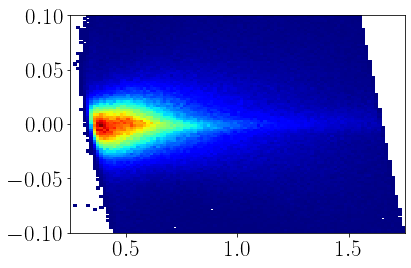

In [56]:
plt.hist2d(df2.Pp, df2.GenPp - df2.Pp , bins = [np.linspace(0.25, 1.75, 101), np.linspace(-0.1, 0.1 , 101)], cmap = cmap, cmin = 1)
plt.show()

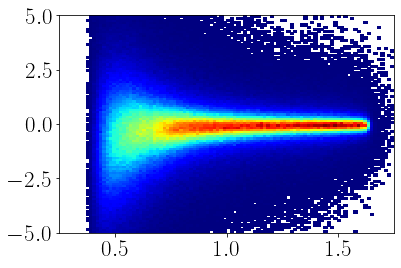

In [46]:
plt.hist2d(inb_FD.Pp, inb_FD.GenPtheta - inb_FD.Ptheta , bins = [np.linspace(0.25, 1.75, 101), np.linspace(-5, 5 , 101)], cmap = cmap, cmin = 1)
plt.show()

<AxesSubplot:>

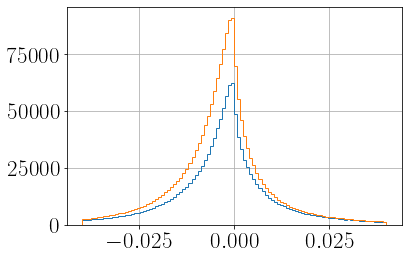

In [70]:
exp_outb_noCorr.MM2_epg.hist(bins = np.linspace(-0.04, 0.04, 101), histtype = 'step')
exp_outb_Corr.MM2_epg.hist(bins = np.linspace(-0.04, 0.04, 101), histtype = 'step')

<AxesSubplot:>

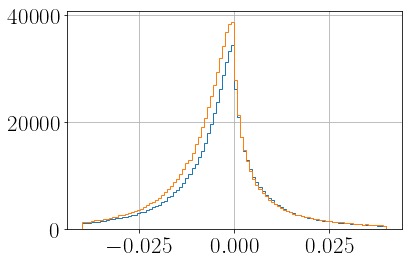

In [68]:
exp_inb_noCorr.MM2_epg.hist(bins = np.linspace(-0.04, 0.04, 101), histtype = 'step')
exp_inb_Corr.MM2_epg.hist(bins = np.linspace(-0.04, 0.04, 101), histtype = 'step')

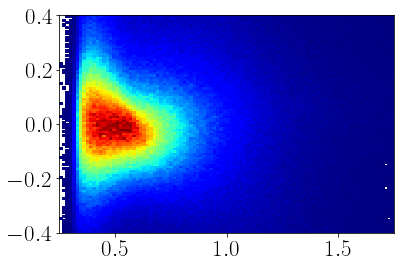

In [64]:
# plt.hist2d(exp_outb_noCorr.Pp, exp_outb_noCorr.MM2_ep, bins = [np.linspace(0.25, 1.75, 101), np.linspace(-0.4, 0.4, 101)], cmap = cmap , cmin = 1)
plt.hist2d(exp_outb_Corr.Pp, exp_outb_Corr.MM2_ep, bins = [np.linspace(0.25, 1.75, 101), np.linspace(-0.4, 0.4, 101)], cmap = cmap , cmin = 1)
plt.show()

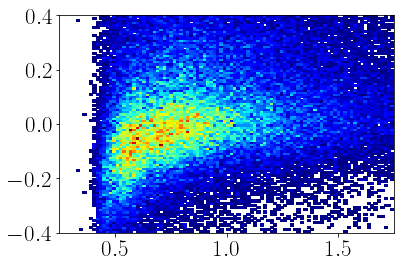

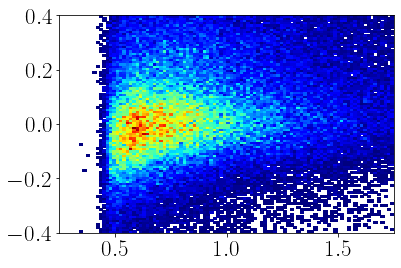

In [73]:
plt.hist2d(exp_inb_noCorr.loc[exp_inb_noCorr.Psector<7,"Pp"], exp_inb_noCorr.loc[exp_inb_noCorr.Psector<7,"MM2_ep"], bins = [np.linspace(0.25, 1.75, 101), np.linspace(-0.4, 0.4, 101)], cmap = cmap , cmin = 1)
plt.show()
plt.hist2d(exp_inb_Corr.loc[exp_inb_Corr.Psector<7,"Pp"], exp_inb_Corr.loc[exp_inb_Corr.Psector<7,"MM2_ep"], bins = [np.linspace(0.25, 1.75, 101), np.linspace(-0.4, 0.4, 101)], cmap = cmap , cmin = 1)
plt.show()

<AxesSubplot:>

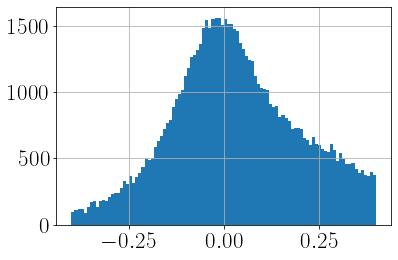

In [112]:
exp_inb_noCorr.loc[exp_inb_noCorr.Psector<7,"MM2_ep"].hist(bins = np.linspace(-0.4, 0.4, 101))
# exp_inb_noCorr.loc[exp_inb_noCorr.Psector>7,"MM2_ep"].hist(bins = np.linspace(-0.4, 0.4, 101))

<AxesSubplot:>

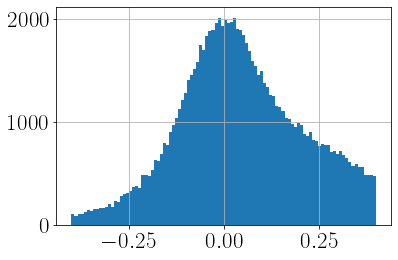

In [111]:
exp_inb_Corr.loc[exp_inb_Corr.Psector<7,"MM2_ep"].hist(bins = np.linspace(-0.4, 0.4, 101))
# exp_inb_Corr.loc[exp_inb_Corr.Psector>7,"MM2_ep"].hist(bins = np.linspace(-0.4, 0.4, 101))

<AxesSubplot:>

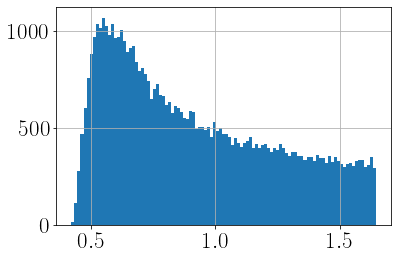

In [32]:
inb_FD.loc[(inb_FD.Ptheta > 27) & (inb_FD.Ptheta < 28), "GenPp"].hist(bins = 101)

In [33]:
inb_FD.loc[:, "DC1theta"] = getTheta([inb_FD.PDc1Hitx, inb_FD.PDc1Hity, inb_FD.PDc1Hitz])
inb_FD.loc[:, "DC1phi"] = getPhi([inb_FD.PDc1Hitx, inb_FD.PDc1Hity, inb_FD.PDc1Hitz])
inb_FD.loc[:, "DC1r"] = mag([inb_FD.PDc1Hitx, inb_FD.PDc1Hity, 0 + 0*inb_FD.PDc1Hitz])

In [94]:
inb_FD.loc[:, "DC2theta"] = getTheta([inb_FD.PDc2Hitx, inb_FD.PDc2Hity, inb_FD.PDc2Hitz])
inb_FD.loc[:, "DC2phi"] = getPhi([inb_FD.PDc2Hitx, inb_FD.PDc2Hity, inb_FD.PDc2Hitz])
inb_FD.loc[:, "DC2r"] = mag([inb_FD.PDc2Hitx, inb_FD.PDc2Hity, 0 + 0*inb_FD.PDc2Hitz])

In [95]:
inb_FD.loc[:, "DC3theta"] = getTheta([inb_FD.PDc3Hitx, inb_FD.PDc3Hity, inb_FD.PDc3Hitz])
inb_FD.loc[:, "DC3phi"] = getPhi([inb_FD.PDc3Hitx, inb_FD.PDc3Hity, inb_FD.PDc3Hitz])
inb_FD.loc[:, "DC3r"] = mag([inb_FD.PDc3Hitx, inb_FD.PDc3Hity, 0 + 0*inb_FD.PDc3Hitz])

In [96]:
inb_FD2 = inb_FD.loc[(inb_FD.Pp > 0.4) & (inb_FD.Pp < 0.6) , :]

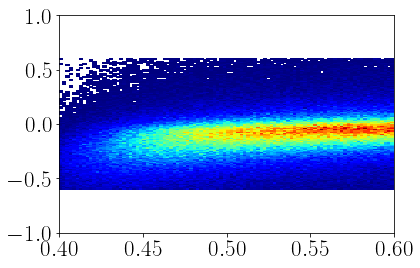

In [114]:
plt.hist2d(inb_FD2.Pp, inb_FD2.MM2_ep, bins = [np.linspace(0.4, 0.6, 101), np.linspace(-1, 1, 181)], cmap = cmap, cmin = 1)
plt.show()

In [22]:
df = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/ProtonStudies/442/protons.pkl")

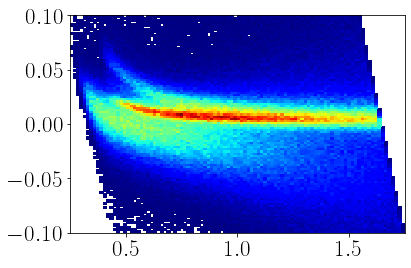

In [18]:
plt.hist2d(df.Pp, df.GenPp - df.Pp, bins = [np.linspace(0.25, 1.75, 101), np.linspace(-0.1, 0.1, 101)], cmap = cmap, cmin =1)
plt.show()

In [23]:
df = df.loc[df.Psector>7, :]

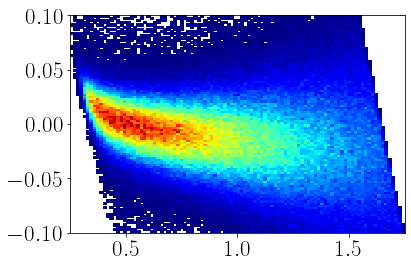

In [24]:
plt.hist2d(df.Pp, df.GenPp - df.Pp, bins = [np.linspace(0.25, 1.75, 101), np.linspace(-0.1, 0.1, 101)], cmap = cmap, cmin =1)
plt.show()

<AxesSubplot:>

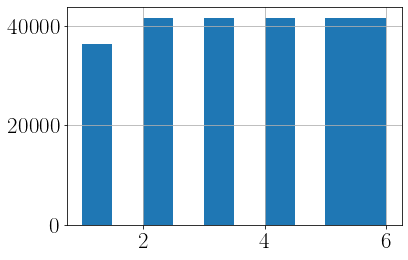

In [21]:
df.Psector.hist()

In [16]:
len(df)

145858

In [289]:
test = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/test/2942.pkl")

In [301]:
test_FD =  test.loc[test.Psector<7, :]
test_CD =  test.loc[test.Psector>7, :]

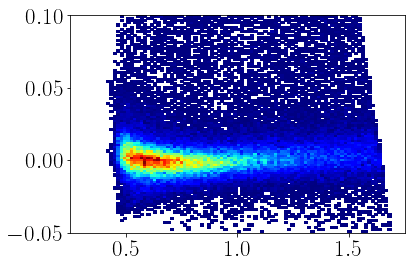

In [302]:
plt.hist2d(test_FD.Pp, test_FD.GenPp - test_FD.Pp, bins = [np.linspace(0.25, 1.75, 101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
plt.show()

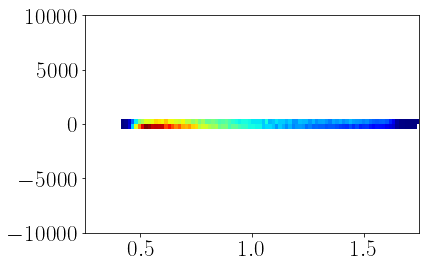

In [318]:
plt.hist2d(test_FD.Pp, test_FD.GenPtheta - test_FD.Ptheta, bins = [np.linspace(0.25, 1.75, 101), np.linspace(-10000, 10000, 51)], cmap = cmap, cmin = 1)
plt.show()

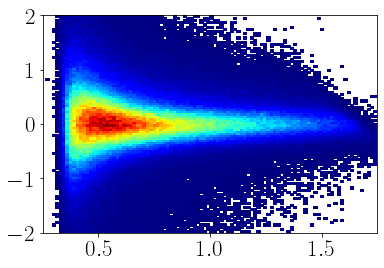

In [364]:
plt.hist2d(test_CD.Pp, test_CD.GenPphi - test_CD.Pphi, bins = [np.linspace(0.25, 1.75, 101), np.linspace(-2, 2, 101)], cmap = cmap, cmin = 1)
plt.show()

In [325]:
prob = test.loc[test.Ptheta<0, :]

const_FD = -0.16742969 + 0.00697925 * prob.Ptheta
coeff_FD = 0.23352115 - 0.01338697 * prob.Ptheta
CorrectedPtheta_FD_1 = const_FD + coeff_FD/prob.loc[:, "GenPp"]/prob.loc[:, "GenPp"] + prob.loc[:, "GenPtheta"]

const_FD = 2.04334532 * 10 -1.81052405 * prob.Ptheta + 5.32556360*0.01 * prob.Ptheta * prob.Ptheta -5.23157558*0.0001 * prob.Ptheta * prob.Ptheta * prob.Ptheta
coeff_FD = 8.74233279 -7.63869344 * 0.1 * prob.Ptheta + 2.22376362*0.01 * prob.Ptheta * prob.Ptheta -2.16457260*0.0001 * prob.Ptheta * prob.Ptheta * prob.Ptheta
CorrectedPtheta_FD_2 = const_FD + coeff_FD/prob.loc[:, "GenPp"]/prob.loc[:, "GenPp"] + prob.loc[:, "GenPtheta"]


In [347]:
CorrectedPtheta_FD_1 - prob.loc[:, "GenPtheta"]

10669       6.829400
21800       6.784109
30189       4.872474
50804     147.173766
77455      33.929201
88275      31.040833
96930       5.236796
125315    416.590321
173541      7.198234
176905    232.427731
177485     26.194695
193423     42.765655
195301     79.879728
204045     24.806536
246705      8.114170
251433      5.105523
269873    139.794571
274478     18.676511
368384     28.330032
376484      7.652760
381999      3.737114
389237      6.599369
429594     91.980273
433111      7.970748
465313      3.732264
488596      6.727671
491704    150.591687
497184      6.675038
524376     88.009072
546001    103.185000
572792      5.370406
576914      6.670150
589521     40.471747
602869     65.806425
618671      5.782265
628351     29.423564
657963      5.441394
699886     99.689905
720524      8.421997
736983     39.226118
dtype: float64

<AxesSubplot:>

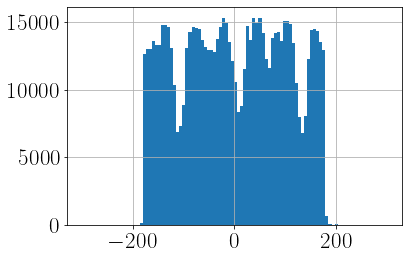

In [356]:
test.Pphi.hist(bins = np.linspace(-300, 300, 101))

<AxesSubplot:>

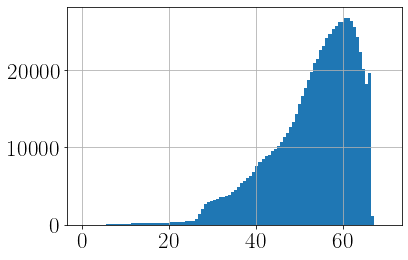

In [357]:
test.Ptheta.hist(bins = np.linspace(0, 70, 101))

<AxesSubplot:>

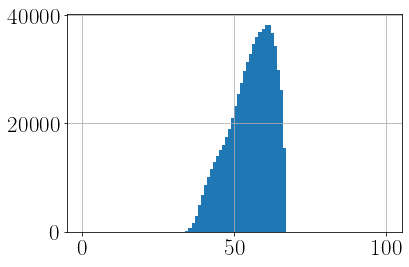

In [362]:
test_CD.GenPtheta.hist(bins = np.linspace(0, 100, 101))

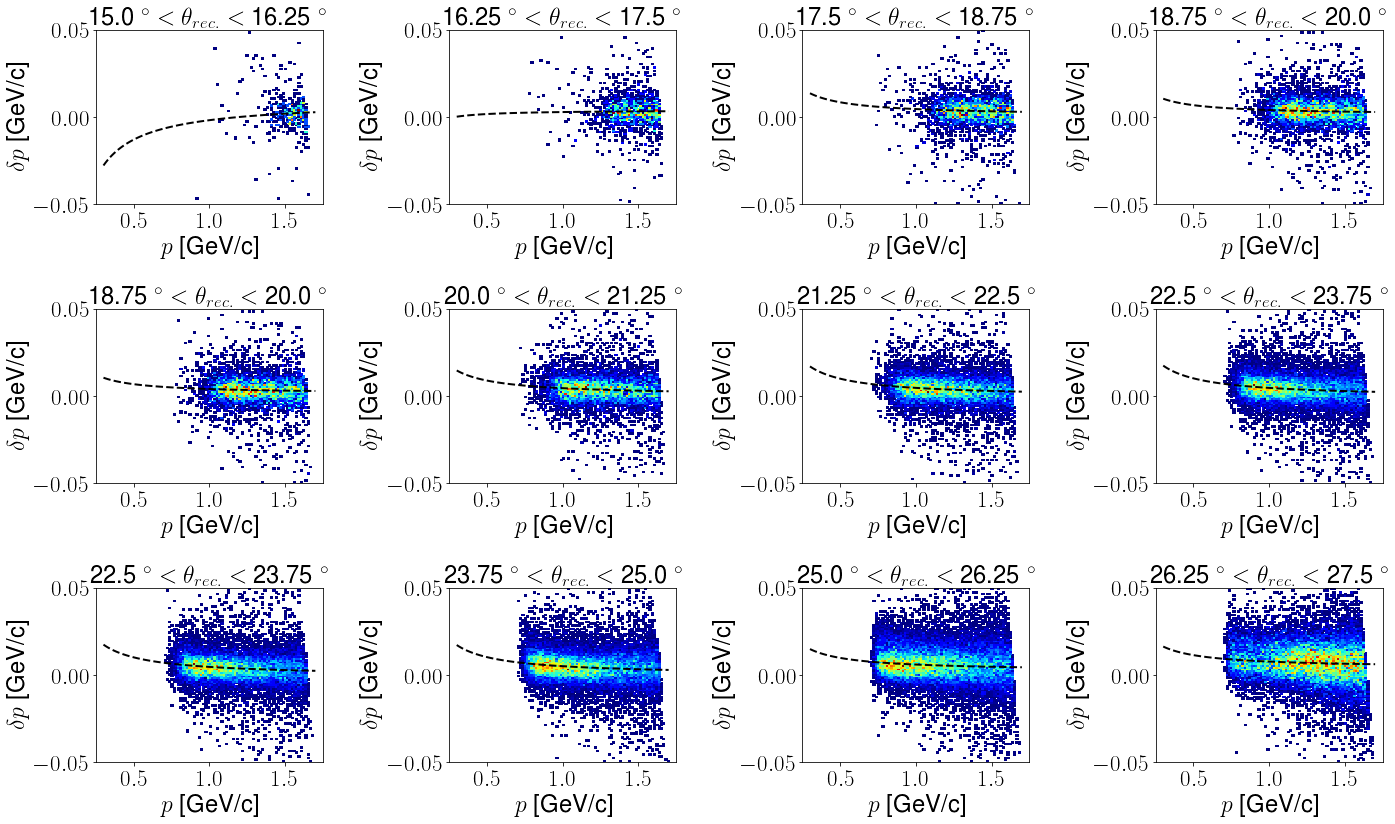

In [388]:
x = np.linspace(0, 11, 12)*1.25 + 15 + 1.25/2
fig, axs = plt.subplots(3,4, figsize=(20,12))
for row in range(3):
    for col in range(4):
        ind =col+3*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outb_FD_1.Ptheta >= 1.25*ind+15) & (outb_FD_1.Ptheta < 1.25*(ind+1)+15)
        axs[row, col].hist2d(outb_FD_1.loc[thetaCond, "Pp"], outb_FD_1.loc[thetaCond, "GenPp"] - outb_FD_1.loc[thetaCond, "Pp"], bins = [np.linspace(0.25, 1.75, 101), np.linspace(-0.05, 0.05, 101)], cmap = cmap, cmin =1)
        param = params_p[ind]
#         param = [correction2(param1_p, x[ind]), correction3(param2_p, x[ind])]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 101), correction(param, np.linspace(0.3, 1.7, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(1.25*ind+15)+" "+degree + r" $<\theta_{rec.}<$ " + str(1.25*(ind+1)+15)+" "+degree)
plt.tight_layout()
# plt.show()
plt.savefig("protonFD_outb_mom_1.pdf")

In [434]:
params_p = []
uncertainties_p = []
x0 = [-4.80389058e-05,  4.53222098e-03]
# loss = []
for i in range(12):

    thetaCond = (outb_FD_1.Ptheta >= 1.25*i+15) & (outb_FD_1.Ptheta < 1.25*(i+1)+15)
    dfi = copy(outb_FD_1.loc[thetaCond, ["Pp", "GenPp"]])
    dffit = copy(dfi[np.abs(dfi["GenPp"]-dfi["Pp"]-correction(x0, dfi["Pp"]))<0.01])
    for i in range (0, 5):
        res_lsq = least_squares(fun, x0, args=(dffit["Pp"], (dffit["GenPp"]-dffit["Pp"])))    
        dffit = copy(dfi[np.abs(dfi["GenPp"]-dfi["Pp"]-correction(res_lsq.x, dfi["Pp"]))<0.01])
        x0 = res_lsq.x
    
    params_p.append(res_lsq.x)
    
    # uncertainty
    # https://github.com/scipy/scipy/blob/2526df72e5d4ca8bad6e2f4b3cbdfbc33e805865/scipy/optimize/minpack.py#L739
    _, s, VT = np.linalg.svd(res_lsq.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(res_lsq.jac.shape) * s[0]
    s = s[s > threshold]
    VT = VT[:s.size]
    pcov = np.dot(VT.T / s**2, VT)
    s_sq = np.sum((dfi["GenPp"]-dfi["Pp"]-correction(res_lsq.x, dfi["Pp"]))**2) / (len(dfi) - len(x0))
    pcov = pcov * s_sq
    uncertainties_p.append(np.sqrt(np.diag(pcov)))

In [435]:
params_p = np.array(params_p)
consts_p = params_p[:, 0]
coeffs_p = params_p[:, 1]

uncertainties_p = np.array(uncertainties_p)
consts_uncertainties_p = uncertainties_p[:, 0]
coeffs_uncertainties_p = uncertainties_p[:, 1]

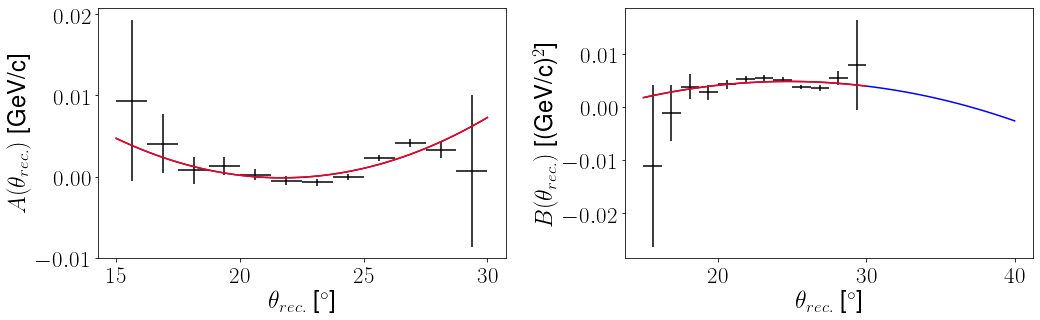

In [440]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].errorbar(np.linspace(0, 11, 12)*1.25+ 15 + 1.25/2, consts_p, xerr= 1.25/2, yerr = consts_uncertainties_p, color='k', linestyle = '')
ax[1].errorbar(np.linspace(0, 11, 12)*1.25+ 15 + 1.25/2, coeffs_p, xerr= 1.25/2, yerr = coeffs_uncertainties_p, color='k', linestyle = '')
ax[0].plot(np.linspace(15, 30, 101), correction3(param1_p, np.linspace(15, 30, 101)), color = 'b')
ax[1].plot(np.linspace(15, 40, 101), correction3(param2_p, np.linspace(15, 40, 101)), color = 'b')
ax[0].set_xlabel(r"$\theta_{rec.}$"+" ["+degree+"]")
ax[0].set_ylabel(r"$A(\theta_{rec.})$"+" ["+GeVc+"]")
# ax[0].set_xlim([5, 35])
# ax[0].set_xticks(np.linspace(5, 35, 7))
# ax[1].set_ylim([0, 0.01])
# ax[1].set_xticks(np.linspace(5, 35, 7))
x = np.linspace(15, 30, 101)
const_FD = 0.05083242 -0.00469777*x + 0.0001082*x*x
coeff_FD = -1.47443264*0.01 + 1.58220893*0.001*x -3.19490013*0.00001*x*x
ax[0].plot(x, const_FD, color = 'r')
ax[1].plot(x, coeff_FD, color = 'r')


ax[1].set_xlabel(r"$\theta_{rec.}$"+" ["+degree+"]")
ax[1].set_ylabel(r"$B(\theta_{rec.})$"+" ["+GeVc2+"]")
plt.tight_layout()
plt.show()
# plt.savefig("coeff_example.pdf")

In [438]:
x = np.linspace(0, 11, 12)*1.25+15+1.25/2

res_lsq = least_squares(fun3, [0, 0, 0], args=(x[2:-1], consts_p[2:-1]))    
param1_p = res_lsq.x
res_lsq = least_squares(fun3, [0, 0, 0], args=(x[2:-1], coeffs_p[2:-1]))    
param2_p = res_lsq.x


In [439]:
print(param1_p, param2_p)

[ 0.05083242 -0.00469777  0.0001082 ] [-1.47443264e-02  1.58220893e-03 -3.19490013e-05]


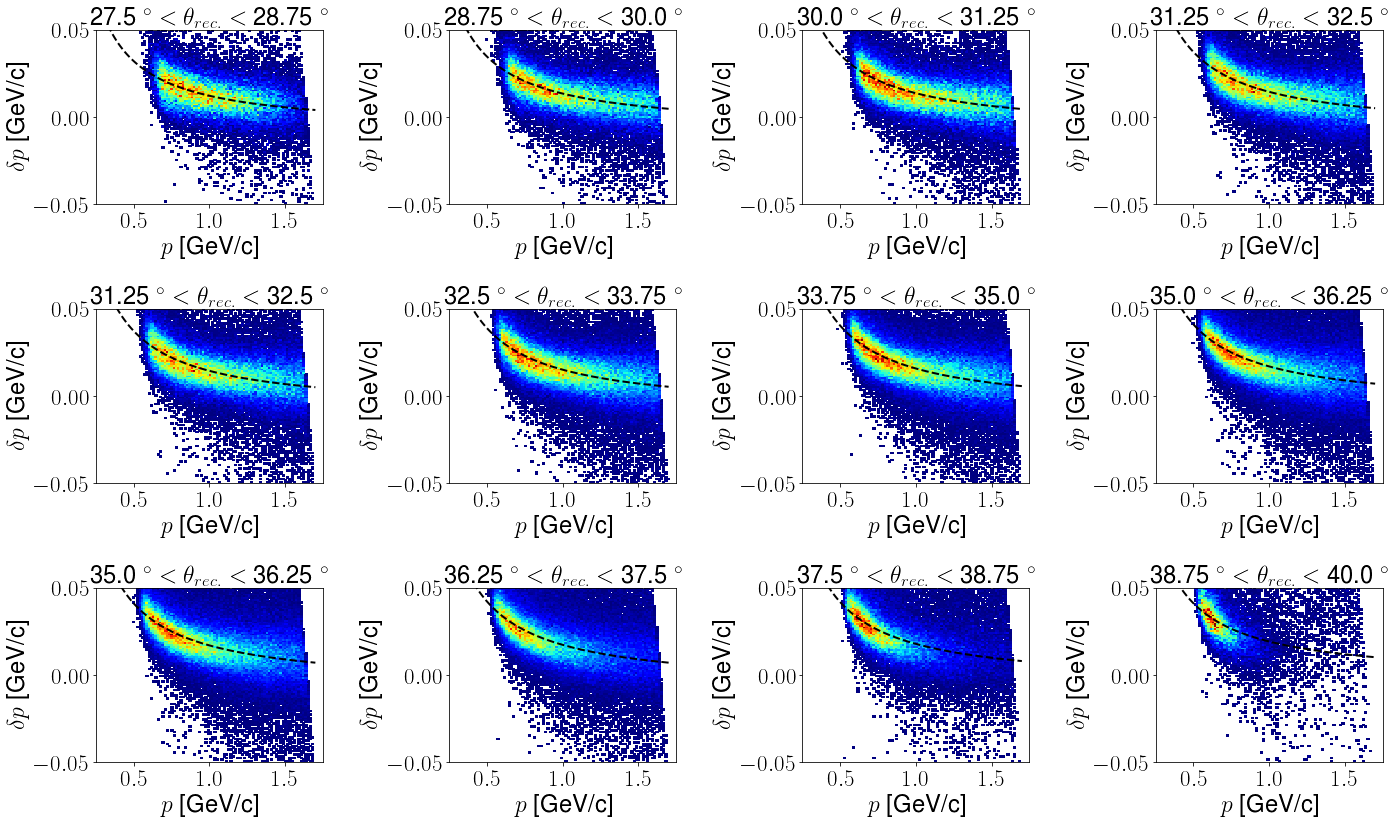

In [453]:
x = np.linspace(0, 11, 12)*1.25 + 27.5 + 1.25/2
fig, axs = plt.subplots(3,4, figsize=(20,12))
for row in range(3):
    for col in range(4):
        ind =col+3*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outb_FD_2.Ptheta >= 1.25*ind+27.5) & (outb_FD_2.Ptheta < 1.25*(ind+1)+27.5)
        axs[row, col].hist2d(outb_FD_2.loc[thetaCond, "Pp"], outb_FD_2.loc[thetaCond, "GenPp"] - outb_FD_2.loc[thetaCond, "Pp"], bins = [np.linspace(0.25, 1.75, 101), np.linspace(-0.05, 0.05, 101)], cmap = cmap, cmin =1)
        param = params_p[ind]
#         param = [correction2(param1_p, x[ind]), correction3(param2_p, x[ind])]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 101), correction(param, np.linspace(0.3, 1.7, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(1.25*ind+27.5)+" "+degree + r" $<\theta_{rec.}<$ " + str(1.25*(ind+1)+27.5)+" "+degree)
plt.tight_layout()
# plt.show()
plt.savefig("protonFD_outb_mom_2.pdf")

In [441]:
params_p = []
uncertainties_p = []
x0 = [-4.80389058e-05,  4.53222098e-03]
# loss = []
for i in range(12):

    thetaCond = (outb_FD_2.Ptheta >= 1.25*i+27.5) & (outb_FD_2.Ptheta < 1.25*(i+1)+27.5)
    dfi = copy(outb_FD_2.loc[thetaCond, ["Pp", "GenPp"]])
    dffit = copy(dfi[np.abs(dfi["GenPp"]-dfi["Pp"])<0.05])
    for i in range (0, 5):
        res_lsq = least_squares(fun, x0, args=(dffit["Pp"], (dffit["GenPp"]-dffit["Pp"])))    
#         dffit = copy(dfi[np.abs(dfi["GenPp"]-dfi["Pp"]-correction(res_lsq.x, dfi["Pp"]))<0.01])
        x0 = res_lsq.x
    
    params_p.append(res_lsq.x)
    
    # uncertainty
    # https://github.com/scipy/scipy/blob/2526df72e5d4ca8bad6e2f4b3cbdfbc33e805865/scipy/optimize/minpack.py#L739
    _, s, VT = np.linalg.svd(res_lsq.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(res_lsq.jac.shape) * s[0]
    s = s[s > threshold]
    VT = VT[:s.size]
    pcov = np.dot(VT.T / s**2, VT)
    s_sq = np.sum((dfi["GenPp"]-dfi["Pp"]-correction(res_lsq.x, dfi["Pp"]))**2) / (len(dfi) - len(x0))
    pcov = pcov * s_sq
    uncertainties_p.append(np.sqrt(np.diag(pcov)))

In [442]:
params_p = np.array(params_p)
consts_p = params_p[:, 0]
coeffs_p = params_p[:, 1]

uncertainties_p = np.array(uncertainties_p)
consts_uncertainties_p = uncertainties_p[:, 0]
coeffs_uncertainties_p = uncertainties_p[:, 1]

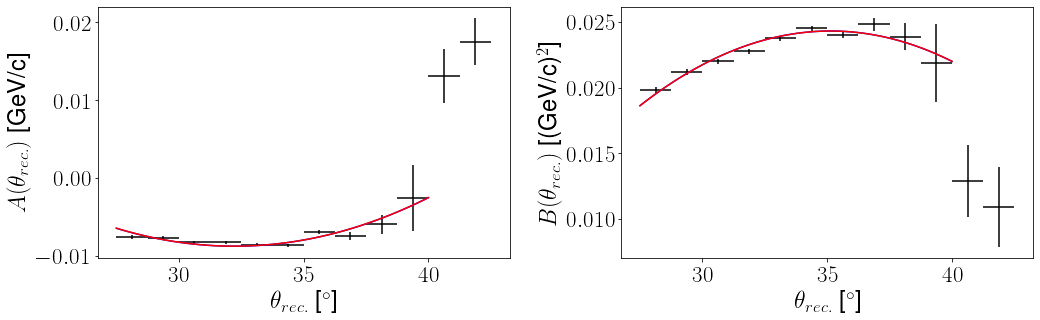

In [446]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].errorbar(np.linspace(0, 11, 12)*1.25+ 27.5 + 1.25/2, consts_p, xerr= 1.25/2, yerr = consts_uncertainties_p, color='k', linestyle = '')
ax[1].errorbar(np.linspace(0, 11, 12)*1.25+ 27.5 + 1.25/2, coeffs_p, xerr= 1.25/2, yerr = coeffs_uncertainties_p, color='k', linestyle = '')
ax[0].plot(np.linspace(27.5, 40, 101), correction3(param1_p, np.linspace(27.5, 40, 101)), color = 'b')
ax[1].plot(np.linspace(27.5, 40, 101), correction3(param2_p, np.linspace(27.5, 40, 101)), color = 'b')


x = np.linspace(27.5, 40, 101)
const_FD = 0.09832589 -0.0066463*x + 0.00010312*x*x
coeff_FD = -9.61421691*0.01 + 6.85638807*0.001*x -9.75766427*0.00001*x*x
ax[0].plot(x, const_FD, color ='r')
ax[1].plot(x, coeff_FD, color ='r')
ax[0].set_xlabel(r"$\theta_{rec.}$"+" ["+degree+"]")
ax[0].set_ylabel(r"$A(\theta_{rec.})$"+" ["+GeVc+"]")
# ax[0].set_xlim([5, 35])
# ax[0].set_xticks(np.linspace(5, 35, 7))
# ax[1].set_ylim([0, 0.01])
# ax[1].set_xticks(np.linspace(5, 35, 7))
ax[1].set_xlabel(r"$\theta_{rec.}$"+" ["+degree+"]")
ax[1].set_ylabel(r"$B(\theta_{rec.})$"+" ["+GeVc2+"]")
plt.tight_layout()
plt.show()
# plt.savefig("coeff_example.pdf")

In [444]:
x = np.linspace(0, 11, 12)*1.25+27.5+1.25/2

res_lsq = least_squares(fun3, [0, 0, 0], args=(x[:-2], consts_p[:-2]))    
param1_p = res_lsq.x
res_lsq = least_squares(fun3, [0, 0, 0], args=(x[:-2], coeffs_p[:-2]))    
param2_p = res_lsq.x


In [445]:
print(param1_p, param2_p)

[ 0.09832589 -0.0066463   0.00010312] [-9.61421691e-02  6.85638807e-03 -9.75766427e-05]


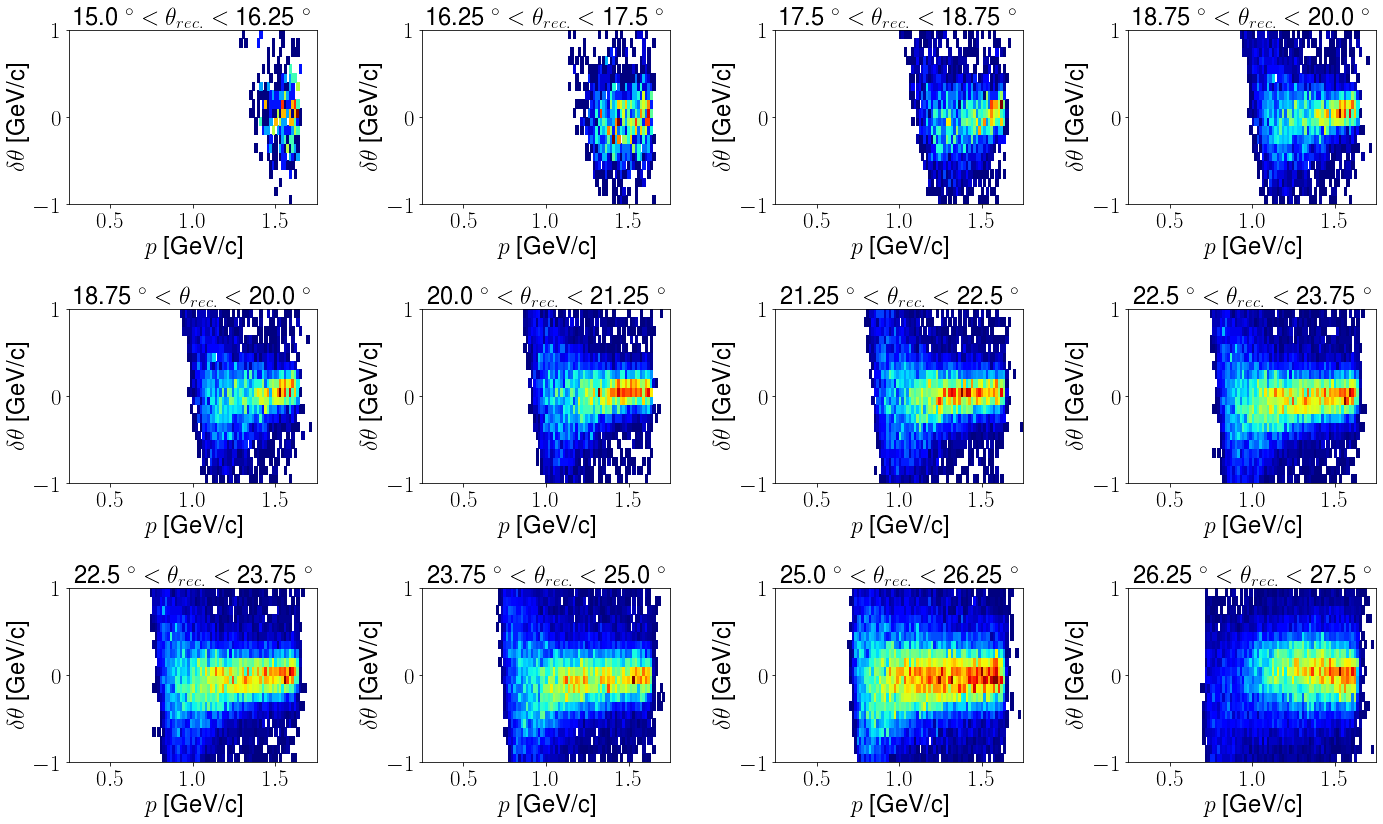

In [542]:
x = np.linspace(0, 11, 12)*1.25 + 15 + 1.25/2
fig, axs = plt.subplots(3,4, figsize=(20,12))
for row in range(3):
    for col in range(4):
        ind =col+3*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outb_FD_1.Ptheta >= 1.25*ind+15) & (outb_FD_1.Ptheta < 1.25*(ind+1)+15)
        param = [correction5(param1_theta, x[ind]), correction5(param2_theta, x[ind])]
#         axs[row, col].hist2d(outb_FD_1.loc[thetaCond, "Pp"], outb_FD_1.loc[thetaCond, "GenPtheta"] - outb_FD_1.loc[thetaCond, "Ptheta"] - correction6(param, outb_FD_1.loc[thetaCond, "Pp"]), bins = [np.linspace(0.25, 1.75, 101), np.linspace(-1, 1, 21)], cmap = cmap, cmin =1)
        axs[row, col].hist2d(outb_FD_1.loc[thetaCond, "Pp"], outb_FD_1.loc[thetaCond, "GenPtheta"] - outb_FD_1.loc[thetaCond, "Ptheta"] - correction6(param, outb_FD_1.loc[thetaCond, "Pp"]), bins = [np.linspace(0.25, 1.75, 101), np.linspace(-1, 1, 21)], cmap = cmap, cmin =1)
#         param = params_theta[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.3, 1.7, 101), correction6(param, np.linspace(0.3, 1.7, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+degree+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(1.25*ind+15)+" "+degree + r" $<\theta_{rec.}<$ " + str(1.25*(ind+1)+15)+" "+degree)
plt.tight_layout()
# plt.show()
plt.savefig("protonFD_outb_theta_1.pdf")

In [574]:
params_theta = []
uncertainties_theta = []
x0 = [0, 0.5]
# loss = []
for i in range(12):

    thetaCond = (outb_FD_1.Ptheta >= 1.25*i+15) & (outb_FD_1.Ptheta < 1.25*(i+1)+15)
    dfi = copy(outb_FD_1.loc[thetaCond, ["Pp", "GenPp", "GenPtheta", "Ptheta"]])
    dffit = copy(dfi[np.abs(dfi["GenPtheta"]-dfi["Ptheta"])<1])
    for i in range (0, 1):
        res_lsq = least_squares(fun6, x0, args=(dffit["Pp"], (dffit["GenPtheta"]-dffit["Ptheta"])))    
#         dffit = copy(dfi[np.abs(dfi["GenPp"]-dfi["Pp"]-correction(res_lsq.x, dfi["Pp"]))<0.01])
        x0 = res_lsq.x
    
    params_theta.append(res_lsq.x)
    
    # uncertainty
    # https://github.com/scipy/scipy/blob/2526df72e5d4ca8bad6e2f4b3cbdfbc33e805865/scipy/optimize/minpack.py#L739
    _, s, VT = np.linalg.svd(res_lsq.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(res_lsq.jac.shape) * s[0]
    s = s[s > threshold]
    VT = VT[:s.size]
    pcov = np.dot(VT.T / s**2, VT)
    s_sq = np.sum((dfi["GenPtheta"]-dfi["Ptheta"]-correction6(res_lsq.x, dfi["Pp"]))**2) / (len(dfi) - len(x0))
    pcov = pcov * s_sq
    uncertainties_theta.append(np.sqrt(np.diag(pcov)))

In [575]:
params_theta = np.array(params_theta)
consts_theta = params_theta[:, 0]
coeffs_theta = params_theta[:, 1]

uncertainties_theta = np.array(uncertainties_theta)
consts_uncertainties_theta = uncertainties_theta[:, 0]
coeffs_uncertainties_theta = uncertainties_theta[:, 1]

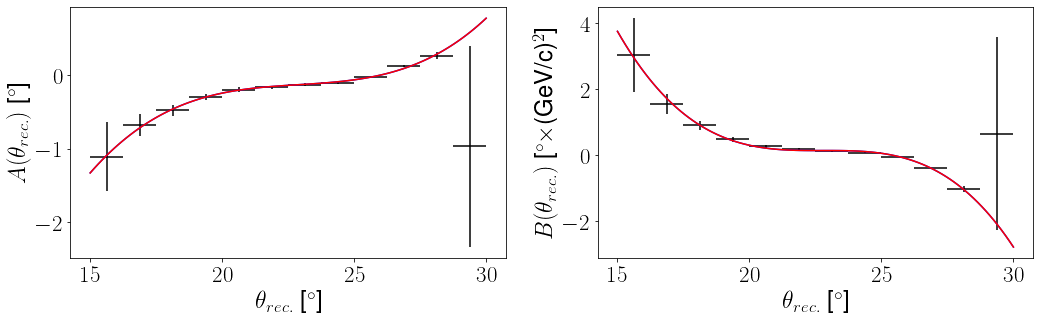

In [579]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].errorbar(np.linspace(0, 11, 12)*1.25+ 15 + 1.25/2, consts_theta, xerr= 1.25/2, yerr = consts_uncertainties_theta, color='k', linestyle = '')
ax[1].errorbar(np.linspace(0, 11, 12)*1.25+ 15 + 1.25/2, coeffs_theta, xerr= 1.25/2, yerr = coeffs_uncertainties_theta, color='k', linestyle = '')
ax[0].plot(np.linspace(15, 30, 101), correction5(param1_theta, np.linspace(15, 30, 101)), color = 'b')
ax[1].plot(np.linspace(15, 30, 101), correction5(param2_theta, np.linspace(15, 30, 101)), color = 'b')


x = np.linspace(15, 30, 101)
const_FD = -2.56460305*10 + 3.29877542*x -1.43106886*0.1*x*x + 2.08341898*0.001*x*x*x
coeff_FD =  9.12532740*10 -1.20100762*10*x + 5.27654711*0.1*x*x -7.72656759*0.001*x*x*x
ax[0].plot(x, const_FD, color ='r')
ax[1].plot(x, coeff_FD, color ='r')
ax[0].set_xlabel(r"$\theta_{rec.}$"+" ["+degree+"]")
ax[0].set_ylabel(r"$A(\theta_{rec.})$"+" ["+degree+"]")
# ax[0].set_xlim([5, 35])
# ax[0].set_xticks(np.linspace(5, 35, 7))
# ax[1].set_ylim([0, 0.01])
# ax[1].set_xticks(np.linspace(5, 35, 7))
ax[1].set_xlabel(r"$\theta_{rec.}$"+" ["+degree+"]")
ax[1].set_ylabel(r"$B(\theta_{rec.})$"+" ["+degree+r"$\times$"+GeVc2+"]")
plt.tight_layout()
plt.show()
# plt.savefig("coeff_example.pdf")

In [577]:
x = np.linspace(0, 11, 12)*1.25+15+1.25/2

res_lsq = least_squares(fun5, [0, 0, 0, 0], args=(x[:-1], consts_theta[:-1]))    
param1_theta = res_lsq.x
res_lsq = least_squares(fun5, [0, 0, 0, 0], args=(x[:-1], coeffs_theta[:-1]))    
param2_theta = res_lsq.x


In [544]:
print(param1_theta, param2_theta)

[-2.56460305e+01  3.29877542e+00 -1.43106886e-01  2.08341898e-03] [ 9.12532740e+01 -1.20100762e+01  5.27654711e-01 -7.72656759e-03]


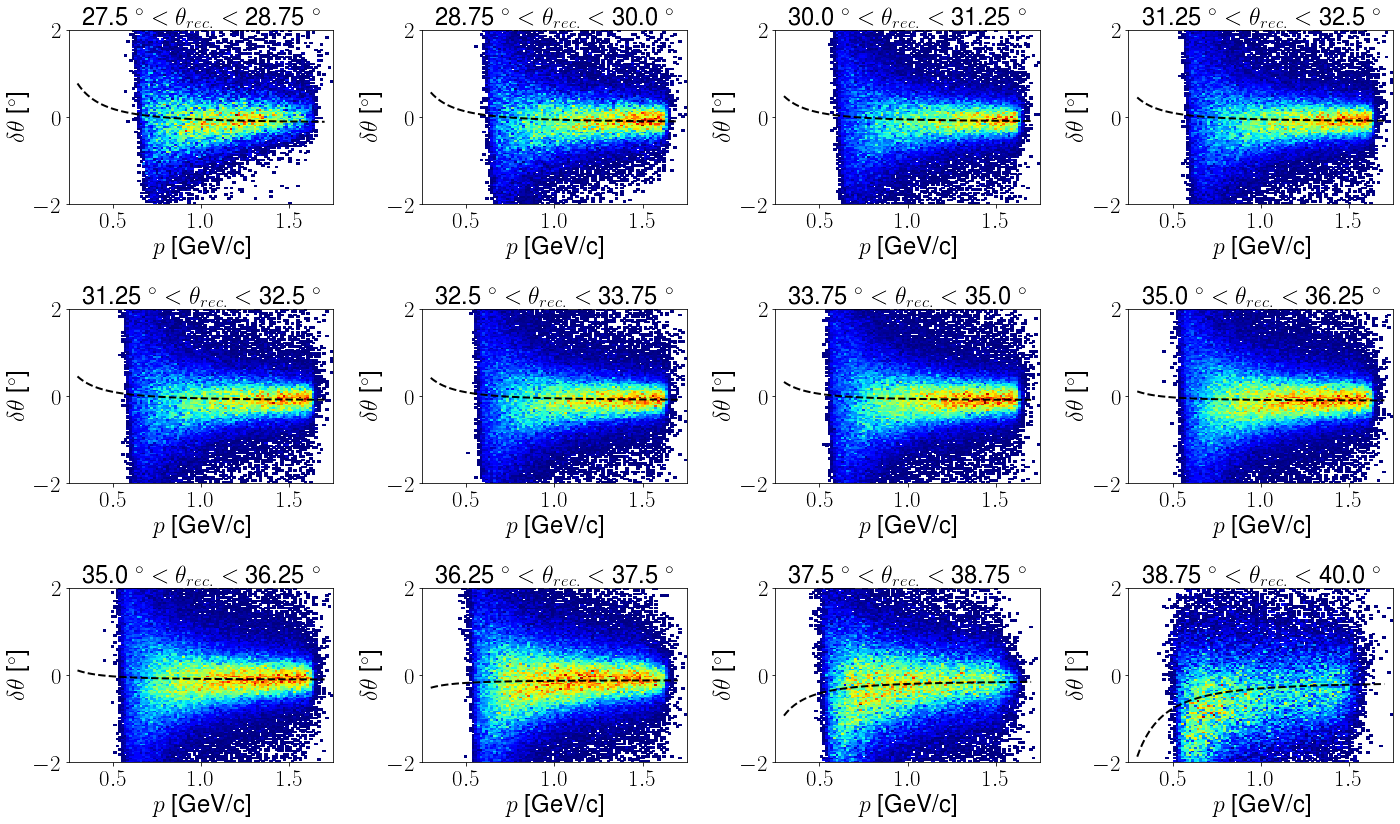

In [588]:
x = np.linspace(0, 11, 12)*1.25 + 27.5 + 1.25/2
fig, axs = plt.subplots(3,4, figsize=(20,12))
for row in range(3):
    for col in range(4):
        ind =col+3*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outb_FD_2.Ptheta >= 1.25*ind+27.5) & (outb_FD_2.Ptheta < 1.25*(ind+1)+27.5)
        axs[row, col].hist2d(outb_FD_2.loc[thetaCond, "Pp"], outb_FD_2.loc[thetaCond, "GenPtheta"] - outb_FD_2.loc[thetaCond, "Ptheta"], bins = [np.linspace(0.25, 1.75, 101), np.linspace(-2, 2, 101)], cmap = cmap, cmin =1)
        param = params_theta[ind]
        param = [correction3(param1_theta, x[ind]), correction5(param2_theta, x[ind])]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 101), correction6(param, np.linspace(0.3, 1.7, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(1.25*ind+27.5)+" "+degree + r" $<\theta_{rec.}<$ " + str(1.25*(ind+1)+27.5)+" "+degree)
plt.tight_layout()
# plt.show()
plt.savefig("protonFD_outb_theta_2.pdf")

In [581]:
params_theta = []
uncertainties_theta = []
x0 = [-0.233854,    0.41627913]
# loss = []
for i in range(12):

    thetaCond = (outb_FD_2.Ptheta >= 1.25*i+27.5) & (outb_FD_2.Ptheta < 1.25*(i+1)+27.5)
    dfi = copy(outb_FD_2.loc[thetaCond, ["Pp", "GenPp", "GenPtheta", "Ptheta"]])
    dffit = copy(dfi[np.abs(dfi["GenPtheta"]-dfi["Ptheta"])<2])
    for i in range (0, 1):
        res_lsq = least_squares(fun6, x0, args=(dffit["Pp"], (dffit["GenPtheta"]-dffit["Ptheta"])))    
#         dffit = copy(dfi[np.abs(dfi["GenPp"]-dfi["Pp"]-correction(res_lsq.x, dfi["Pp"]))<0.01])
        x0 = res_lsq.x
    
    params_theta.append(res_lsq.x)
    
    # uncertainty
    # https://github.com/scipy/scipy/blob/2526df72e5d4ca8bad6e2f4b3cbdfbc33e805865/scipy/optimize/minpack.py#L739
    _, s, VT = np.linalg.svd(res_lsq.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(res_lsq.jac.shape) * s[0]
    s = s[s > threshold]
    VT = VT[:s.size]
    pcov = np.dot(VT.T / s**2, VT)
    s_sq = np.sum((dfi["GenPtheta"]-dfi["Ptheta"]-correction6(res_lsq.x, dfi["Pp"]))**2) / (len(dfi) - len(x0))
    pcov = pcov * s_sq
    uncertainties_theta.append(np.sqrt(np.diag(pcov)))

In [582]:
params_theta = np.array(params_theta)
consts_theta = params_theta[:, 0]
coeffs_theta = params_theta[:, 1]

uncertainties_theta = np.array(uncertainties_theta)
consts_uncertainties_theta = uncertainties_theta[:, 0]
coeffs_uncertainties_theta = uncertainties_theta[:, 1]

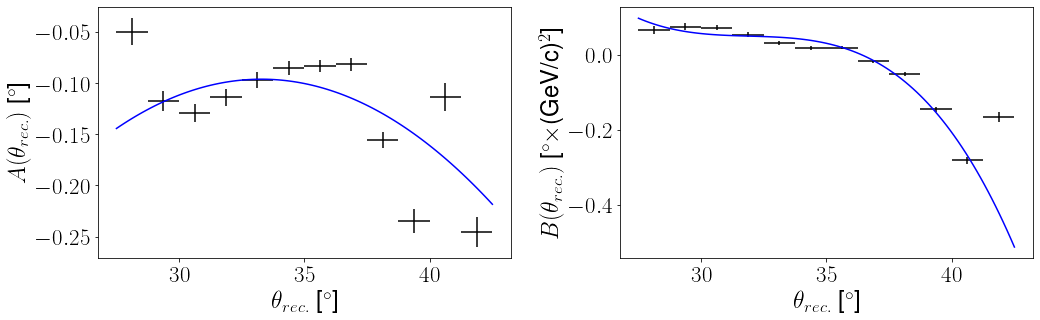

In [587]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].errorbar(np.linspace(0, 11, 12)*1.25+ 27.5 + 1.25/2, consts_theta, xerr= 1.25/2, yerr = consts_uncertainties_theta, color='k', linestyle = '')
ax[1].errorbar(np.linspace(0, 11, 12)*1.25+ 27.5 + 1.25/2, coeffs_theta, xerr= 1.25/2, yerr = coeffs_uncertainties_theta, color='k', linestyle = '')
ax[0].plot(np.linspace(27.5, 42.5, 101), correction3(param1_theta, np.linspace(27.5, 42.5, 101)), color = 'b')
ax[1].plot(np.linspace(27.5, 42.5, 101), correction5(param2_theta, np.linspace(27.5, 42.5, 101)), color = 'b')


# x = np.linspace(15, 30, 101)
# const_FD = -2.56460305*10 + 3.29877542*x -1.43106886*0.1*x*x + 2.08341898*0.001*x*x*x
# coeff_FD =  9.12532740*10 -1.20100762*10*x + 5.27654711*0.1*x*x -7.72656759*0.001*x*x*x
# ax[0].plot(x, const_FD, color ='r')
# ax[1].plot(x, coeff_FD, color ='r')
ax[0].set_xlabel(r"$\theta_{rec.}$"+" ["+degree+"]")
ax[0].set_ylabel(r"$A(\theta_{rec.})$"+" ["+degree+"]")
# ax[0].set_xlim([5, 35])
# ax[0].set_xticks(np.linspace(5, 35, 7))
# ax[1].set_ylim([0, 0.01])
# ax[1].set_xticks(np.linspace(5, 35, 7))
ax[1].set_xlabel(r"$\theta_{rec.}$"+" ["+degree+"]")
ax[1].set_ylabel(r"$B(\theta_{rec.})$"+" ["+degree+r"$\times$"+GeVc2+"]")
plt.tight_layout()
plt.show()
# plt.savefig("coeff_example.pdf")

In [584]:
x = np.linspace(0, 11, 12)*1.25+27.5+1.25/2

res_lsq = least_squares(fun3, [0, 0, 0], args=(x[3:-1], consts_theta[3:-1]))    
param1_theta = res_lsq.x
res_lsq = least_squares(fun5, [0, 0, 0, 0], args=(x[:-1], coeffs_theta[:-1]))    
param2_theta = res_lsq.x


In [585]:
print(param1_theta, param2_theta)

[-1.68873940e+00  9.56867163e-02 -1.43741464e-03] [ 1.49978357e+01 -1.40137094e+00  4.38501543e-02 -4.57982872e-04]


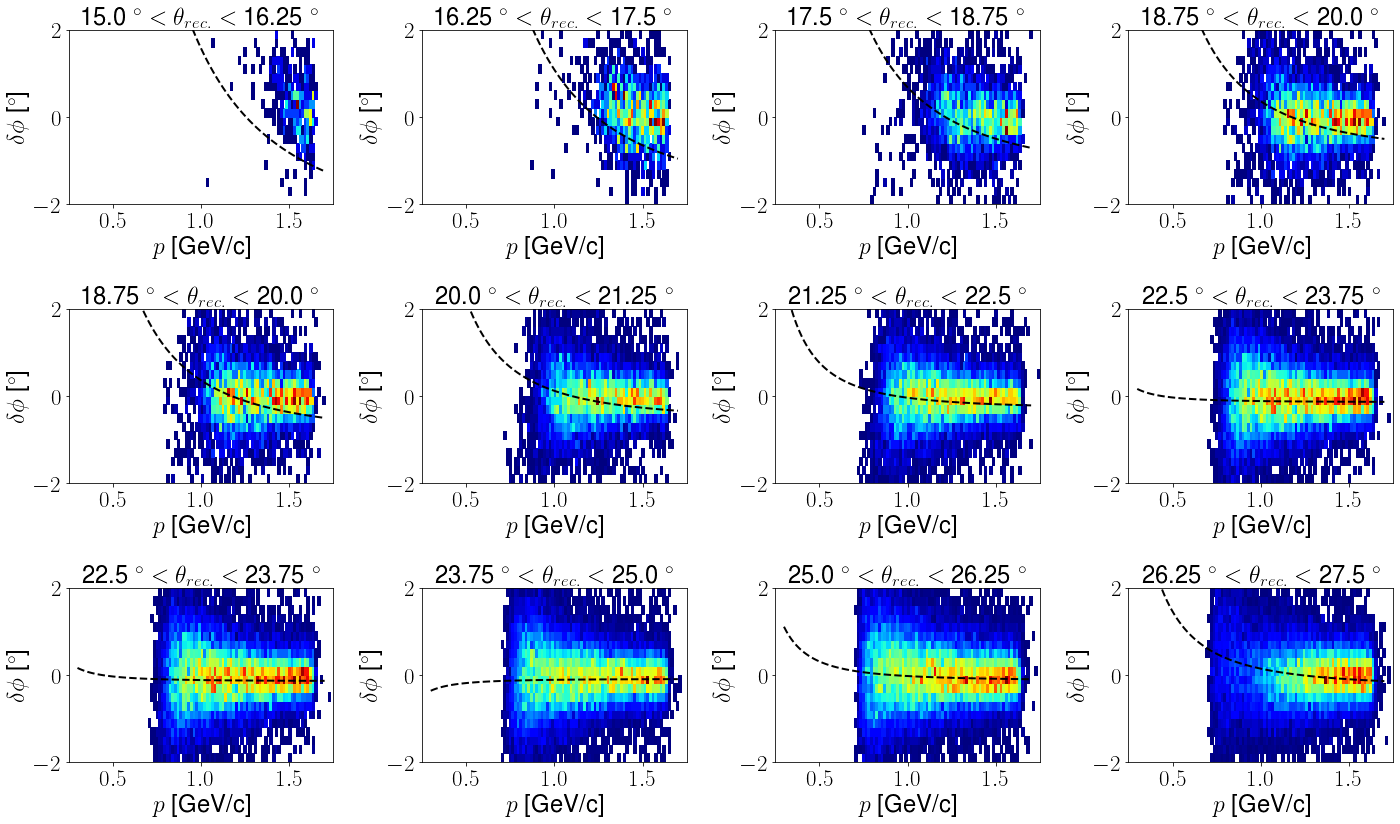

In [613]:
x = np.linspace(0, 11, 12)*1.25 + 15 + 1.25/2
fig, axs = plt.subplots(3,4, figsize=(20,12))
for row in range(3):
    for col in range(4):
        ind =col+3*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outb_FD_1.Ptheta >= 1.25*ind+15) & (outb_FD_1.Ptheta < 1.25*(ind+1)+15)
        param = [correction3(param1_phi, x[ind]), correction3(param2_phi, x[ind])]
#         axs[row, col].hist2d(outb_FD_1.loc[thetaCond, "Pp"], outb_FD_1.loc[thetaCond, "GenPtheta"] - outb_FD_1.loc[thetaCond, "Ptheta"] - correction6(param, outb_FD_1.loc[thetaCond, "Pp"]), bins = [np.linspace(0.25, 1.75, 101), np.linspace(-1, 1, 21)], cmap = cmap, cmin =1)
        axs[row, col].hist2d(outb_FD_1.loc[thetaCond, "Pp"], outb_FD_1.loc[thetaCond, "GenPphi"] - outb_FD_1.loc[thetaCond, "Pphi"], bins = [np.linspace(0.25, 1.75, 101), np.linspace(-2, 2, 21)], cmap = cmap, cmin =1)
#         param = params_theta[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 101), correction6(param, np.linspace(0.3, 1.7, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(1.25*ind+15)+" "+degree + r" $<\theta_{rec.}<$ " + str(1.25*(ind+1)+15)+" "+degree)
plt.tight_layout()
# plt.show()
plt.savefig("protonFD_outb_phi_1.pdf")

In [643]:
params_phi = []
uncertainties_phi = []
x0 = [0, 0.5]
# loss = []
for i in range(12):

    thetaCond = (outb_FD_1.Ptheta >= 1.25*i+15) & (outb_FD_1.Ptheta < 1.25*(i+1)+15)
    dfi = copy(outb_FD_1.loc[thetaCond, ["Pp", "GenPp", "GenPtheta", "Ptheta", "GenPphi", "Pphi"]])
    dffit = copy(dfi[np.abs(dfi["GenPtheta"]-dfi["Ptheta"])<1])
    for i in range (0, 1):
        res_lsq = least_squares(fun6, x0, args=(dffit["Pp"], (dffit["GenPphi"]-dffit["Pphi"])))    
#         dffit = copy(dfi[np.abs(dfi["GenPp"]-dfi["Pp"]-correction(res_lsq.x, dfi["Pp"]))<0.01])
        x0 = res_lsq.x
    
    params_phi.append(res_lsq.x)
    
    # uncertainty
    # https://github.com/scipy/scipy/blob/2526df72e5d4ca8bad6e2f4b3cbdfbc33e805865/scipy/optimize/minpack.py#L739
    _, s, VT = np.linalg.svd(res_lsq.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(res_lsq.jac.shape) * s[0]
    s = s[s > threshold]
    VT = VT[:s.size]
    pcov = np.dot(VT.T / s**2, VT)
    s_sq = np.sum((dfi["GenPphi"]-dfi["Pphi"]-correction6(res_lsq.x, dfi["Pp"]))**2) / (len(dfi) - len(x0))
    pcov = pcov * s_sq
    uncertainties_phi.append(np.sqrt(np.diag(pcov)))

In [644]:
params_phi = np.array(params_phi)
consts_phi = params_phi[:, 0]
coeffs_phi = params_phi[:, 1]

uncertainties_phi = np.array(uncertainties_phi)
consts_uncertainties_phi = uncertainties_phi[:, 0]
coeffs_uncertainties_phi = uncertainties_phi[:, 1]

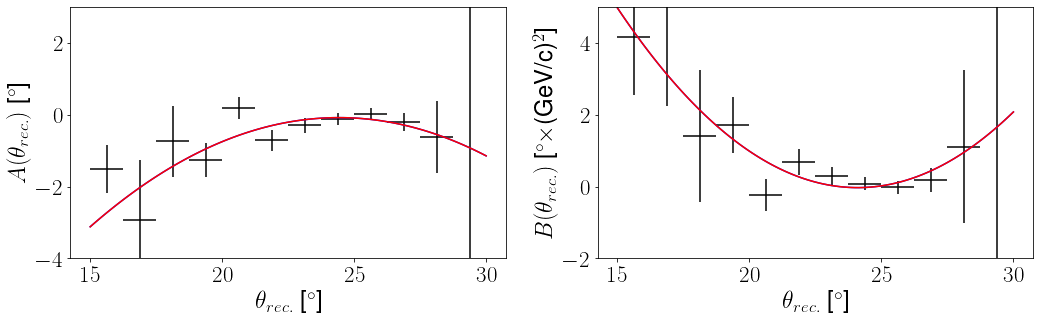

In [646]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].errorbar(np.linspace(0, 11, 12)*1.25+ 15 + 1.25/2, consts_phi, xerr= 1.25/2, yerr = consts_uncertainties_phi, color='k', linestyle = '')
ax[1].errorbar(np.linspace(0, 11, 12)*1.25+ 15 + 1.25/2, coeffs_phi, xerr= 1.25/2, yerr = coeffs_uncertainties_phi, color='k', linestyle = '')
ax[0].plot(np.linspace(15, 30, 101), correction3(param1_phi, np.linspace(15, 30, 101)), color = 'b')
ax[1].plot(np.linspace(15, 30, 101), correction3(param2_phi, np.linspace(15, 30, 101)), color = 'b')


x = np.linspace(15, 30, 101)
const_FD = -20.4780893 + 1.67020488*x - 0.03419348*x*x
coeff_FD = 35.02807194 - 2.9098043*x +  0.06037906*x*x
ax[0].plot(x, const_FD, color ='r')
ax[1].plot(x, coeff_FD, color ='r')
ax[0].set_xlabel(r"$\theta_{rec.}$"+" ["+degree+"]")
ax[0].set_ylabel(r"$A(\theta_{rec.})$"+" ["+degree+"]")
ax[0].set_ylim([-4, 3])
# ax[0].set_xticks(np.linspace(5, 35, 7))
ax[1].set_ylim([-2, 5])
# ax[1].set_xticks(np.linspace(5, 35, 7))
ax[1].set_xlabel(r"$\theta_{rec.}$"+" ["+degree+"]")
ax[1].set_ylabel(r"$B(\theta_{rec.})$"+" ["+degree+r"$\times$"+GeVc2+"]")
plt.tight_layout()
plt.show()
# plt.savefig("coeff_example.pdf")

In [645]:
x = np.linspace(0, 11, 12)*1.25+15+1.25/2

res_lsq = least_squares(fun3, [0, 0, 0], args=(x[3:-1], consts_phi[3:-1]))    
param1_phi = res_lsq.x
res_lsq = least_squares(fun3, [0, 0, 0], args=(x[3:-1], coeffs_phi[3:-1]))    
param2_phi = res_lsq.x


In [611]:
print(param1_phi, param2_phi)

[-20.4780893    1.67020488  -0.03419348] [35.02807194 -2.9098043   0.06037906]


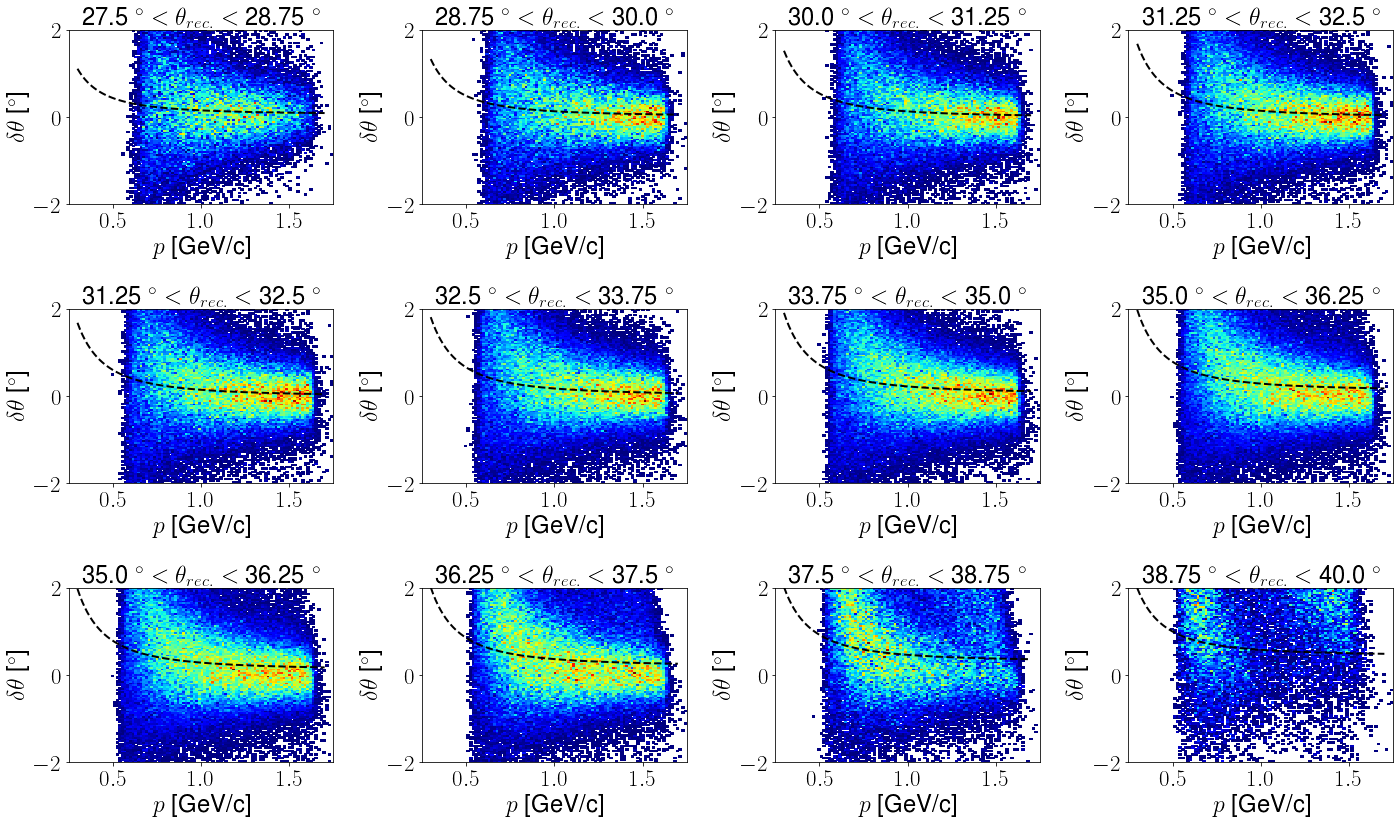

In [652]:
x = np.linspace(0, 11, 12)*1.25 + 27.5 + 1.25/2
fig, axs = plt.subplots(3,4, figsize=(20,12))
for row in range(3):
    for col in range(4):
        ind =col+3*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outb_FD_2.Ptheta >= 1.25*ind+27.5) & (outb_FD_2.Ptheta < 1.25*(ind+1)+27.5)
        axs[row, col].hist2d(outb_FD_2.loc[thetaCond, "Pp"], outb_FD_2.loc[thetaCond, "GenPphi"] - outb_FD_2.loc[thetaCond, "Pphi"], bins = [np.linspace(0.25, 1.75, 101), np.linspace(-2, 2, 101)], cmap = cmap, cmin =1)
        param = params_phi[ind]
        param = [correction3(param1_phi, x[ind]), correction3(param2_phi, x[ind])]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 101), correction6(param, np.linspace(0.3, 1.7, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(1.25*ind+27.5)+" "+degree + r" $<\theta_{rec.}<$ " + str(1.25*(ind+1)+27.5)+" "+degree)
plt.tight_layout()
# plt.show()
plt.savefig("protonFD_outb_phi_2.pdf")

In [647]:
params_phi = []
uncertainties_phi = []
x0 = [-0.233854,    -0.41627913]
# loss = []
for i in range(12):

    thetaCond = (outb_FD_2.Ptheta >= 1.25*i+27.5) & (outb_FD_2.Ptheta < 1.25*(i+1)+27.5)
    dfi = copy(outb_FD_2.loc[thetaCond, ["Pp", "GenPp", "GenPtheta", "Ptheta","GenPphi","Pphi"]])
    dffit = copy(dfi[np.abs(dfi["GenPphi"]-dfi["Pphi"])<2])
    for i in range (0, 1):
        res_lsq = least_squares(fun6, x0, args=(dffit["Pp"], (dffit["GenPphi"]-dffit["Pphi"])))    
#         dffit = copy(dfi[np.abs(dfi["GenPp"]-dfi["Pp"]-correction(res_lsq.x, dfi["Pp"]))<0.01])
        x0 = res_lsq.x
    
    params_phi.append(res_lsq.x)
    
    # uncertainty
    # https://github.com/scipy/scipy/blob/2526df72e5d4ca8bad6e2f4b3cbdfbc33e805865/scipy/optimize/minpack.py#L739
    _, s, VT = np.linalg.svd(res_lsq.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(res_lsq.jac.shape) * s[0]
    s = s[s > threshold]
    VT = VT[:s.size]
    pcov = np.dot(VT.T / s**2, VT)
    s_sq = np.sum((dfi["GenPphi"]-dfi["Pphi"]-correction6(res_lsq.x, dfi["Pp"]))**2) / (len(dfi) - len(x0))
    pcov = pcov * s_sq
    uncertainties_phi.append(np.sqrt(np.diag(pcov)))

In [648]:
params_phi = np.array(params_phi)
consts_phi = params_phi[:, 0]
coeffs_phi = params_phi[:, 1]

uncertainties_phi = np.array(uncertainties_phi)
consts_uncertainties_phi = uncertainties_phi[:, 0]
coeffs_uncertainties_phi = uncertainties_phi[:, 1]

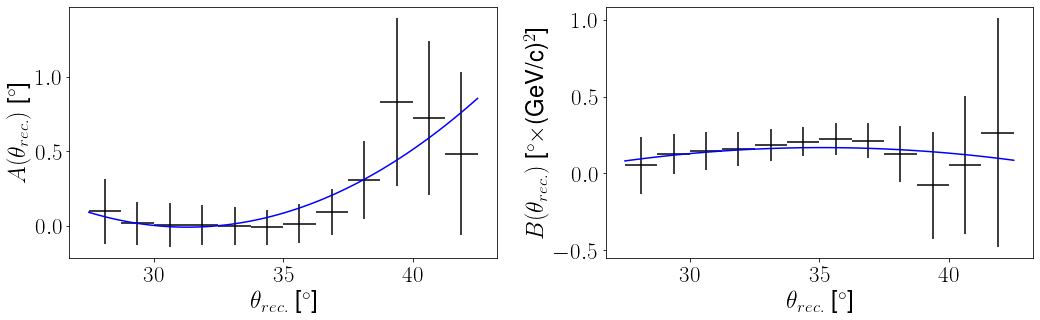

In [651]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].errorbar(np.linspace(0, 11, 12)*1.25+ 27.5 + 1.25/2, consts_phi, xerr= 1.25/2, yerr = consts_uncertainties_phi, color='k', linestyle = '')
ax[1].errorbar(np.linspace(0, 11, 12)*1.25+ 27.5 + 1.25/2, coeffs_phi, xerr= 1.25/2, yerr = coeffs_uncertainties_phi, color='k', linestyle = '')
ax[0].plot(np.linspace(27.5, 42.5, 101), correction3(param1_phi, np.linspace(27.5, 42.5, 101)), color = 'b')
ax[1].plot(np.linspace(27.5, 42.5, 101), correction3(param2_phi, np.linspace(27.5, 42.5, 101)), color = 'b')


# x = np.linspace(15, 30, 101)
# const_FD = -2.56460305*10 + 3.29877542*x -1.43106886*0.1*x*x + 2.08341898*0.001*x*x*x
# coeff_FD =  9.12532740*10 -1.20100762*10*x + 5.27654711*0.1*x*x -7.72656759*0.001*x*x*x
# ax[0].plot(x, const_FD, color ='r')
# ax[1].plot(x, coeff_FD, color ='r')
ax[0].set_xlabel(r"$\theta_{rec.}$"+" ["+degree+"]")
ax[0].set_ylabel(r"$A(\theta_{rec.})$"+" ["+degree+"]")
# ax[0].set_xlim([5, 35])
# ax[0].set_xticks(np.linspace(5, 35, 7))
# ax[1].set_ylim([0, 0.01])
# ax[1].set_xticks(np.linspace(5, 35, 7))
ax[1].set_xlabel(r"$\theta_{rec.}$"+" ["+degree+"]")
ax[1].set_ylabel(r"$B(\theta_{rec.})$"+" ["+degree+r"$\times$"+GeVc2+"]")
plt.tight_layout()
plt.show()
# plt.savefig("coeff_example.pdf")

In [650]:
x = np.linspace(0, 11, 12)*1.25+27.5+1.25/2

res_lsq = least_squares(fun3, [0, 0, 0], args=(x[:], consts_phi[:]))    
param1_phi = res_lsq.x
res_lsq = least_squares(fun3, [0, 0, 0], args=(x[:], coeffs_phi[:]))    
param2_phi = res_lsq.x


In [653]:
print(param1_phi, param2_phi)

[ 6.75359137 -0.43199851  0.0068995 ] [-1.68588219e+00  1.05609627e-01 -1.50452832e-03]


In [671]:
const_FD = 0.05083242 -0.00469777*outb_FD_1.Ptheta + 0.0001082*outb_FD_1.Ptheta*outb_FD_1.Ptheta
coeff_FD = -1.47443264*0.01 + 1.58220893*0.001*outb_FD_1.Ptheta -3.19490013*0.00001*outb_FD_1.Ptheta*outb_FD_1.Ptheta
CorrectedPp_FD_1 = const_FD + coeff_FD/outb_FD_1.loc[:, "Pp"] + outb_FD_1.loc[:, "Pp"]

const_FD = -2.56460305*10 + 3.29877542*outb_FD_1.Ptheta -1.43106886*0.1*outb_FD_1.Ptheta*outb_FD_1.Ptheta + 2.08341898*0.001*outb_FD_1.Ptheta*outb_FD_1.Ptheta*outb_FD_1.Ptheta
coeff_FD =  9.12532740*10 -1.20100762*10*outb_FD_1.Ptheta + 5.27654711*0.1*outb_FD_1.Ptheta*outb_FD_1.Ptheta -7.72656759*0.001*outb_FD_1.Ptheta*outb_FD_1.Ptheta*outb_FD_1.Ptheta
CorrectedPtheta_FD_1 = const_FD + coeff_FD/outb_FD_1.loc[:, "Pp"]/outb_FD_1.loc[:, "Pp"] + outb_FD_1.loc[:, "Ptheta"]

const_FD = -20.4780893 + 1.67020488*outb_FD_1.Ptheta - 0.03419348*outb_FD_1.Ptheta*outb_FD_1.Ptheta
coeff_FD = 35.02807194 - 2.9098043*outb_FD_1.Ptheta +  0.06037906*outb_FD_1.Ptheta*outb_FD_1.Ptheta
CorrectedPphi_FD_1 = const_FD + coeff_FD/outb_FD_1.loc[:, "Pp"]/outb_FD_1.loc[:, "Pp"] + outb_FD_1.loc[:, "Pphi"]

const_FD = 0.09832589 -0.0066463*outb_FD_2.Ptheta + 0.00010312*outb_FD_2.Ptheta*outb_FD_2.Ptheta
coeff_FD = -9.61421691*0.01 + 6.85638807*0.001*outb_FD_2.Ptheta -9.75766427*0.00001*outb_FD_2.Ptheta*outb_FD_2.Ptheta
CorrectedPp_FD_2 = const_FD + coeff_FD/outb_FD_2.loc[:, "Pp"] + outb_FD_2.loc[:, "Pp"]

const_FD = -1.68873940 + 9.56867163*0.01*outb_FD_2.Ptheta -1.43741464*0.001*outb_FD_2.Ptheta*outb_FD_2.Ptheta
coeff_FD = 1.49978357*10 -1.40137094*outb_FD_2.Ptheta + 4.38501543*0.01*outb_FD_2.Ptheta*outb_FD_2.Ptheta -4.57982872*0.0001*outb_FD_2.Ptheta*outb_FD_2.Ptheta*outb_FD_2.Ptheta
CorrectedPtheta_FD_2 = const_FD + coeff_FD/outb_FD_2.loc[:, "Pp"]/outb_FD_2.loc[:, "Pp"] + outb_FD_2.loc[:, "Ptheta"]

const_FD = 6.75359137 - 0.43199851*outb_FD_2.Ptheta + 0.0068995*outb_FD_2.Ptheta*outb_FD_2.Ptheta
coeff_FD = -1.68588219 + 1.05609627*0.1*outb_FD_2.Ptheta -1.50452832*0.001*outb_FD_2.Ptheta*outb_FD_2.Ptheta
CorrectedPphi_FD_2 = const_FD + coeff_FD/outb_FD_2.loc[:, "Pp"]/outb_FD_2.loc[:, "Pp"] + outb_FD_2.loc[:, "Pphi"]

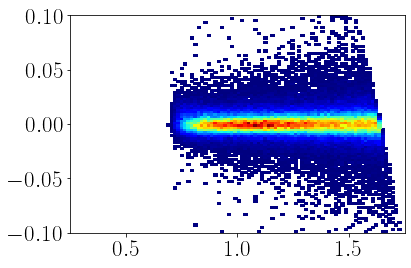

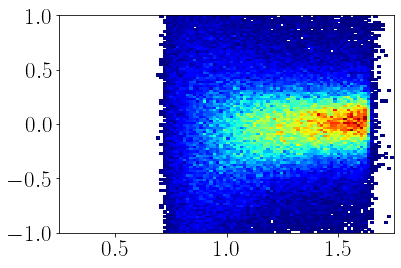

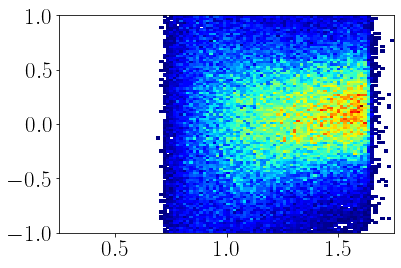

In [672]:
plt.hist2d(outb_FD_1.Pp, outb_FD_1.GenPp - CorrectedPp_FD_1, bins = [np.linspace(0.25, 1.75, 101), np.linspace(-0.1, 0.1, 101)], cmap = cmap, cmin = 1)
plt.show()
plt.hist2d(outb_FD_1.Pp, outb_FD_1.GenPtheta - CorrectedPtheta_FD_1, bins = [np.linspace(0.25, 1.75, 101), np.linspace(-1, 1, 101)], cmap = cmap, cmin = 1)
plt.show()
plt.hist2d(outb_FD_1.Pp, outb_FD_1.GenPphi - CorrectedPphi_FD_1, bins = [np.linspace(0.25, 1.75, 101), np.linspace(-1, 1, 101)], cmap = cmap, cmin = 1)
plt.show()

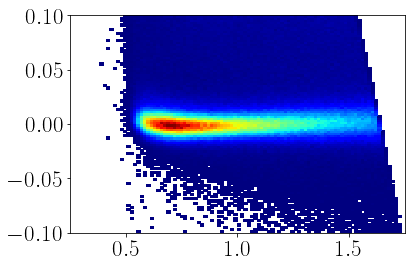

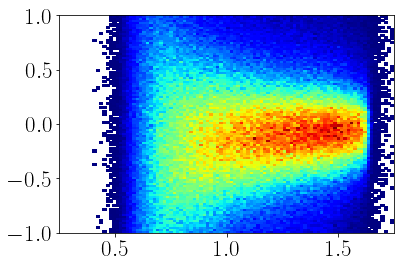

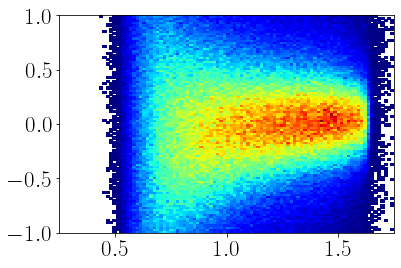

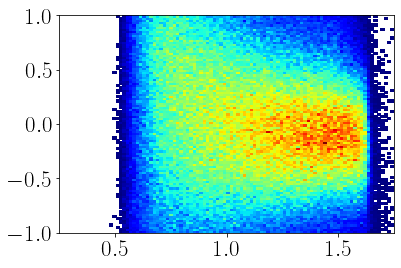

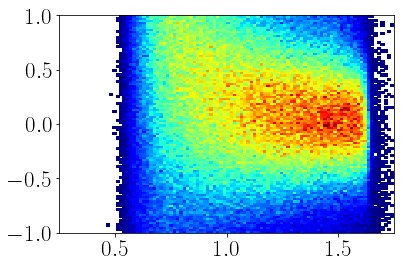

In [675]:
plt.hist2d(outb_FD_2.Pp, outb_FD_2.GenPp - CorrectedPp_FD_2, bins = [np.linspace(0.25, 1.75, 101), np.linspace(-0.1, 0.1, 101)], cmap = cmap, cmin = 1)
plt.show()
plt.hist2d(outb_FD_2.Pp, outb_FD_2.GenPtheta - outb_FD_2.Ptheta, bins = [np.linspace(0.25, 1.75, 101), np.linspace(-1, 1, 101)], cmap = cmap, cmin = 1)
plt.show()
plt.hist2d(outb_FD_2.Pp, outb_FD_2.GenPtheta - CorrectedPtheta_FD_2, bins = [np.linspace(0.25, 1.75, 101), np.linspace(-1, 1, 101)], cmap = cmap, cmin = 1)
plt.show()
plt.hist2d(outb_FD_2.Pp, outb_FD_2.GenPphi - CorrectedPphi_FD_2, bins = [np.linspace(0.25, 1.75, 101), np.linspace(-1, 1, 101)], cmap = cmap, cmin = 1)
plt.show()
plt.hist2d(outb_FD_2.Pp, outb_FD_2.GenPphi - outb_FD_2.Pphi, bins = [np.linspace(0.25, 1.75, 101), np.linspace(-1, 1, 101)], cmap = cmap, cmin = 1)
plt.show()

<AxesSubplot:>

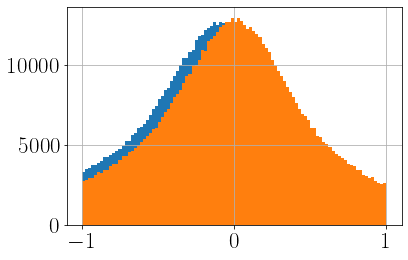

In [678]:
(outb_FD_2.GenPtheta - outb_FD_2.Ptheta).hist(bins = np.linspace(-1, 1, 101))
(outb_FD_2.GenPtheta - CorrectedPtheta_FD_2).hist(bins = np.linspace(-1, 1, 101))

## Check Rafayel's comment 

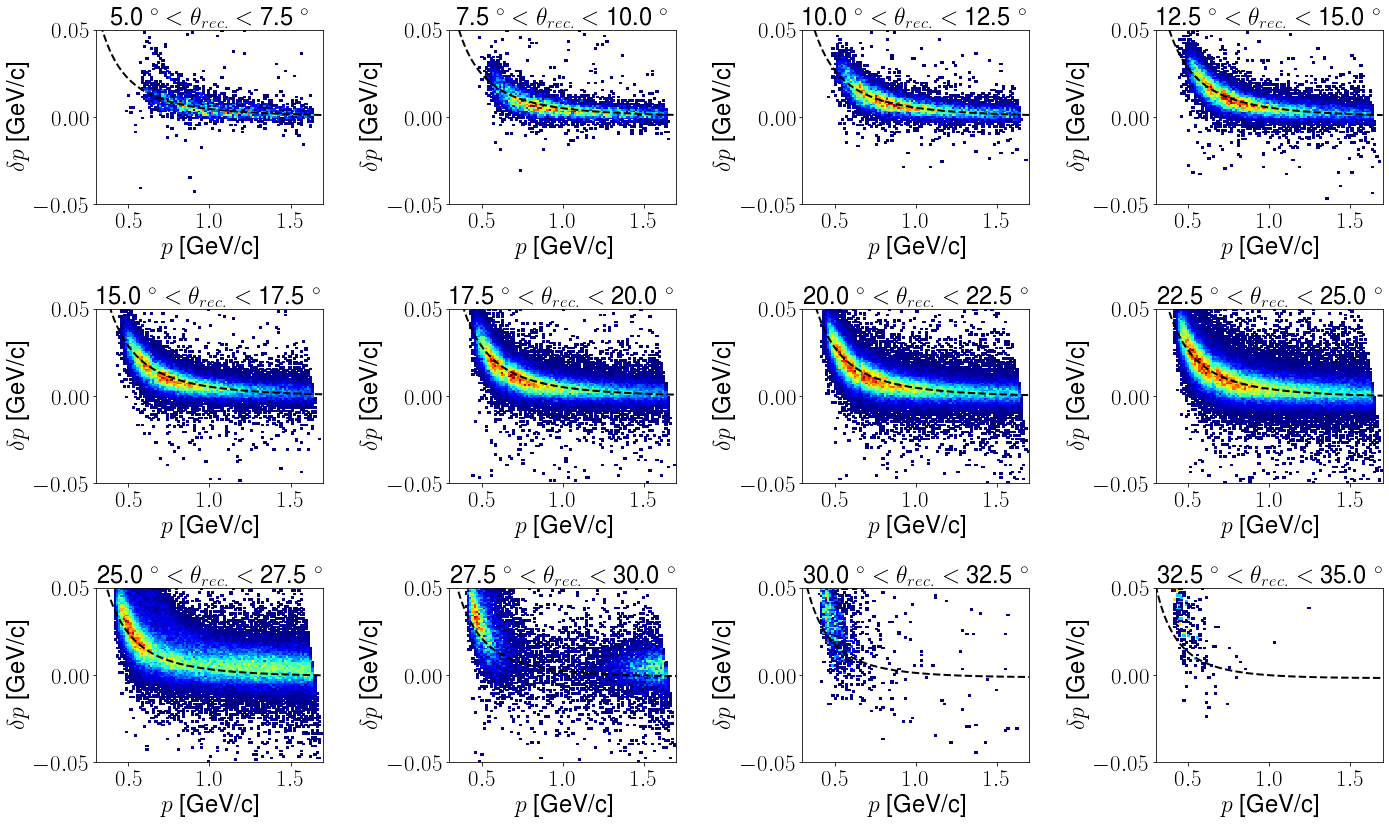

In [18]:
param1_p, param2_p = [-0.00051894, -0.00018104], [ 3.29466917e-03,  5.73663160e-04, -1.40807209e-05]
x = np.linspace(0, 11, 12)*2.5+ 5 + 1.25
fig, axs = plt.subplots(3,4, figsize=(20,12))
for row in range(3):
    for col in range(4):
        ind =col+4*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbending_check1.Ptheta >= 2.5*ind+5) & (inbending_check1.Ptheta < 2.5*(ind+1)+5)
        axs[row, col].hist2d(inbending_check1.loc[thetaCond, "Pp"], (inbending_check1.loc[thetaCond, "GenPp"] - inbending_check1.loc[thetaCond, "Pp"])/inbending_check1.loc[thetaCond, "Pp"], bins = [np.linspace(0.3, 1.7, 101), np.linspace(-0.05, 0.05, 101)], cmap = cmap, cmin =1)
#         param = params_p[ind]
        param = [correction2(param1_p, x[ind]), correction3(param2_p, x[ind])]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 101), correction(param, np.linspace(0.3, 1.7, 101))/np.linspace(0.3, 1.7, 101), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(2.5*ind+5)+" "+degree + r" $<\theta_{rec.}<$ " + str(2.5*(ind+1)+5)+" "+degree)
plt.tight_layout()

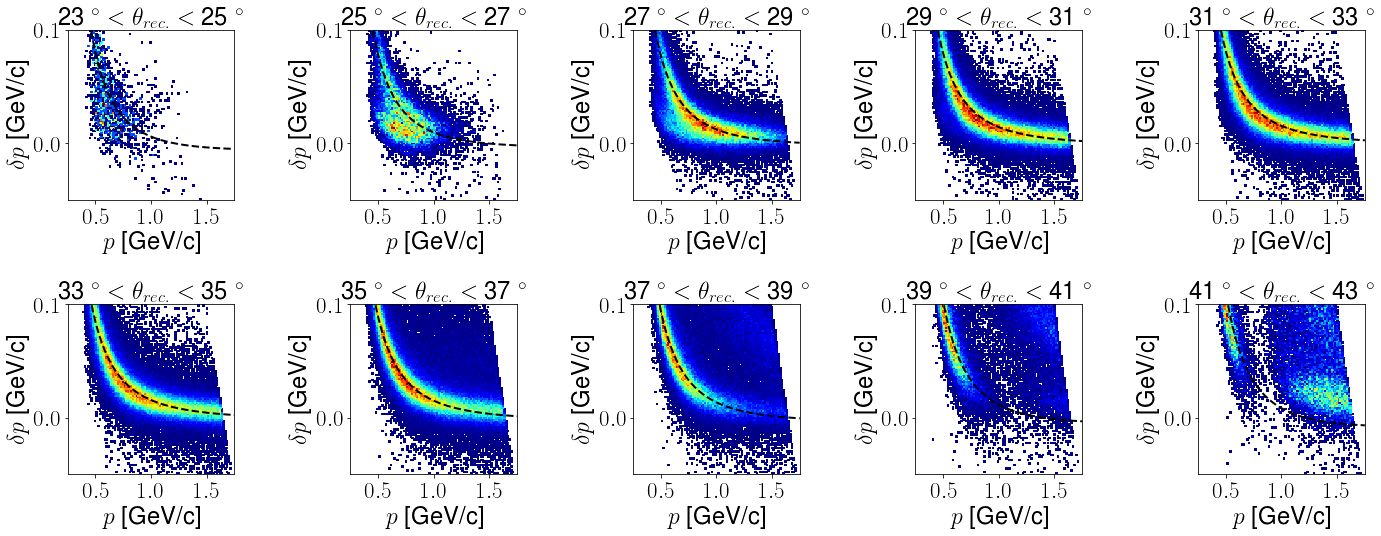

In [20]:
fig, axs = plt.subplots(2,5, figsize=(20,8))
for row in range(2):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbending_check2.Ptheta >= 2*ind+23) & (inbending_check2.Ptheta < 2*(ind+1)+23)
        axs[row, col].hist2d(inbending_check2.loc[thetaCond, "Pp"], (inbending_check2.loc[thetaCond, "GenPp"] - inbending_check2.loc[thetaCond, "Pp"])/inbending_check2.loc[thetaCond, "Pp"], bins = [np.linspace(0.25, 1.75, 101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin =1)
        theta = np.linspace(23, 41, 10)[ind]+1
        const_FD = -3.03346359*10**(-1) + 1.83368163*10**(-2)*theta - 2.86486404*10**(-4)*theta*theta
        coeff_FD =  2.01023276*10**(-1) - 1.13312215*10**(-2)*theta + 1.82487916*10**(-4)*theta*theta

        param = [const_FD, coeff_FD]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.25, 1.75, 101), correction(param, np.linspace(0.25, 1.75, 101))/np.linspace(0.25, 1.75, 101), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(2*ind+23)+" "+degree + r" $<\theta_{rec.}<$ " + str(2*(ind+1)+23)+" "+degree)
plt.tight_layout()

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


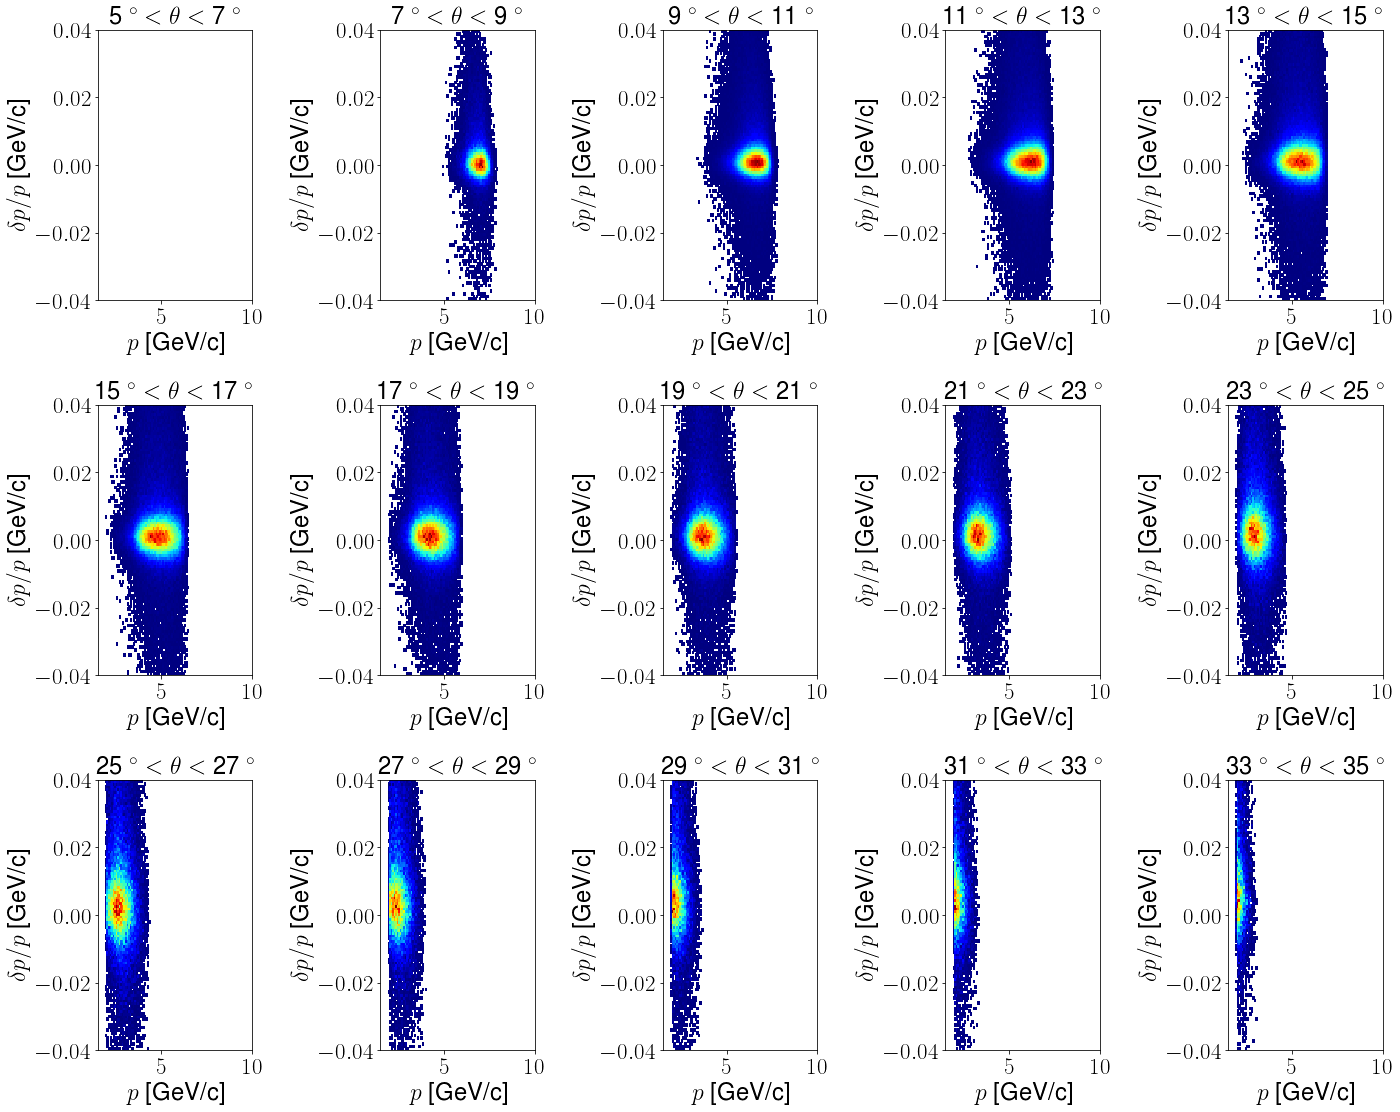

In [21]:
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Etheta"])
        thetaCond = (inbending.Etheta >= 2*ind+5) & (inbending.Etheta < 2*ind+7)
        axs[row, col].hist2d(inbending.loc[thetaCond, "Ep"], (inbending.loc[thetaCond, "GenEp"] - inbending.loc[thetaCond, "Ep"])/inbending.loc[thetaCond, "Ep"], bins = [np.linspace(1.5, 10, 101), np.linspace(-0.04, 0.04, 101)], cmap = cmap, cmin =1)
#         param = params_theta[ind]
#         param = [0, -8, -3 ]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.5, 1.7, 101), correction4([0, -2, -3], np.linspace(0.5, 1.7, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].plot(np.linspace(0.5, 1.7, 101), correction4(param, np.linspace(0.5, 1.7, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p/ p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(2*ind+5)+" "+degree + r" $<\theta<$ " + str(2*ind+7)+" "+degree)
plt.tight_layout()
# plt.show()
# plt.savefig("electron_inb_mom.pdf")

## Check Raffaella's comment

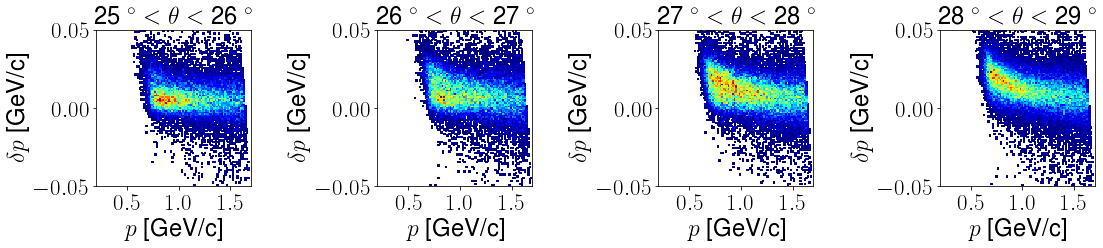

In [26]:
theta = np.linspace(0,19,20) + 20.5
const_FD = np.select([theta<27, (theta>=27)],
              [0.02067157-0.0009827*theta, -0.11216694 + 0.0069912*theta - 0.00011733 * theta * theta])
coeff_FD = np.select([theta<27, (theta>=27)],
              [-0.03334437+0.00177781*theta, 0.0402797945 - 0.00197220505*theta + 4.50918200*10**(-5) * theta * theta])

params_p = np.array([const_FD, coeff_FD]).T

fig, axs = plt.subplots(1,4, figsize=(16,4))
for row in range(1):
    for col in range(4):
        ind =col+4*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outb_FD.Ptheta >= ind+25) & (outb_FD.Ptheta < ind+26)
        axs[col].hist2d(outb_FD.loc[thetaCond, "Pp"], outb_FD.loc[thetaCond, "GenPp"] - outb_FD.loc[thetaCond, "Pp"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-0.05, 0.05, 101)], cmap = cmap, cmin =1)

        
#         param = params_p[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[col].set_title(str(ind+25)+" "+degree + r" $<\theta<$ " + str(ind+26)+" "+degree)
plt.tight_layout()
plt.savefig("protonFD_outb_mom.pdf")
# plt.savefig("correction_p_result.pdf")